In [2]:
# import warnings
# warnings.filterwarnings('ignore')

# 기본 데이터 분석 패키지
import numpy as np
import pandas as pd
import scipy as sp

# 데이터 시각화 패키지
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns

# 기타
import pickle
import random

from IPython.display import display 
pd.options.display.max_columns = None
pd.options.display.max_rows = None

np.random.seed(1)
random_state = 1

%matplotlib inline

In [3]:
train = pd.read_csv("csv/train.csv")
test = pd.read_csv("csv/test.csv")

In [4]:
train.tail()

Id  MSSubClass MSZoning  LotFrontage  LotArea Street Alley LotShape  \
1455  1456          60       RL         62.0     7917   Pave   NaN      Reg   
1456  1457          20       RL         85.0    13175   Pave   NaN      Reg   
1457  1458          70       RL         66.0     9042   Pave   NaN      Reg   
1458  1459          20       RL         68.0     9717   Pave   NaN      Reg   
1459  1460          20       RL         75.0     9937   Pave   NaN      Reg   

     LandContour Utilities LotConfig LandSlope Neighborhood Condition1  \
1455         Lvl    AllPub    Inside       Gtl      Gilbert       Norm   
1456         Lvl    AllPub    Inside       Gtl       NWAmes       Norm   
1457         Lvl    AllPub    Inside       Gtl      Crawfor       Norm   
1458         Lvl    AllPub    Inside       Gtl        NAmes       Norm   
1459         Lvl    AllPub    Inside       Gtl      Edwards       Norm   

     Condition2 BldgType HouseStyle  OverallQual  OverallCond  YearBuilt  \
1455       Norm     1Fam     2Story            6            5       1999   
1456       Norm     1Fam     1Story            6            6       1978   
1457       Norm     1Fam     2Story            7            9       1941   
1458       Norm     1Fam     1Story            5            6       1950   
1459       Norm     1Fam     1Story            5            6       1965   

      YearRemodAdd RoofStyle RoofMatl Exterior1st Exterior2nd MasVnrType  \
1455          2000     Gable  CompShg     VinylSd     VinylSd       None   
1456          1988     Gable  CompShg     Plywood     Plywood      Stone   
1457          2006     Gable  CompShg     CemntBd     CmentBd       None   
1458          1996       Hip  CompShg     MetalSd     MetalSd       None   
1459          1965     Gable  CompShg     HdBoard     HdBoard       None   

      MasVnrArea ExterQual ExterCond Foundation BsmtQual BsmtCond  \
1455         0.0        TA        TA      PConc       Gd       TA   
1456       119.0        TA        TA     CBlock       Gd       TA   
1457         0.0        Ex        Gd      Stone       TA       Gd   
1458         0.0        TA        TA     CBlock       TA       TA   
1459         0.0        Gd        TA     CBlock       TA       TA   

     BsmtExposure BsmtFinType1  BsmtFinSF1 BsmtFinType2  BsmtFinSF2  \
1455           No          Unf           0          Unf           0   
1456           No          ALQ         790          Rec         163   
1457           No          GLQ         275          Unf           0   
1458           Mn          GLQ          49          Rec        1029   
1459           No          BLQ         830          LwQ         290   

      BsmtUnfSF  TotalBsmtSF Heating HeatingQC CentralAir Electrical  \
1455        953          953    GasA        Ex          Y      SBrkr   
1456        589         1542    GasA        TA          Y      SBrkr   
1457        877         1152    GasA        Ex          Y      SBrkr   
1458          0         1078    GasA        Gd          Y      FuseA   
1459        136         1256    GasA        Gd          Y      SBrkr   

      1stFlrSF  2ndFlrSF  LowQualFinSF  GrLivArea  BsmtFullBath  BsmtHalfBath  \
1455       953       694             0       1647             0             0   
1456      2073         0             0       2073             1             0   
1457      1188      1152             0       2340             0             0   
1458      1078         0             0       1078             1             0   
1459      1256         0             0       1256             1             0   

      FullBath  HalfBath  BedroomAbvGr  KitchenAbvGr KitchenQual  \
1455         2         1             3             1          TA   
1456         2         0             3             1          TA   
1457         2         0             4             1          Gd   
1458         1         0             2             1          Gd   
1459         1         1             3             1          TA   

   

In [4]:
test.tail()

Id  MSSubClass MSZoning  LotFrontage  LotArea Street Alley LotShape  \
1454  2915         160       RM         21.0     1936   Pave   NaN      Reg   
1455  2916         160       RM         21.0     1894   Pave   NaN      Reg   
1456  2917          20       RL        160.0    20000   Pave   NaN      Reg   
1457  2918          85       RL         62.0    10441   Pave   NaN      Reg   
1458  2919          60       RL         74.0     9627   Pave   NaN      Reg   

     LandContour Utilities LotConfig LandSlope Neighborhood Condition1  \
1454         Lvl    AllPub    Inside       Gtl      MeadowV       Norm   
1455         Lvl    AllPub    Inside       Gtl      MeadowV       Norm   
1456         Lvl    AllPub    Inside       Gtl      Mitchel       Norm   
1457         Lvl    AllPub    Inside       Gtl      Mitchel       Norm   
1458         Lvl    AllPub    Inside       Mod      Mitchel       Norm   

     Condition2 BldgType HouseStyle  OverallQual  OverallCond  YearBuilt  \
1454       Norm    Twnhs     2Story            4            7       1970   
1455       Norm   TwnhsE     2Story            4            5       1970   
1456       Norm     1Fam     1Story            5            7       1960   
1457       Norm     1Fam     SFoyer            5            5       1992   
1458       Norm     1Fam     2Story            7            5       1993   

      YearRemodAdd RoofStyle RoofMatl Exterior1st Exterior2nd MasVnrType  \
1454          1970     Gable  CompShg     CemntBd     CmentBd       None   
1455          1970     Gable  CompShg     CemntBd     CmentBd       None   
1456          1996     Gable  CompShg     VinylSd     VinylSd       None   
1457          1992     Gable  CompShg     HdBoard     Wd Shng       None   
1458          1994     Gable  CompShg     HdBoard     HdBoard    BrkFace   

      MasVnrArea ExterQual ExterCond Foundation BsmtQual BsmtCond  \
1454         0.0        TA        TA     CBlock       TA       TA   
1455         0.0        TA        TA     CBlock       TA       TA   
1456         0.0        TA        TA     CBlock       TA       TA   
1457         0.0        TA        TA      PConc       Gd       TA   
1458        94.0        TA        TA      PConc       Gd       TA   

     BsmtExposure BsmtFinType1  BsmtFinSF1 BsmtFinType2  BsmtFinSF2  \
1454           No          Unf         0.0          Unf         0.0   
1455           No          Rec       252.0          Unf         0.0   
1456           No          ALQ      1224.0          Unf         0.0   
1457           Av          GLQ       337.0          Unf         0.0   
1458           Av          LwQ       758.0          Unf         0.0   

      BsmtUnfSF  TotalBsmtSF Heating HeatingQC CentralAir Electrical  \
1454      546.0        546.0    GasA        Gd          Y      SBrkr   
1455      294.0        546.0    GasA        TA          Y      SBrkr   
1456        0.0       1224.0    GasA        Ex          Y      SBrkr   
1457      575.0        912.0    GasA        TA          Y      SBrkr   
1458      238.0        996.0    GasA        Ex          Y      SBrkr   

      1stFlrSF  2ndFlrSF  LowQualFinSF  GrLivArea  BsmtFullBath  BsmtHalfBath  \
1454       546       546             0       1092           0.0           0.0   
1455       546       546             0       1092           0.0           0.0   
1456      1224         0             0       1224           1.0           0.0   
1457       970         0             0        970           0.0           1.0   
1458       996      1004             0       2000           0.0           0.0   

      FullBath  HalfBath  BedroomAbvGr  KitchenAbvGr KitchenQual  \
1454         1         1             3             1          TA   
1455         1         1             3             1          TA   
1456         1         0             4             1          TA   
1457         1         0             3             1          TA   
1458         2         1             3             1          TA   

   

## Target

In [5]:
set(train.columns) - set(test.columns)

{'SalePrice'}

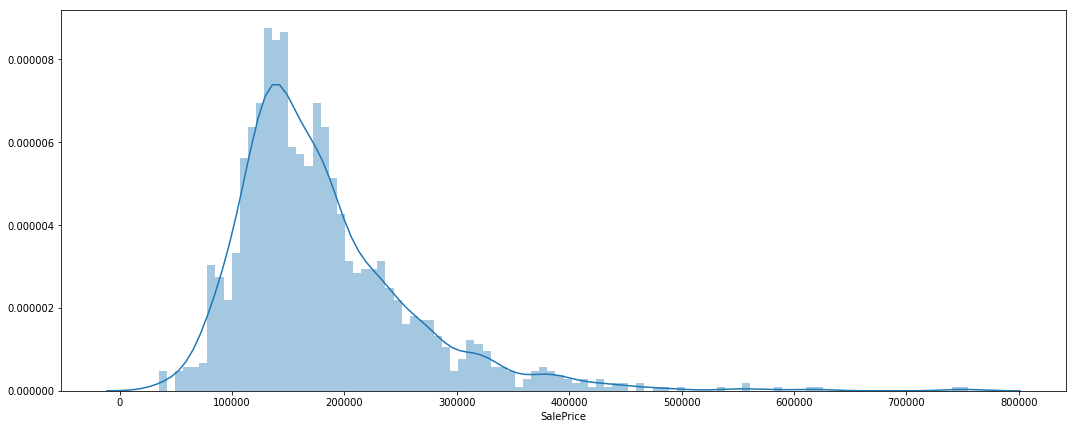

In [6]:
plt.figure(figsize=(18, 7))
sns.distplot(train.SalePrice, bins=100)
plt.xlabel("SalePrice")
plt.show()

## feature 살펴보기

In [127]:
def show_feature_cat(df, col_name):
    print(df[col_name].value_counts())
    print()
    print(df[col_name].describe()) 
    print()
    print("# of nan data:", df[col_name].isnull().sum())
    nan_per = len(df[df[col_name].isna()]) / len(df) * 100
    print("% of nan data: {}%".format(round(nan_per, 2)))
    
    plt.figure(figsize=(18, 7))
    
    plt.subplot(121)
    sns.countplot(x=col_name, data=df, palette="husl")
    plt.title(str(col_name), fontsize=15)

    plt.subplot(122)
    sns.boxplot(x=col_name, y="SalePrice", data=df, palette="husl")
    plt.title(str(col_name) +" boxplot", fontsize=15)

    plt.show()

In [128]:
def show_feature_num(df, col_name):
    notna = df[df[col_name].notna()]
    print(df[col_name].describe()) 
    print()
    print("# of nan data:", df[col_name].isnull().sum())
    nan_per = len(df[df[col_name].isna()]) / len(df) * 100
    print("% of nan data: {}%".format(round(nan_per, 2)))
    corr = np.corrcoef(notna.SalePrice, notna[col_name])[1][0] * 100
    print("correlation: {}%".format(round(corr, 2)))
    
    plt.figure(figsize=(18, 7))
    
    plt.subplot(121)
    sns.distplot(notna[col_name])
    plt.title(str(col_name), fontsize=15)


    plt.subplot(122)
    plt.scatter(df[col_name], df.SalePrice)
    plt.title(str(col_name) +" vs. target", fontsize=15)

    plt.show()

## Train

In [9]:
train.isnull().sum()

Id                  0
MSSubClass          0
MSZoning            0
LotFrontage       259
LotArea             0
Street              0
Alley            1369
LotShape            0
LandContour         0
Utilities           0
LotConfig           0
LandSlope           0
Neighborhood        0
Condition1          0
Condition2          0
BldgType            0
HouseStyle          0
OverallQual         0
OverallCond         0
YearBuilt           0
YearRemodAdd        0
RoofStyle           0
RoofMatl            0
Exterior1st         0
Exterior2nd         0
MasVnrType          8
MasVnrArea          8
ExterQual           0
ExterCond           0
Foundation          0
BsmtQual           37
BsmtCond           37
BsmtExposure       38
BsmtFinType1       37
BsmtFinSF1          0
BsmtFinType2       38
BsmtFinSF2          0
BsmtUnfSF           0
TotalBsmtSF         0
Heating             0
HeatingQC           0
CentralAir          0
Electrical          1
1stFlrSF            0
2ndFlrSF            0
LowQualFin

### Id

In [10]:
train.columns[0]

'Id'

In [11]:
print("{col} unique : {count}".format(col="Id", count=len(train.Id.unique())))
print("{col} null : {count}".format(col="Id", count=train.Id.isnull().sum()))

Id unique : 1460
Id null : 0


## Features
- 어떤 특징인가
- 쓸만한 특징인가
- 전처리 필요한가
    - NaN 처리
    - Outlier 처리
    - 카테고리 클래스 통합

### MSSubClass

MSSubClass: Identifies the type of dwelling involved in the sale.	

        20	1-STORY 1946 & NEWER ALL STYLES
        30	1-STORY 1945 & OLDER
        40	1-STORY W/FINISHED ATTIC ALL AGES
        45	1-1/2 STORY - UNFINISHED ALL AGES
        50	1-1/2 STORY FINISHED ALL AGES
        60	2-STORY 1946 & NEWER
        70	2-STORY 1945 & OLDER
        75	2-1/2 STORY ALL AGES
        80	SPLIT OR MULTI-LEVEL
        85	SPLIT FOYER
        90	DUPLEX - ALL STYLES AND AGES
       120	1-STORY PUD (Planned Unit Development) - 1946 & NEWER
       150	1-1/2 STORY PUD - ALL AGES
       160	2-STORY PUD - 1946 & NEWER
       180	PUD - MULTILEVEL - INCL SPLIT LEV/FOYER
       190	2 FAMILY CONVERSION - ALL STYLES AND AGES

20     536
60     299
50     144
120     87
30      69
160     63
70      60
80      58
90      52
190     30
85      20
75      16
45      12
180     10
40       4
Name: MSSubClass, dtype: int64

count    1460.000000
mean       56.897260
std        42.300571
min        20.000000
25%        20.000000
50%        50.000000
75%        70.000000
max       190.000000
Name: MSSubClass, dtype: float64

# of nan data: 0
% of nan data: 0.0%


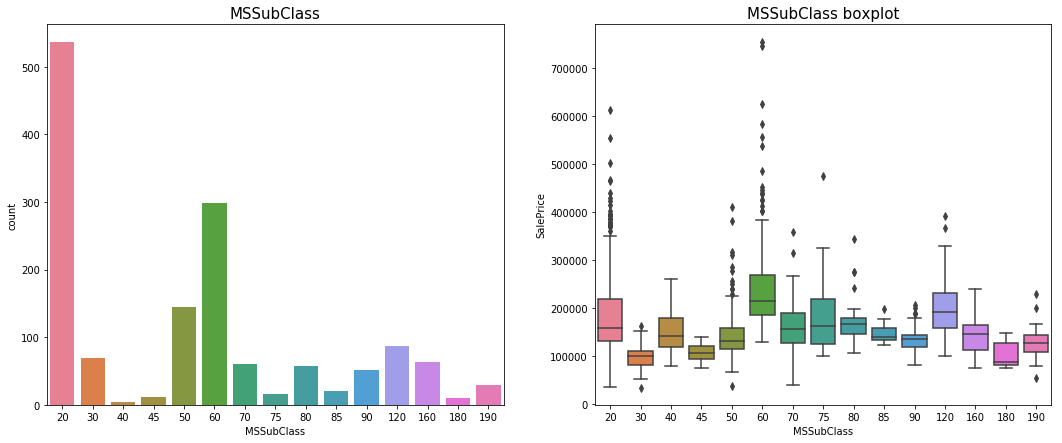

In [12]:
show_feature_cat(train, train.columns[1])

### MSZoning

MSZoning: Identifies the general zoning classification of the sale.
		
       A	Agriculture
       C	Commercial
       FV	Floating Village Residential
       I	Industrial
       RH	Residential High Density
       RL	Residential Low Density
       RP	Residential Low Density Park 
       RM	Residential Medium Density

RL         1151
RM          218
FV           65
RH           16
C (all)      10
Name: MSZoning, dtype: int64

count     1460
unique       5
top         RL
freq      1151
Name: MSZoning, dtype: object

# of nan data: 0
% of nan data: 0.0%


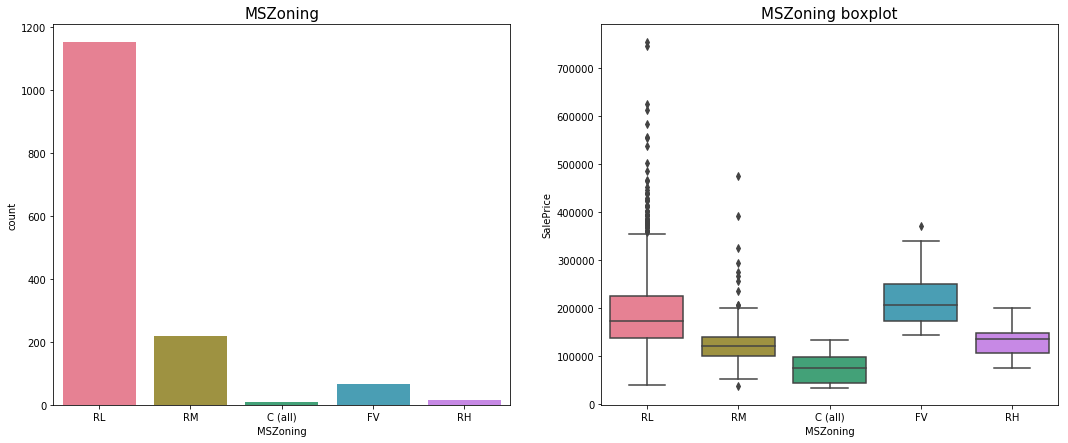

In [13]:
show_feature_cat(train, train.columns[2])

### LotFrontage

LotFrontage: Linear feet of street connected to property

- NaN 처리

count    1201.000000
mean       70.049958
std        24.284752
min        21.000000
25%        59.000000
50%        69.000000
75%        80.000000
max       313.000000
Name: LotFrontage, dtype: float64

# of nan data: 259
% of nan data: 17.74%
correlation: 35.18%


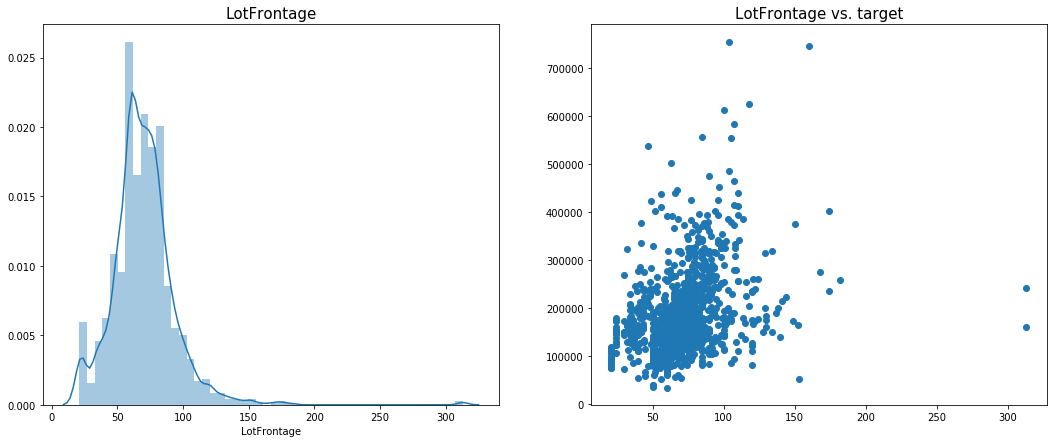

In [14]:
show_feature_num(train, train.columns[3])

### LotArea

LotArea: Lot size in square feet

- outlier 제거
- target과 양의 상관 관계

count      1460.000000
mean      10516.828082
std        9981.264932
min        1300.000000
25%        7553.500000
50%        9478.500000
75%       11601.500000
max      215245.000000
Name: LotArea, dtype: float64

# of nan data: 0
% of nan data: 0.0%
correlation: 26.38%


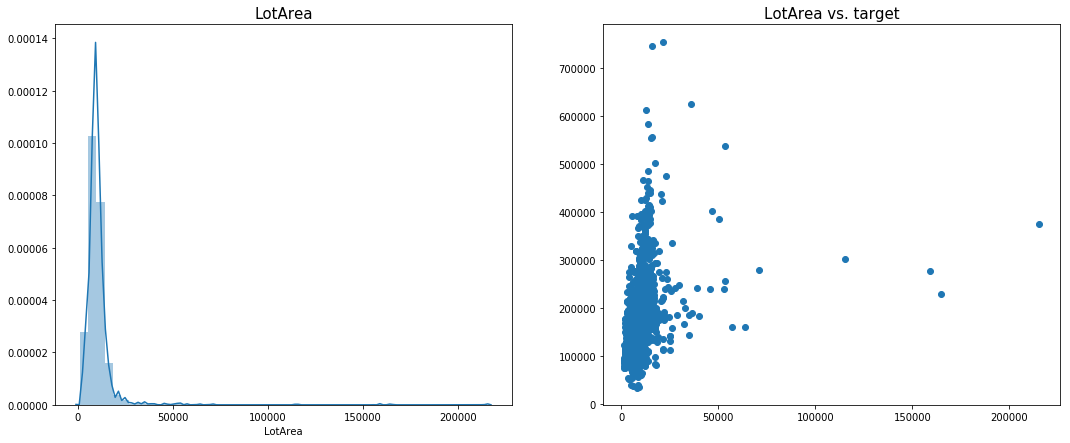

In [15]:
show_feature_num(train, train.columns[4])

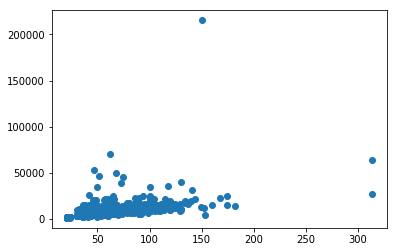

In [16]:
plt.scatter(train[train.columns[3]], train[train.columns[4]])
plt.show()

1182


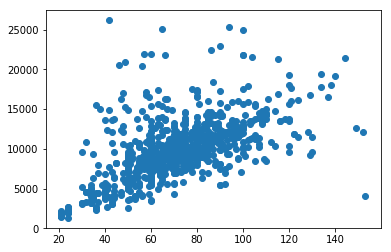

[[1.         0.63978202]
 [0.63978202 1.        ]]


In [17]:
df = train[train.LotFrontage.notna()]
df = df[df.LotFrontage < 160]
df = df[df.LotArea < 30000]
print(len(df))

plt.scatter(df.LotFrontage, df.LotArea)
plt.show()

print(np.corrcoef(df.LotFrontage, df.LotArea))

del(df)

In [18]:
display(train[train[train.columns[3]].isna()])  # 38

Id  MSSubClass MSZoning  LotFrontage  LotArea Street Alley LotShape  \
7        8          60       RL          NaN    10382   Pave   NaN      IR1   
12      13          20       RL          NaN    12968   Pave   NaN      IR2   
14      15          20       RL          NaN    10920   Pave   NaN      IR1   
16      17          20       RL          NaN    11241   Pave   NaN      IR1   
24      25          20       RL          NaN     8246   Pave   NaN      IR1   
31      32          20       RL          NaN     8544   Pave   NaN      IR1   
42      43          85       RL          NaN     9180   Pave   NaN      IR1   
43      44          20       RL          NaN     9200   Pave   NaN      IR1   
50      51          60       RL          NaN    13869   Pave   NaN      IR2   
64      65          60       RL          NaN     9375   Pave   NaN      Reg   
66      67          20       RL          NaN    19900   Pave   NaN      Reg   
76      77          20       RL          NaN     8475   Pave   NaN      IR1   
84      85          80       RL          NaN     8530   Pave   NaN      IR1   
95      96          60       RL          NaN     9765   Pave   NaN      IR2   
100    101          20       RL          NaN    10603   Pave   NaN      IR1   
104    105          50       RM          NaN     7758   Pave   NaN      Reg   
111    112          80       RL          NaN     7750   Pave   NaN      IR1   
113    114          20       RL          NaN    21000   Pave   NaN      Reg   
116    117          20       RL          NaN    11616   Pave   NaN      Reg   
120    121          80       RL          NaN    21453   Pave   NaN      IR1   
126    127         120       RL          NaN     4928   Pave   NaN      IR1   
131    132          60       RL          NaN    12224   Pave   NaN      IR1   
133    134          20       RL          NaN     6853   Pave   NaN      IR1   
136    137          20       RL          NaN    10355   Pave   NaN      IR1   
147    148          60       RL          NaN     9505   Pave   NaN      IR1   
149    150          50       RM          NaN     6240   Pave   NaN      Reg   
152    153          60       RL          NaN    14803   Pave   NaN      IR1   
153    154          20       RL          NaN    13500   Pave   NaN      Reg   
160    161          20       RL          NaN    11120   Pave   NaN      IR1   
166    167          20       RL          NaN    10708   Pave   NaN      IR1   
169    170          20       RL          NaN    16669   Pave   NaN      IR1   
170    171          50       RM          NaN    12358   Pave   NaN      IR1   
177    178          50       RL          NaN    13650   Pave   NaN      Reg   
180    181         160       FV          NaN     2117   Pave   NaN      Reg   
186    187          80       RL          NaN     9947   Pave   NaN      IR1   
191    192          60       RL          NaN     7472   Pave   NaN      IR1   
203    204         120       RM          NaN     4438   Pave   NaN      Reg   
207    208          20       RL          NaN    12493   Pave   NaN      IR1   
208    209          60       RL          NaN    14364   Pave   NaN      IR1   
214    215          60       RL          NaN    10900   Pave   NaN      IR1   
218    219          50       RL          NaN    15660   Pave   NaN      IR1   
221    222          60       RL          NaN     8068   Pave   NaN      IR1   
234    235          60       RL          NaN     7851   Pave   NaN      Reg   
237    238          60       RL          NaN     9453   Pave   NaN      IR1   
244    245          60       RL          NaN     8880   Pave   NaN      IR1   
249    250          50       RL          NaN   159000   Pave   NaN      IR2   
269    270          20       RL          NaN     7917   Pave   NaN      IR1   
287    288          20       RL          NaN     8125   Pave   NaN      IR1   
288    289          20       RL          NaN     9819   Pave   NaN      IR1   
293    294          60       RL          NaN    16659   Pa

### Street

Street: Type of road access to property

       Grvl	Gravel	
       Pave	Paved

- feature 제거 

Pave    1454
Grvl       6
Name: Street, dtype: int64

count     1460
unique       2
top       Pave
freq      1454
Name: Street, dtype: object

# of nan data: 0
% of nan data: 0.0%


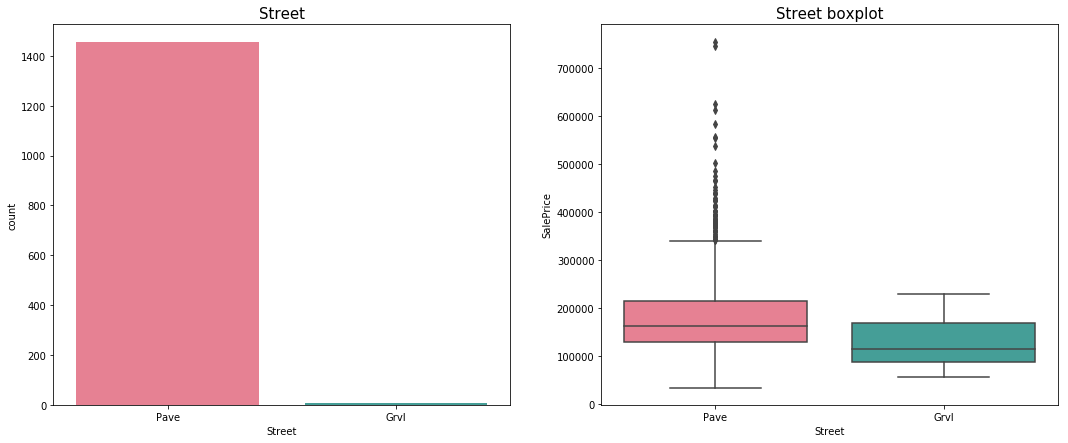

In [19]:
show_feature_cat(train, train.columns[5])

In [20]:
train.Street.value_counts()

Pave    1454
Grvl       6
Name: Street, dtype: int64

### Alley

Alley: Type of alley access to property

       Grvl	Gravel
       Pave	Paved
       NA 	No alley access

- NaN => 그대로 두기
- Grvl, Pave, NA 클래스 => one-hot encoding

Grvl    50
Pave    41
Name: Alley, dtype: int64

count       91
unique       2
top       Grvl
freq        50
Name: Alley, dtype: object

# of nan data: 1369
% of nan data: 93.77%


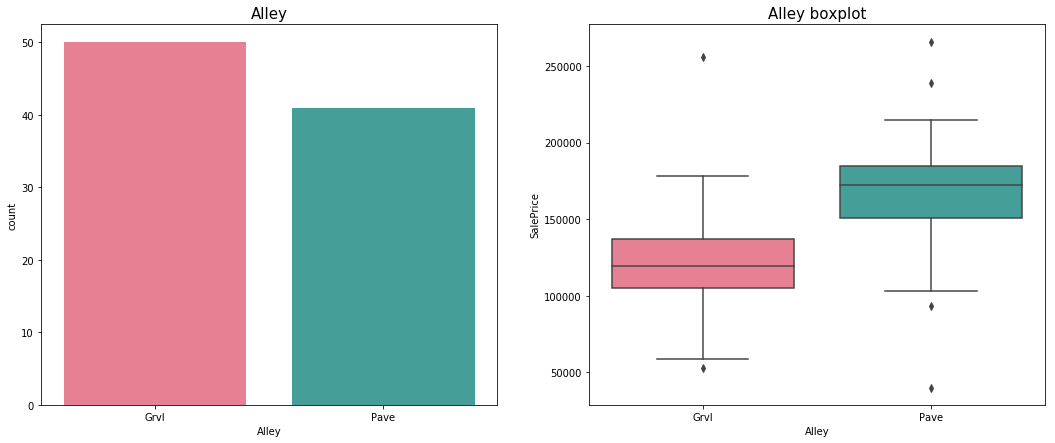

In [21]:
show_feature_cat(train, train.columns[6])

In [22]:
train.Alley.value_counts()

Grvl    50
Pave    41
Name: Alley, dtype: int64

### LotShape

LotShape: General shape of property

       Reg	Regular	
       IR1	Slightly irregular
       IR2	Moderately Irregular
       IR3	Irregular

Reg    925
IR1    484
IR2     41
IR3     10
Name: LotShape, dtype: int64

count     1460
unique       4
top        Reg
freq       925
Name: LotShape, dtype: object

# of nan data: 0
% of nan data: 0.0%


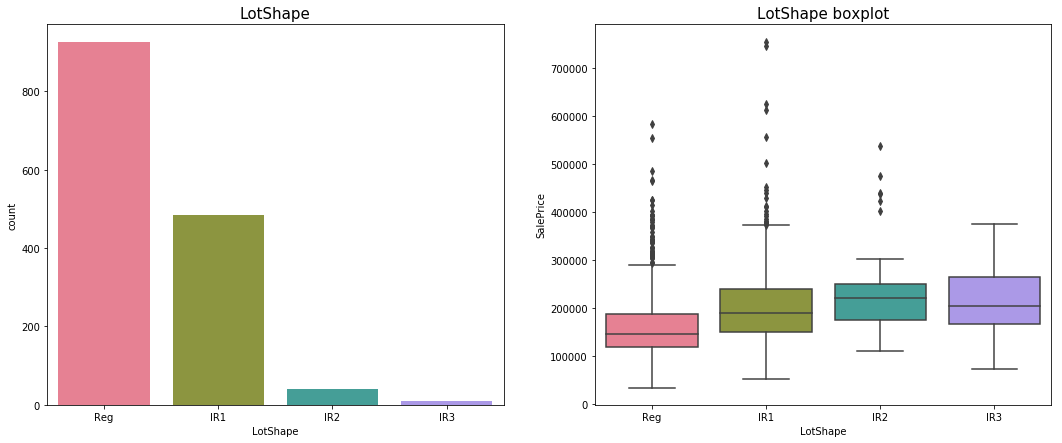

In [23]:
show_feature_cat(train, train.columns[7])

### LandContour

LandContour: Flatness of the property

       Lvl	Near Flat/Level	
       Bnk	Banked - Quick and significant rise from street grade to building
       HLS	Hillside - Significant slope from side to side
       Low	Depression

Lvl    1311
Bnk      63
HLS      50
Low      36
Name: LandContour, dtype: int64

count     1460
unique       4
top        Lvl
freq      1311
Name: LandContour, dtype: object

# of nan data: 0
% of nan data: 0.0%


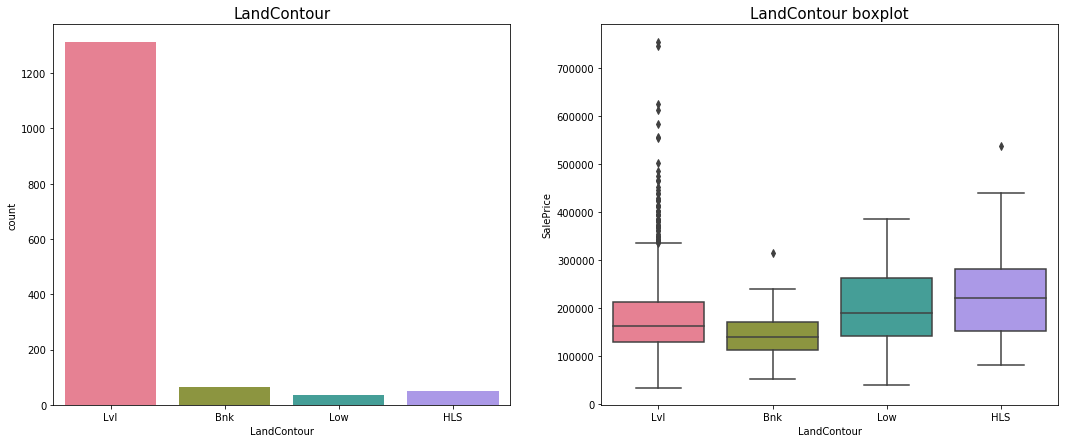

In [24]:
show_feature_cat(train, train.columns[8])

In [25]:
train.LandContour.value_counts(normalize=True)

Lvl    0.897945
Bnk    0.043151
HLS    0.034247
Low    0.024658
Name: LandContour, dtype: float64

### Utilities

Utilities: Type of utilities available
		
       AllPub	All public Utilities (E,G,W,& S)	
       NoSewr	Electricity, Gas, and Water (Septic Tank)
       NoSeWa	Electricity and Gas Only
       ELO	Electricity only

- feature 제거

AllPub    1459
NoSeWa       1
Name: Utilities, dtype: int64

count       1460
unique         2
top       AllPub
freq        1459
Name: Utilities, dtype: object

# of nan data: 0
% of nan data: 0.0%


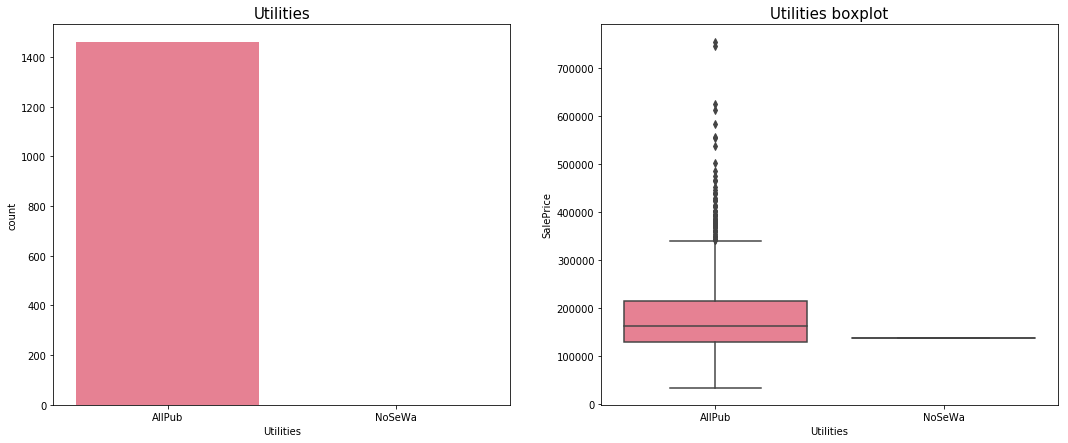

In [26]:
show_feature_cat(train, train.columns[9])

In [27]:
train.Utilities.value_counts()

AllPub    1459
NoSeWa       1
Name: Utilities, dtype: int64

### LotConfig

LotConfig: Lot configuration

       Inside	Inside lot
       Corner	Corner lot
       CulDSac	Cul-de-sac
       FR2	Frontage on 2 sides of property
       FR3	Frontage on 3 sides of property

Inside     1052
Corner      263
CulDSac      94
FR2          47
FR3           4
Name: LotConfig, dtype: int64

count       1460
unique         5
top       Inside
freq        1052
Name: LotConfig, dtype: object

# of nan data: 0
% of nan data: 0.0%


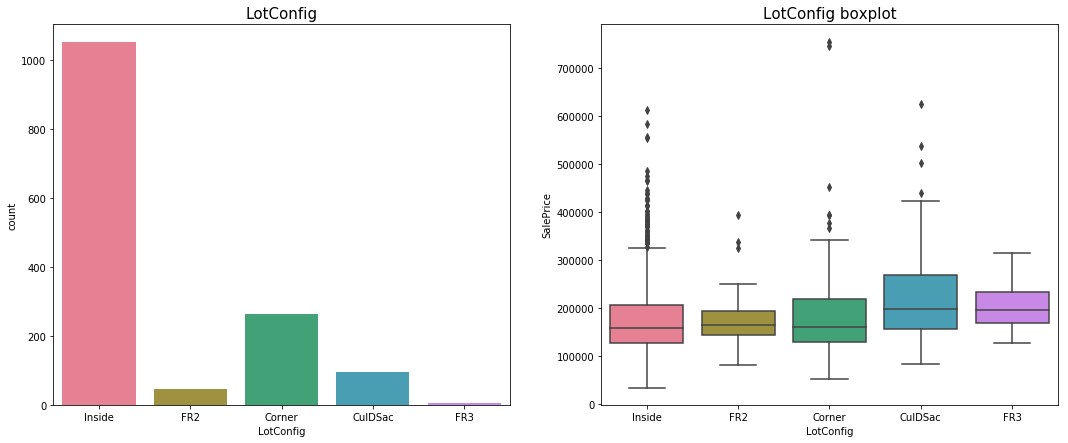

In [28]:
show_feature_cat(train, train.columns[10])

### LandSlope

LandSlope: Slope of property
		
       Gtl	Gentle slope
       Mod	Moderate Slope	
       Sev	Severe Slope

Gtl    1382
Mod      65
Sev      13
Name: LandSlope, dtype: int64

count     1460
unique       3
top        Gtl
freq      1382
Name: LandSlope, dtype: object

# of nan data: 0
% of nan data: 0.0%


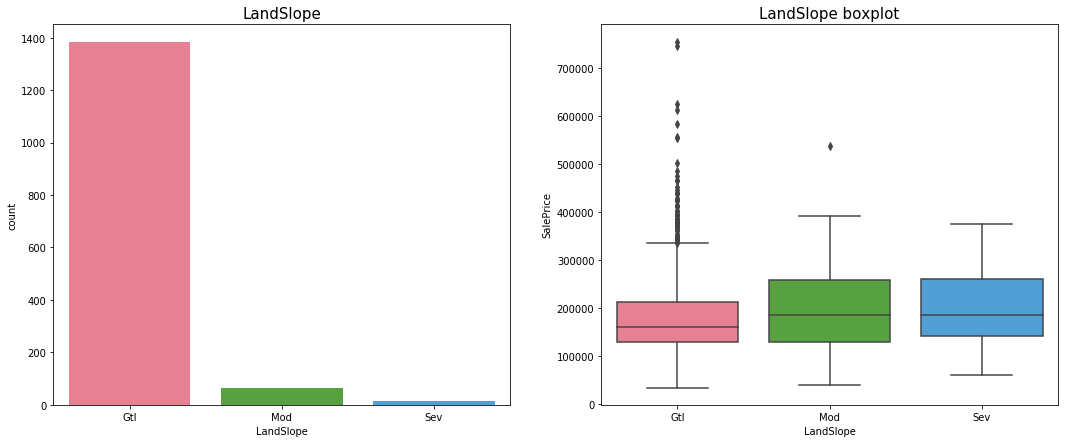

In [29]:
show_feature_cat(train, train.columns[11])

### Neighborhood

Neighborhood: Physical locations within Ames city limits

       Blmngtn	Bloomington Heights
       Blueste	Bluestem
       BrDale	Briardale
       BrkSide	Brookside
       ClearCr	Clear Creek
       CollgCr	College Creek
       Crawfor	Crawford
       Edwards	Edwards
       Gilbert	Gilbert
       IDOTRR	Iowa DOT and Rail Road
       MeadowV	Meadow Village
       Mitchel	Mitchell
       Names	North Ames
       NoRidge	Northridge
       NPkVill	Northpark Villa
       NridgHt	Northridge Heights
       NWAmes	Northwest Ames
       OldTown	Old Town
       SWISU	South & West of Iowa State University
       Sawyer	Sawyer
       SawyerW	Sawyer West
       Somerst	Somerset
       StoneBr	Stone Brook
       Timber	Timberland
       Veenker	Veenker

NAmes      225
CollgCr    150
OldTown    113
Edwards    100
Somerst     86
Gilbert     79
NridgHt     77
Sawyer      74
NWAmes      73
SawyerW     59
BrkSide     58
Crawfor     51
Mitchel     49
NoRidge     41
Timber      38
IDOTRR      37
ClearCr     28
SWISU       25
StoneBr     25
MeadowV     17
Blmngtn     17
BrDale      16
Veenker     11
NPkVill      9
Blueste      2
Name: Neighborhood, dtype: int64

count      1460
unique       25
top       NAmes
freq        225
Name: Neighborhood, dtype: object

# of nan data: 0
% of nan data: 0.0%


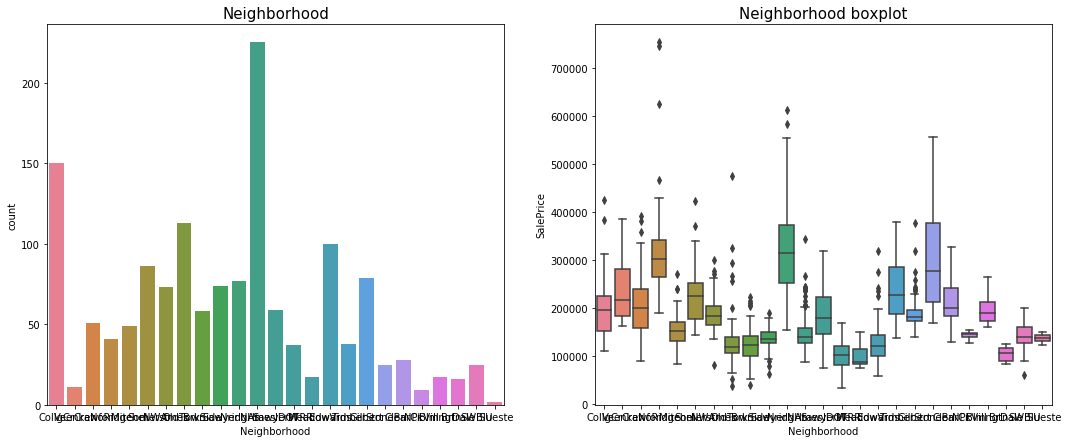

In [30]:
show_feature_cat(train, train.columns[12])

### Condition1

Condition1: Proximity to various conditions
	
       Artery	Adjacent to arterial street
       Feedr	Adjacent to feeder street	
       Norm	Normal	
       RRNn	Within 200' of North-South Railroad
       RRAn	Adjacent to North-South Railroad
       PosN	Near positive off-site feature--park, greenbelt, etc.
       PosA	Adjacent to postive off-site feature
       RRNe	Within 200' of East-West Railroad
       RRAe	Adjacent to East-West Railroad

- Normal vs. others
- 전처리 필요

Norm      1260
Feedr       81
Artery      48
RRAn        26
PosN        19
RRAe        11
PosA         8
RRNn         5
RRNe         2
Name: Condition1, dtype: int64

count     1460
unique       9
top       Norm
freq      1260
Name: Condition1, dtype: object

# of nan data: 0
% of nan data: 0.0%


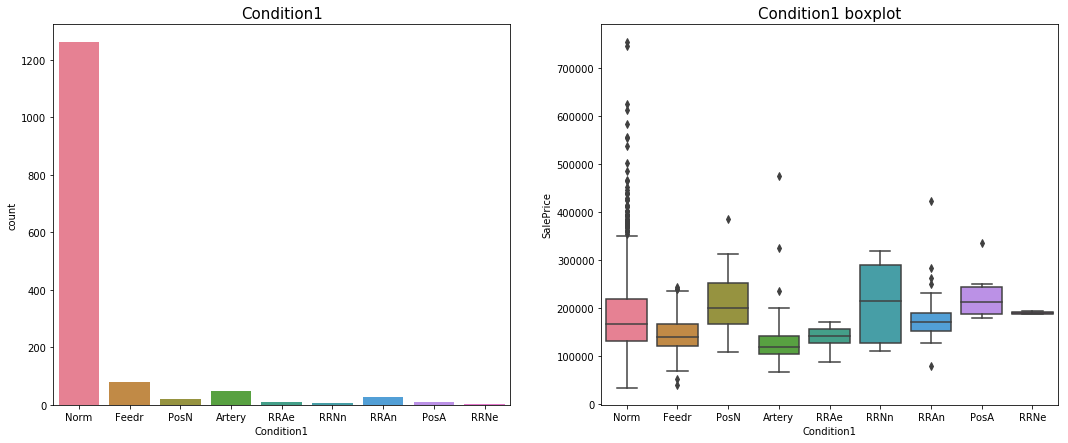

In [31]:
show_feature_cat(train, train.columns[13])

In [32]:
train.Condition1.value_counts()

Norm      1260
Feedr       81
Artery      48
RRAn        26
PosN        19
RRAe        11
PosA         8
RRNn         5
RRNe         2
Name: Condition1, dtype: int64

### Condition2

Condition2: Proximity to various conditions (if more than one is present)
		
       Artery	Adjacent to arterial street
       Feedr	Adjacent to feeder street	
       Norm	Normal	
       RRNn	Within 200' of North-South Railroad
       RRAn	Adjacent to North-South Railroad
       PosN	Near positive off-site feature--park, greenbelt, etc.
       PosA	Adjacent to postive off-site feature
       RRNe	Within 200' of East-West Railroad
       RRAe	Adjacent to East-West Railroad

- Normal vs. others
- 전처리 필요

Norm      1445
Feedr        6
PosN         2
Artery       2
RRNn         2
RRAe         1
RRAn         1
PosA         1
Name: Condition2, dtype: int64

count     1460
unique       8
top       Norm
freq      1445
Name: Condition2, dtype: object

# of nan data: 0
% of nan data: 0.0%


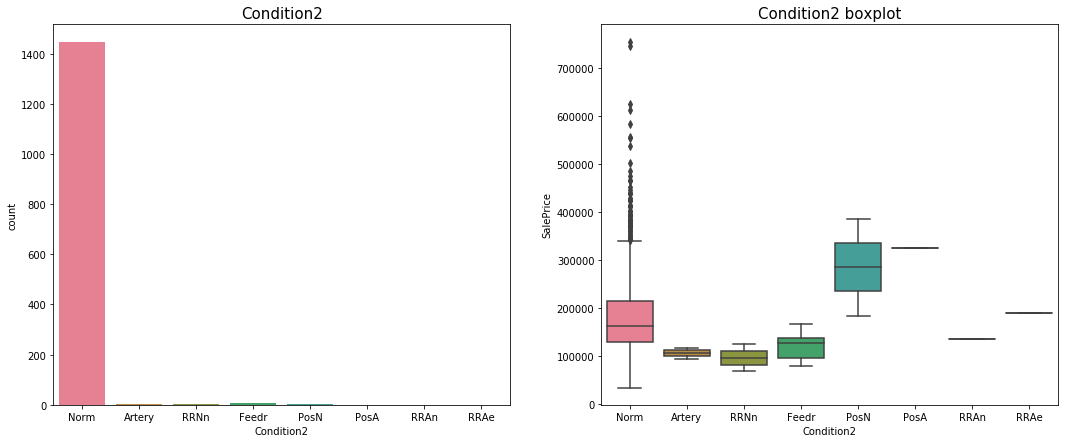

In [33]:
show_feature_cat(train, train.columns[14])

In [34]:
train.Condition2.value_counts()

Norm      1445
Feedr        6
PosN         2
Artery       2
RRNn         2
RRAe         1
RRAn         1
PosA         1
Name: Condition2, dtype: int64

### BldgType

BldgType: Type of dwelling
		
       1Fam	Single-family Detached	
       2FmCon	Two-family Conversion; originally built as one-family dwelling
       Duplx	Duplex
       TwnhsE	Townhouse End Unit
       TwnhsI	Townhouse Inside Unit

1Fam      1220
TwnhsE     114
Duplex      52
Twnhs       43
2fmCon      31
Name: BldgType, dtype: int64

count     1460
unique       5
top       1Fam
freq      1220
Name: BldgType, dtype: object

# of nan data: 0
% of nan data: 0.0%


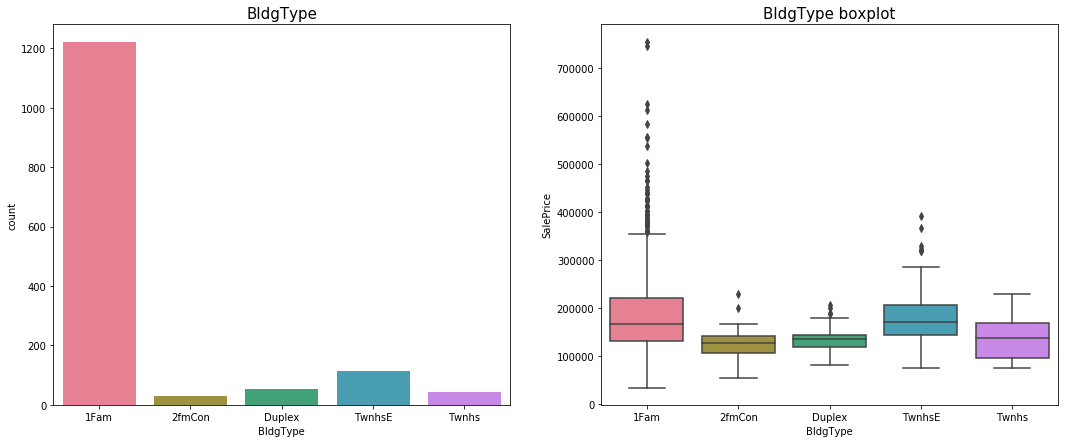

In [35]:
show_feature_cat(train, train.columns[15])

### HouseStyle

HouseStyle: Style of dwelling
	
       1Story	One story
       1.5Fin	One and one-half story: 2nd level finished
       1.5Unf	One and one-half story: 2nd level unfinished
       2Story	Two story
       2.5Fin	Two and one-half story: 2nd level finished
       2.5Unf	Two and one-half story: 2nd level unfinished
       SFoyer	Split Foyer
       SLvl	Split Level

1Story    726
2Story    445
1.5Fin    154
SLvl       65
SFoyer     37
1.5Unf     14
2.5Unf     11
2.5Fin      8
Name: HouseStyle, dtype: int64

count       1460
unique         8
top       1Story
freq         726
Name: HouseStyle, dtype: object

# of nan data: 0
% of nan data: 0.0%


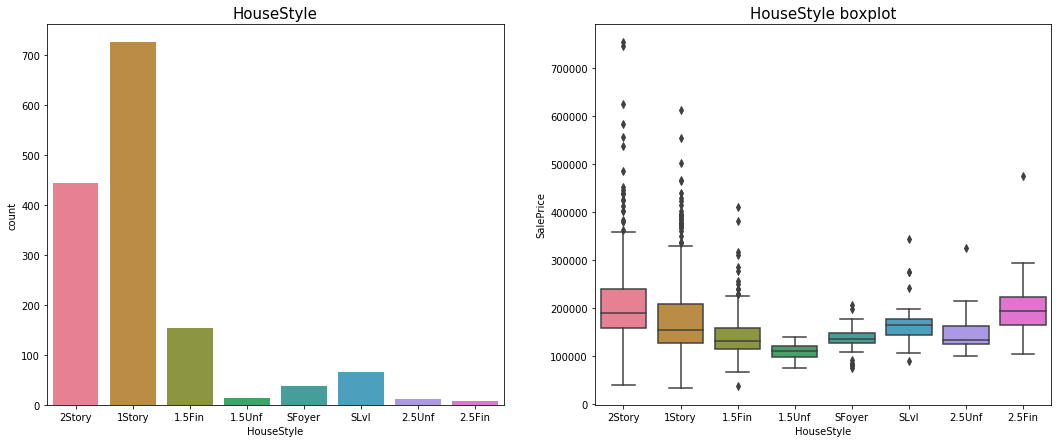

In [36]:
show_feature_cat(train, train.columns[16])

### OverallQual

OverallQual: Rates the overall material and finish of the house

       10	Very Excellent
       9	Excellent
       8	Very Good
       7	Good
       6	Above Average
       5	Average
       4	Below Average
       3	Fair
       2	Poor
       1	Very Poor

- numeric으로 사용(data embeding)

5     397
6     374
7     319
8     168
4     116
9      43
3      20
10     18
2       3
1       2
Name: OverallQual, dtype: int64

count    1460.000000
mean        6.099315
std         1.382997
min         1.000000
25%         5.000000
50%         6.000000
75%         7.000000
max        10.000000
Name: OverallQual, dtype: float64

# of nan data: 0
% of nan data: 0.0%


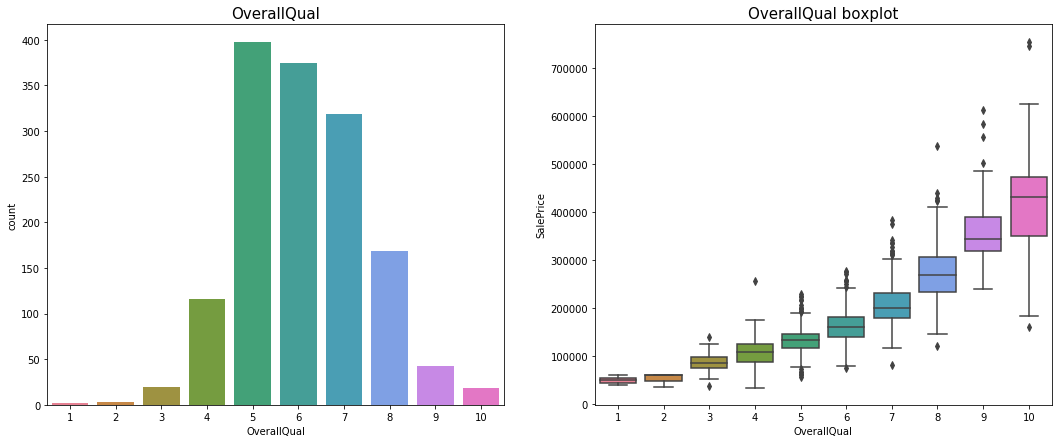

In [37]:
show_feature_cat(train, train.columns[17])

### OverallCond

OverallCond: Rates the overall condition of the house

       10	Very Excellent
       9	Excellent
       8	Very Good
       7	Good
       6	Above Average	
       5	Average
       4	Below Average	
       3	Fair
       2	Poor
       1	Very Poor

- numeric으로 사용(data embeding)

5    821
6    252
7    205
8     72
4     57
3     25
9     22
2      5
1      1
Name: OverallCond, dtype: int64

count    1460.000000
mean        5.575342
std         1.112799
min         1.000000
25%         5.000000
50%         5.000000
75%         6.000000
max         9.000000
Name: OverallCond, dtype: float64

# of nan data: 0
% of nan data: 0.0%


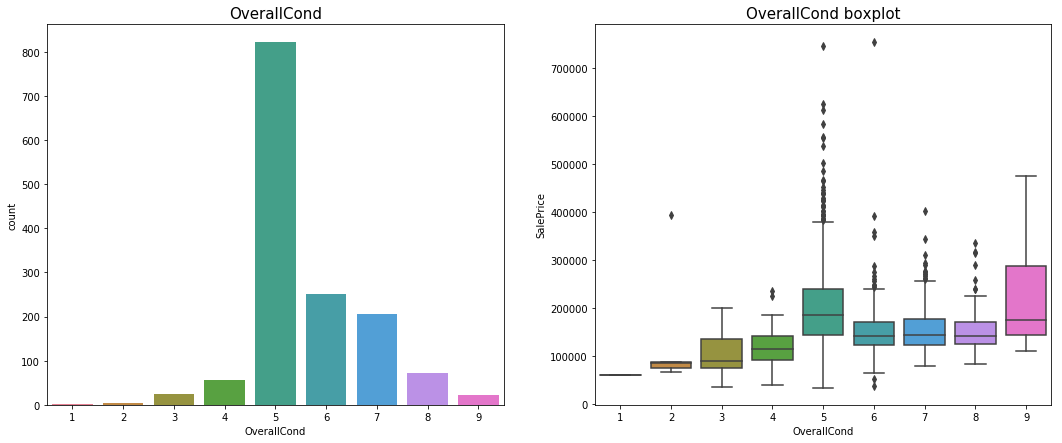

In [38]:
show_feature_cat(train, train.columns[18])

### YearBuilt

YearBuilt: Original construction date

- numeric으로 사용(data embeding)

count    1460.000000
mean     1971.267808
std        30.202904
min      1872.000000
25%      1954.000000
50%      1973.000000
75%      2000.000000
max      2010.000000
Name: YearBuilt, dtype: float64

# of nan data: 0
% of nan data: 0.0%
correlation: 52.29%


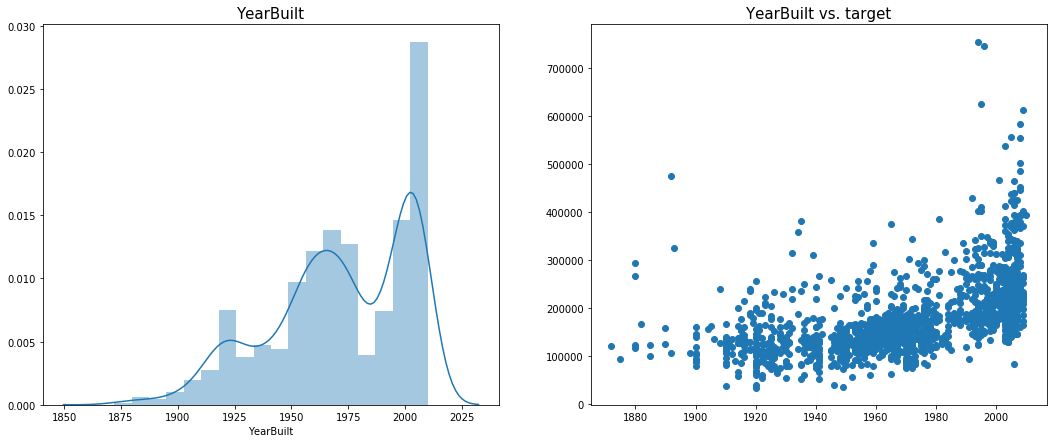

In [39]:
show_feature_num(train, train.columns[19])

### YearRemodAdd

YearRemodAdd: Remodel date (same as construction date if no remodeling or additions)

- numeric으로 사용(data embeding)

count    1460.000000
mean     1984.865753
std        20.645407
min      1950.000000
25%      1967.000000
50%      1994.000000
75%      2004.000000
max      2010.000000
Name: YearRemodAdd, dtype: float64

# of nan data: 0
% of nan data: 0.0%
correlation: 50.71%


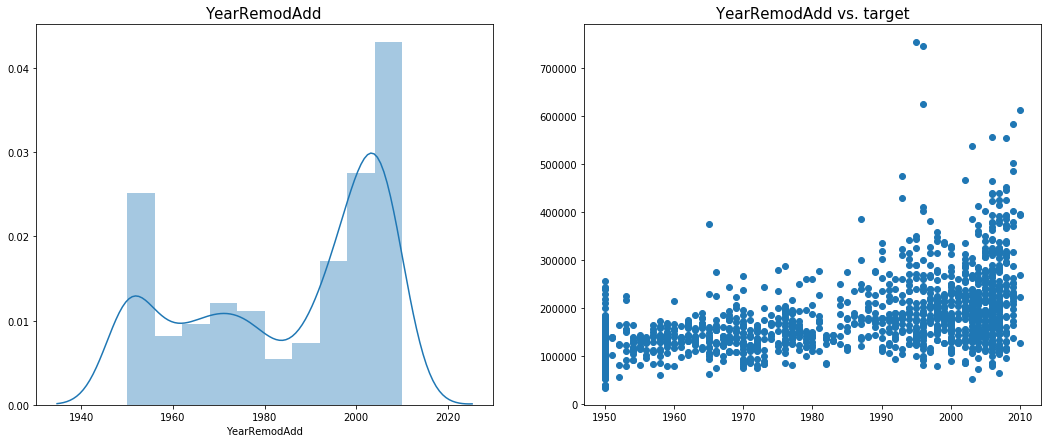

In [40]:
show_feature_num(train, train.columns[20])

### RoofStyle

RoofStyle: Type of roof

       Flat	Flat
       Gable	Gable
       Gambrel	Gabrel (Barn)
       Hip	Hip
       Mansard	Mansard
       Shed	Shed

Gable      1141
Hip         286
Flat         13
Gambrel      11
Mansard       7
Shed          2
Name: RoofStyle, dtype: int64

count      1460
unique        6
top       Gable
freq       1141
Name: RoofStyle, dtype: object

# of nan data: 0
% of nan data: 0.0%


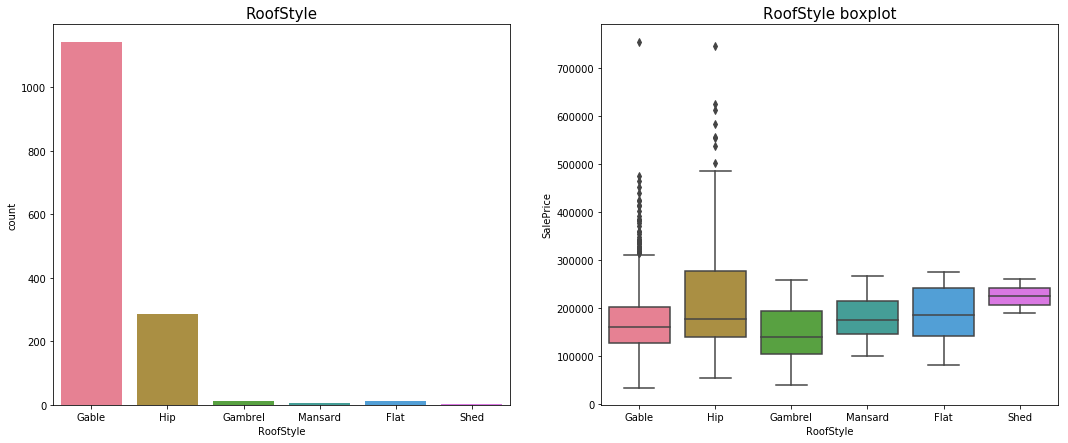

In [41]:
show_feature_cat(train, train.columns[21])

In [42]:
train.RoofStyle.value_counts()

Gable      1141
Hip         286
Flat         13
Gambrel      11
Mansard       7
Shed          2
Name: RoofStyle, dtype: int64

### RoofMatl

RoofMatl: Roof material

       ClyTile	Clay or Tile
       CompShg	Standard (Composite) Shingle
       Membran	Membrane
       Metal	Metal
       Roll	Roll
       Tar&Grv	Gravel & Tar
       WdShake	Wood Shakes
       WdShngl	Wood Shingles

- Feature 제거

CompShg    1434
Tar&Grv      11
WdShngl       6
WdShake       5
ClyTile       1
Roll          1
Metal         1
Membran       1
Name: RoofMatl, dtype: int64

count        1460
unique          8
top       CompShg
freq         1434
Name: RoofMatl, dtype: object

# of nan data: 0
% of nan data: 0.0%


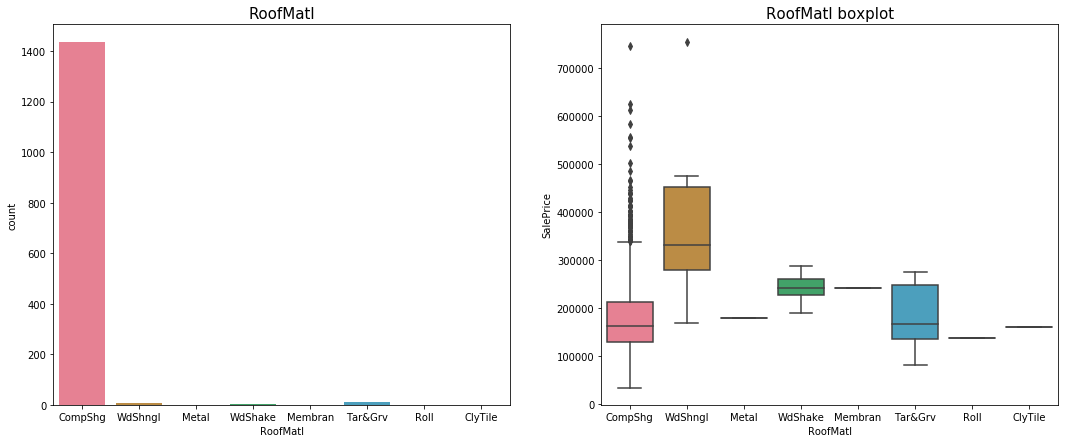

In [43]:
show_feature_cat(train, train.columns[22])

In [44]:
train.RoofMatl.value_counts()

CompShg    1434
Tar&Grv      11
WdShngl       6
WdShake       5
ClyTile       1
Roll          1
Metal         1
Membran       1
Name: RoofMatl, dtype: int64

### Exterior1st

Exterior1st: Exterior covering on house

       AsbShng	Asbestos Shingles
       AsphShn	Asphalt Shingles
       BrkComm	Brick Common
       BrkFace	Brick Face
       CBlock	Cinder Block
       CemntBd	Cement Board
       HdBoard	Hard Board
       ImStucc	Imitation Stucco
       MetalSd	Metal Siding
       Other	Other
       Plywood	Plywood
       PreCast	PreCast	
       Stone	Stone
       Stucco	Stucco
       VinylSd	Vinyl Siding
       Wd Sdng	Wood Siding
       WdShing	Wood Shingles

- 클래스 단순화
    - 데이터 수가 10개 미만인 클래스를 other로 합치기

VinylSd    515
HdBoard    222
MetalSd    220
Wd Sdng    206
Plywood    108
CemntBd     61
BrkFace     50
WdShing     26
Stucco      25
AsbShng     20
Stone        2
BrkComm      2
ImStucc      1
AsphShn      1
CBlock       1
Name: Exterior1st, dtype: int64

count        1460
unique         15
top       VinylSd
freq          515
Name: Exterior1st, dtype: object

# of nan data: 0
% of nan data: 0.0%


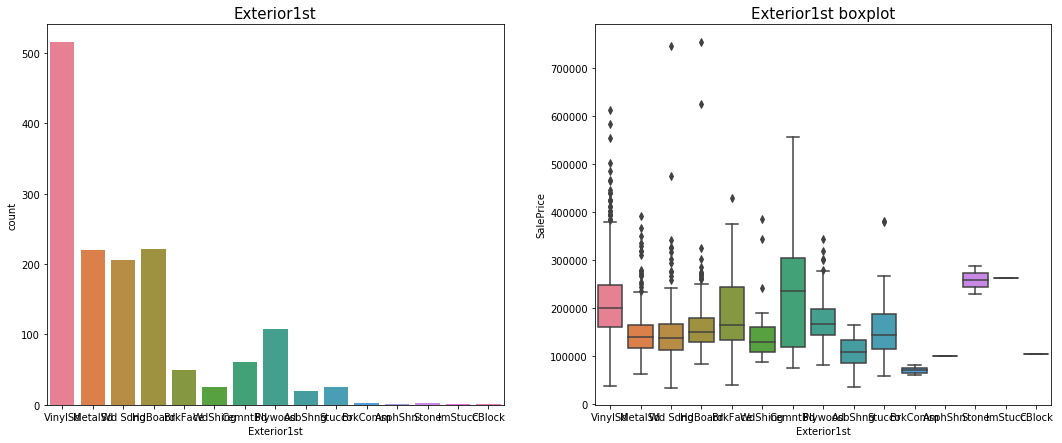

In [45]:
show_feature_cat(train, train.columns[23])

In [46]:
train.Exterior1st.value_counts()

VinylSd    515
HdBoard    222
MetalSd    220
Wd Sdng    206
Plywood    108
CemntBd     61
BrkFace     50
WdShing     26
Stucco      25
AsbShng     20
Stone        2
BrkComm      2
ImStucc      1
AsphShn      1
CBlock       1
Name: Exterior1st, dtype: int64

### Exterior2nd

Exterior2nd: Exterior covering on house (if more than one material)

       AsbShng	Asbestos Shingles
       AsphShn	Asphalt Shingles
       BrkComm	Brick Common
       BrkFace	Brick Face
       CBlock	Cinder Block
       CemntBd	Cement Board
       HdBoard	Hard Board
       ImStucc	Imitation Stucco
       MetalSd	Metal Siding
       Other	Other
       Plywood	Plywood
       PreCast	PreCast
       Stone	Stone
       Stucco	Stucco
       VinylSd	Vinyl Siding
       Wd Sdng	Wood Siding
       WdShing	Wood Shingles

- 클래스 단순화
    - 데이터 수가 10개 미만인 클래스를 other로 합치기

VinylSd    504
MetalSd    214
HdBoard    207
Wd Sdng    197
Plywood    142
CmentBd     60
Wd Shng     38
Stucco      26
BrkFace     25
AsbShng     20
ImStucc     10
Brk Cmn      7
Stone        5
AsphShn      3
Other        1
CBlock       1
Name: Exterior2nd, dtype: int64

count        1460
unique         16
top       VinylSd
freq          504
Name: Exterior2nd, dtype: object

# of nan data: 0
% of nan data: 0.0%


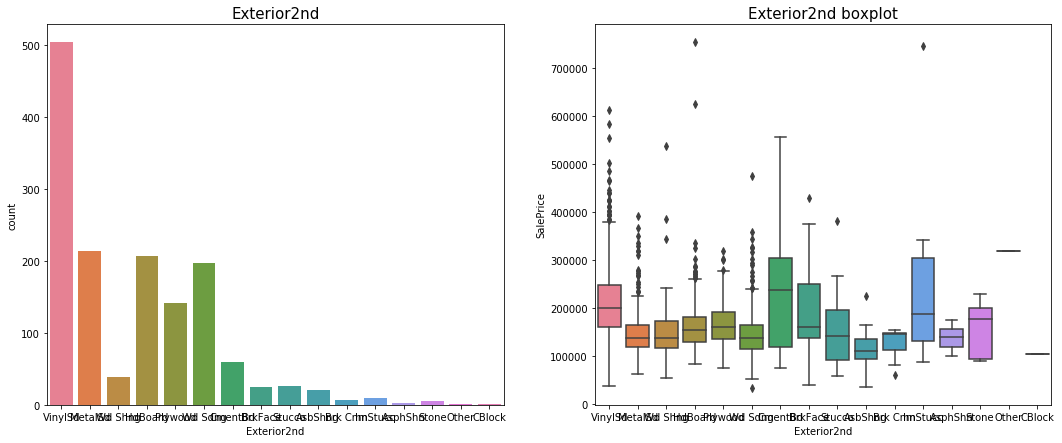

In [47]:
show_feature_cat(train, train.columns[24])

In [48]:
train.Exterior2nd.value_counts()

VinylSd    504
MetalSd    214
HdBoard    207
Wd Sdng    197
Plywood    142
CmentBd     60
Wd Shng     38
Stucco      26
BrkFace     25
AsbShng     20
ImStucc     10
Brk Cmn      7
Stone        5
AsphShn      3
Other        1
CBlock       1
Name: Exterior2nd, dtype: int64

### MasVnrType

MasVnrType: Masonry veneer type

       BrkCmn	Brick Common
       BrkFace	Brick Face
       CBlock	Cinder Block
       None	None
       Stone	Stone

- NaN 데이터 => None class에 넣기

None       864
BrkFace    445
Stone      128
BrkCmn      15
Name: MasVnrType, dtype: int64

count     1452
unique       4
top       None
freq       864
Name: MasVnrType, dtype: object

# of nan data: 8
% of nan data: 0.55%


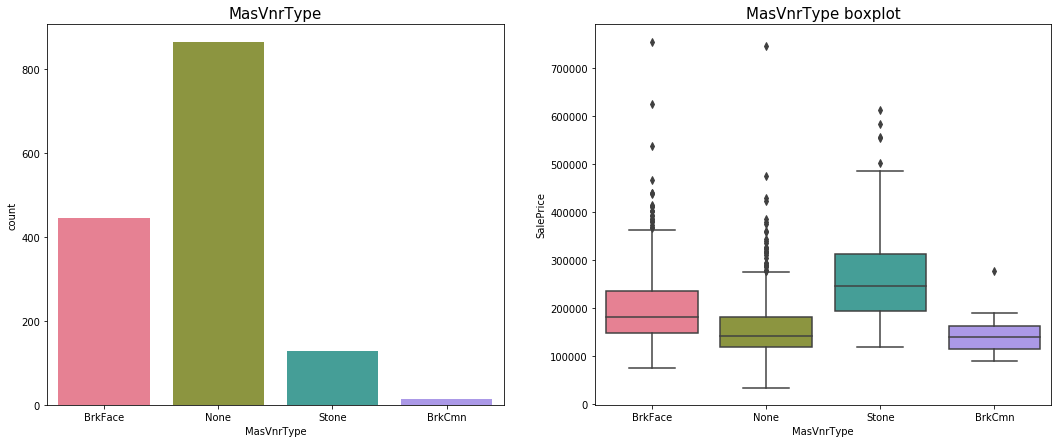

In [49]:
show_feature_cat(train, train.columns[25])

### MasVnrArea

MasVnrArea: Masonry veneer area in square feet

- NaN 값은 0으로 

count    1452.000000
mean      103.685262
std       181.066207
min         0.000000
25%         0.000000
50%         0.000000
75%       166.000000
max      1600.000000
Name: MasVnrArea, dtype: float64

# of nan data: 8
% of nan data: 0.55%
correlation: 47.75%


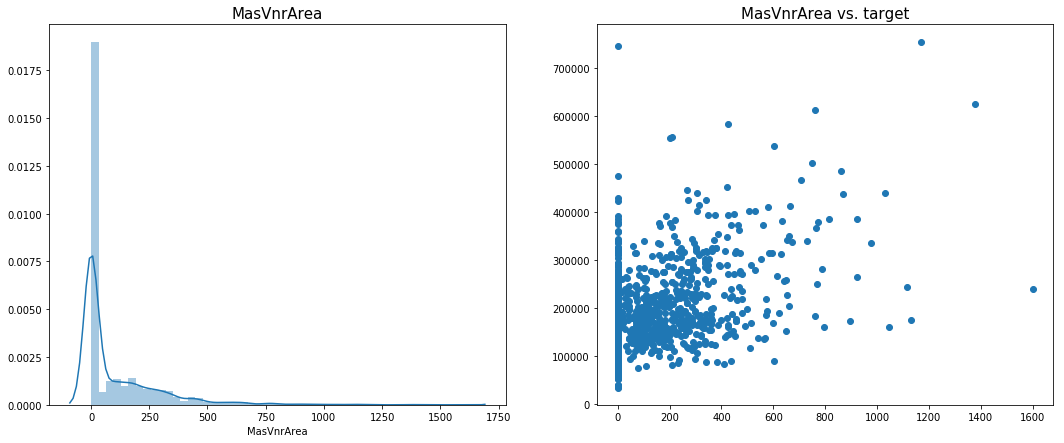

In [50]:
show_feature_num(train, train.columns[26])

In [51]:
train[train[train.columns[26]].isna()]

Id  MSSubClass MSZoning  LotFrontage  LotArea Street Alley LotShape  \
234    235          60       RL          NaN     7851   Pave   NaN      Reg   
529    530          20       RL          NaN    32668   Pave   NaN      IR1   
650    651          60       FV         65.0     8125   Pave   NaN      Reg   
936    937          20       RL         67.0    10083   Pave   NaN      Reg   
973    974          20       FV         95.0    11639   Pave   NaN      Reg   
977    978         120       FV         35.0     4274   Pave  Pave      IR1   
1243  1244          20       RL        107.0    13891   Pave   NaN      Reg   
1278  1279          60       RL         75.0     9473   Pave   NaN      Reg   

     LandContour Utilities LotConfig LandSlope Neighborhood Condition1  \
234          Lvl    AllPub    Inside       Gtl      Gilbert       Norm   
529          Lvl    AllPub   CulDSac       Gtl      Crawfor       Norm   
650          Lvl    AllPub    Inside       Gtl      Somerst       Norm   
936          Lvl    AllPub    Inside       Gtl      SawyerW       Norm   
973          Lvl    AllPub    Corner       Gtl      Somerst       Norm   
977          Lvl    AllPub    Inside       Gtl      Somerst       Norm   
1243         Lvl    AllPub    Inside       Gtl      NridgHt       Norm   
1278         Lvl    AllPub    Inside       Gtl      CollgCr       Norm   

     Condition2 BldgType HouseStyle  OverallQual  OverallCond  YearBuilt  \
234        Norm     1Fam     2Story            6            5       2002   
529        Norm     1Fam     1Story            6            3       1957   
650        Norm     1Fam     2Story            7            6       2007   
936        Norm     1Fam     1Story            7            5       2003   
973        Norm     1Fam     1Story            7            5       2007   
977        Norm   TwnhsE     1Story            7            5       2006   
1243       Norm     1Fam     1Story           10            5       2006   
1278       Norm     1Fam     2Story            8            5       2002   

      YearRemodAdd RoofStyle RoofMatl Exterior1st Exterior2nd MasVnrType  \
234           2002     Gable  CompShg     VinylSd     VinylSd        NaN   
529           1975       Hip  CompShg     Wd Sdng       Stone        NaN   
650           2007     Gable  CompShg     CemntBd     CmentBd        NaN   
936           2003     Gable  CompShg     VinylSd     VinylSd        NaN   
973           2008     Gable  CompShg     CemntBd     CmentBd        NaN   
977           2007     Gable  CompShg     VinylSd     VinylSd        NaN   
1243          2006     Gable  CompShg     VinylSd     VinylSd        NaN   
1278          2002     Gable  CompShg     VinylSd     VinylSd        NaN   

      MasVnrArea ExterQual ExterCond Foundation BsmtQual BsmtCond  \
234          NaN        Gd        TA      PConc       Gd       TA   
529          NaN        Gd        TA      PConc       TA       TA   
650          NaN        Gd        TA      PConc       Gd       TA   
936          NaN        Gd        TA      PConc       Gd       TA   
973          NaN        Gd        TA      PConc       Gd       TA   
977          NaN        Gd        TA      PConc       Gd       TA   
1243         NaN        Ex        TA      PConc       Ex       Gd   
1278         NaN        Gd        TA      PConc       Gd       TA   

     BsmtExposure BsmtFinType1  BsmtFinSF1 BsmtFinType2  BsmtFinSF2  \
234            No          GLQ         625          Unf           0   
529            No          Rec        1219          Unf           0   
650            No          Unf           0          Unf           0   
936            No          GLQ         833          Unf           0   
973            No          Unf           0          Unf           0   
977            No          GLQ        1106          Unf           0   
1243           Gd          GLQ        1386          Unf           0   
1278           No          GLQ         804          Unf           0  

### ExterQual

ExterQual: Evaluates the quality of the material on the exterior 
		
       Ex	Excellent
       Gd	Good
       TA	Average/Typical
       Fa	Fair
       Po	Poor

- data embeding
    Ex = 50
    Gd = 40
    TA = 30
    Fa = 20
    Po = 10

TA    906
Gd    488
Ex     52
Fa     14
Name: ExterQual, dtype: int64

count     1460
unique       4
top         TA
freq       906
Name: ExterQual, dtype: object

# of nan data: 0
% of nan data: 0.0%


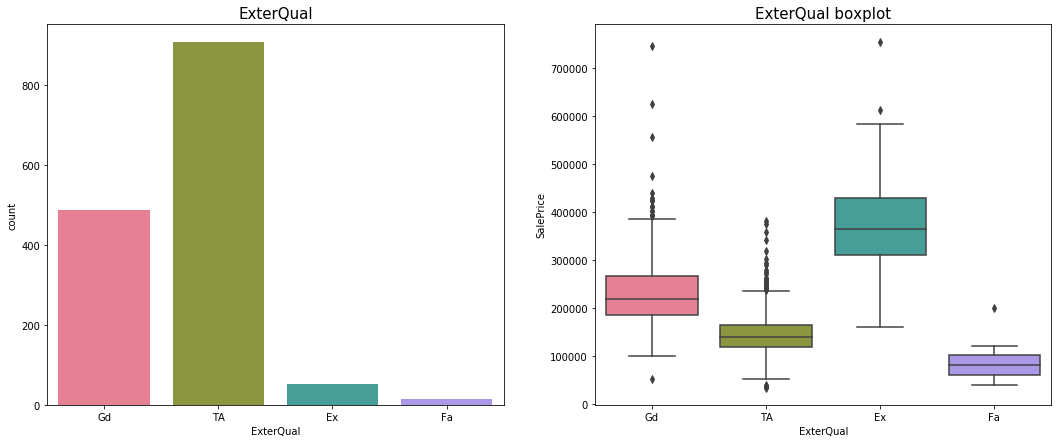

In [52]:
show_feature_cat(train, train.columns[27])

### ExterCond

ExterCond: Evaluates the present condition of the material on the exterior
		
       Ex	Excellent
       Gd	Good
       TA	Average/Typical
       Fa	Fair
       Po	Poor

- data embeding
    Ex = 50
    Gd = 40
    TA = 30
    Fa = 20
    Po = 10

TA    1282
Gd     146
Fa      28
Ex       3
Po       1
Name: ExterCond, dtype: int64

count     1460
unique       5
top         TA
freq      1282
Name: ExterCond, dtype: object

# of nan data: 0
% of nan data: 0.0%


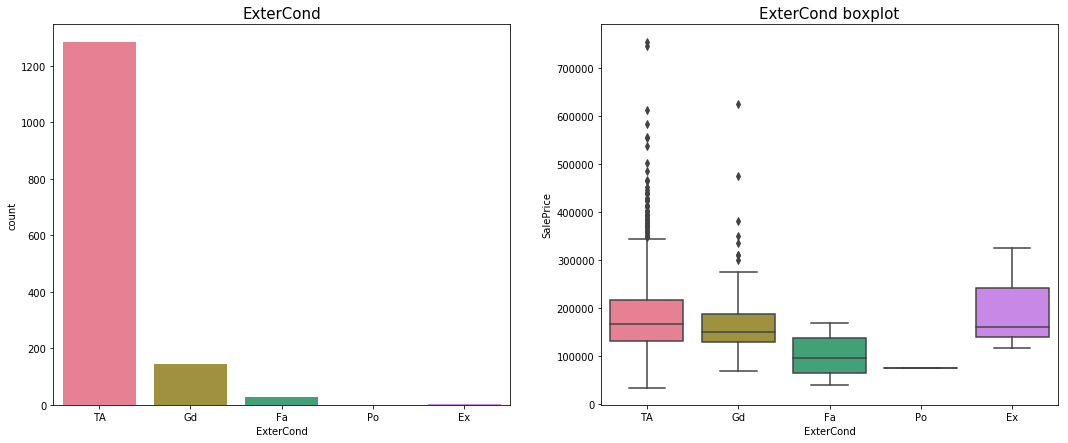

In [53]:
show_feature_cat(train, train.columns[28])

### Foundation

Foundation: Type of foundation
		
       BrkTil	Brick & Tile
       CBlock	Cinder Block
       PConc	Poured Contrete	
       Slab	Slab
       Stone	Stone
       Wood	Wood

PConc     647
CBlock    634
BrkTil    146
Slab       24
Stone       6
Wood        3
Name: Foundation, dtype: int64

count      1460
unique        6
top       PConc
freq        647
Name: Foundation, dtype: object

# of nan data: 0
% of nan data: 0.0%


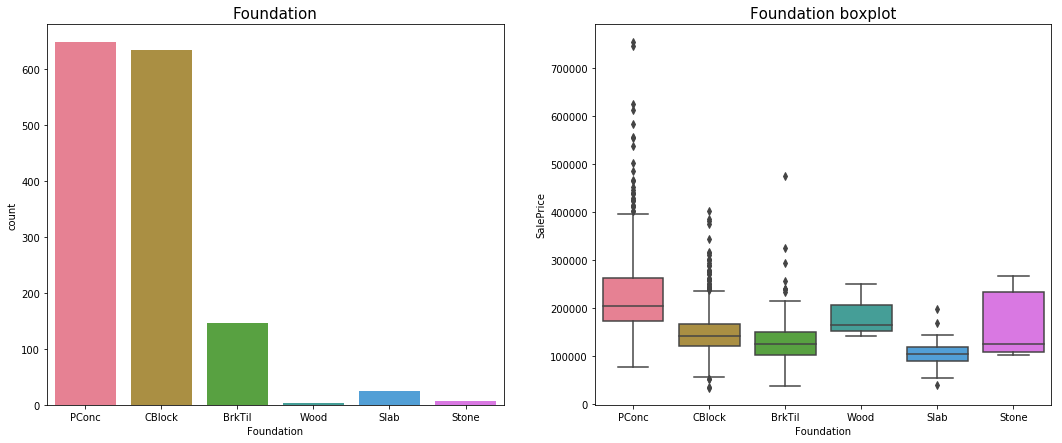

In [54]:
show_feature_cat(train, train.columns[29])

### Col 30 - 38 Bsmt 관련 Features 살펴보기

#### Numeric features 보기: col 34, 36, 37, 38
- TotalBsmtSF = BsmtFinSF1 + BsmtFinSF2 + BsmtUnfSF
- TotalBsmtSF 제거? BsmtFinSF1, BsmtFinSF2, BsmtUnfSF 사용

In [55]:
train.columns[34], train.columns[36], train.columns[37], train.columns[38]

('BsmtFinSF1', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF')

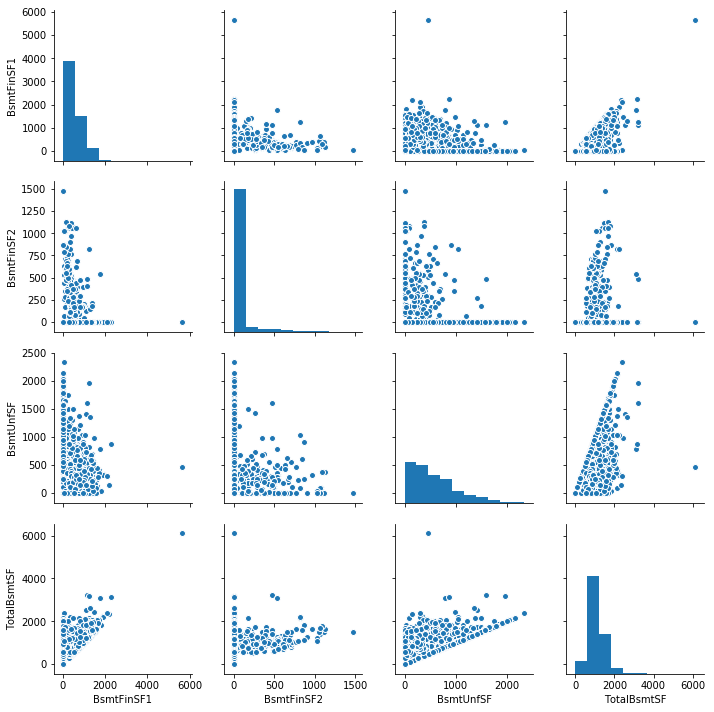

In [56]:
df = pd.concat([train[train.columns[34]], train[train.columns[36:39]]], axis=1)
sns.pairplot(df)
plt.show()

#### Categorical features 보기: col 30, 31, 32, 33, 35
- ordered class => numeric data로 변형해서 사용?
- NaN 값 존재, 37(38)개  => 데이터 확인해보기

In [57]:
set(train[train.columns[30]]),\
set(train[train.columns[31]]),\
set(train[train.columns[32]]),\
set(train[train.columns[33]]),\
set(train[train.columns[35]])

({'Ex', 'Fa', 'Gd', 'TA', nan},
 {'Fa', 'Gd', 'Po', 'TA', nan},
 {'Av', 'Gd', 'Mn', 'No', nan},
 {'ALQ', 'BLQ', 'GLQ', 'LwQ', 'Rec', 'Unf', nan},
 {'ALQ', 'BLQ', 'GLQ', 'LwQ', 'Rec', 'Unf', nan})

In [58]:
display(train[train[train.columns[32]].isna()])  # 38
# row 948 BsmtExposure 데이터 채워주기

Id  MSSubClass MSZoning  LotFrontage  LotArea Street Alley LotShape  \
17      18          90       RL         72.0    10791   Pave   NaN      Reg   
39      40          90       RL         65.0     6040   Pave   NaN      Reg   
90      91          20       RL         60.0     7200   Pave   NaN      Reg   
102    103          90       RL         64.0     7018   Pave   NaN      Reg   
156    157          20       RL         60.0     7200   Pave   NaN      Reg   
182    183          20       RL         60.0     9060   Pave   NaN      Reg   
259    260          20       RM         70.0    12702   Pave   NaN      Reg   
342    343          90       RL          NaN     8544   Pave   NaN      Reg   
362    363          85       RL         64.0     7301   Pave   NaN      Reg   
371    372          50       RL         80.0    17120   Pave   NaN      Reg   
392    393          20       RL          NaN     8339   Pave   NaN      IR1   
520    521         190       RL         60.0    10800   Pave  Grvl      Reg   
532    533          20       RL         60.0     7200   Pave   NaN      Reg   
533    534          20       RL         50.0     5000   Pave   NaN      Reg   
553    554          20       RL         67.0     8777   Pave   NaN      Reg   
646    647          20       RL         60.0     7200   Pave   NaN      Reg   
705    706         190       RM         70.0     5600   Pave   NaN      Reg   
736    737          90       RL         60.0     8544   Pave   NaN      Reg   
749    750          50       RL         50.0     8405   Pave   NaN      Reg   
778    779          90       RH         60.0     8400   Pave   NaN      Reg   
868    869          60       RL          NaN    14762   Pave   NaN      IR2   
894    895          90       RL         64.0     7018   Pave   NaN      Reg   
897    898          90       RL         64.0     7018   Pave   NaN      Reg   
948    949          60       RL         65.0    14006   Pave   NaN      IR1   
984    985          90       RL         75.0    10125   Pave   NaN      Reg   
1000  1001          20       RL         74.0    10206   Pave   NaN      Reg   
1011  1012          90       RL         75.0     9825   Pave   NaN      Reg   
1035  1036          20       RL          NaN    11500   Pave   NaN      IR1   
1045  1046          20       RL          NaN    13680   Pave   NaN      IR1   
1048  1049          20       RL        100.0    21750   Pave   NaN      Reg   
1049  1050          20       RL         60.0    11100   Pave   NaN      Reg   
1090  1091          90       RL         60.0     8544   Pave   NaN      Reg   
1179  1180          20       RL         77.0     8335   Pave   NaN      Reg   
1216  1217          90       RM         68.0     8930   Pave   NaN      Reg   
1218  1219          50       RM         52.0     6240   Pave   NaN      Reg   
1232  1233          90       RL         70.0     9842   Pave   NaN      Reg   
1321  1322          20       RL          NaN     6627   Pave   NaN      IR1   
1412  1413          90       RL         60.0     7200   Pave   NaN      Reg   

     LandContour Utilities LotConfig LandSlope Neighborhood Condition1  \
17           Lvl    AllPub    Inside       Gtl       Sawyer       Norm   
39           Lvl    AllPub    Inside       Gtl      Edwards       Norm   
90           Lvl    AllPub    Inside       Gtl        NAmes       Norm   
102          Bnk    AllPub    Inside       Gtl      SawyerW       Norm   
156          Lvl    AllPub    Inside       Gtl        NAmes       Norm   
182          Lvl    AllPub    Inside       Gtl      Edwards     Artery   
259          Lvl    AllPub    Inside       Gtl      OldTown       Norm   
342          Lvl    AllPub    Inside       Gtl        NAmes       Norm   
362          Lvl    AllPub    Corner       Gtl      Edwards       Norm   
371          Lvl    AllPub    Inside       Gtl      ClearCr      Feedr   
392          Lvl    AllPub    Inside       Gtl        NAmes       Norm   
520          Lvl    AllPub    Inside  

### BsmtQual

BsmtQual: Evaluates the height of the basement

       Ex	Excellent (100+ inches)	
       Gd	Good (90-99 inches)
       TA	Typical (80-89 inches)
       Fa	Fair (70-79 inches)
       Po	Poor (<70 inches
       NA	No Basement

- data embeding
    Ex = 50
    Gd = 40
    TA = 30
    Fa = 20
    Po = 10
    Na = 0

- NaN 값 처리 => no basement인 것으로 추정됨

TA    649
Gd    618
Ex    121
Fa     35
Name: BsmtQual, dtype: int64

count     1423
unique       4
top         TA
freq       649
Name: BsmtQual, dtype: object

# of nan data: 37
% of nan data: 2.53%


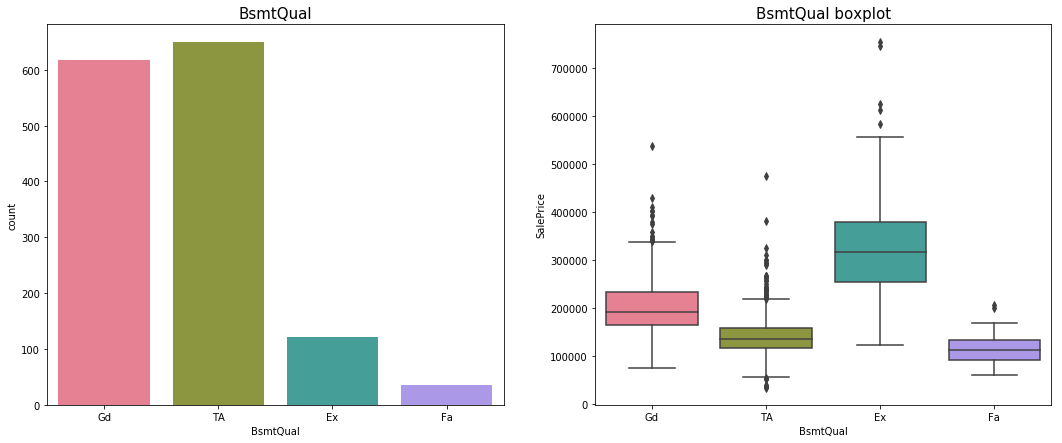

In [59]:
show_feature_cat(train, train.columns[30])

### BsmtCond

BsmtCond: Evaluates the general condition of the basement

       Ex	Excellent
       Gd	Good
       TA	Typical - slight dampness allowed
       Fa	Fair - dampness or some cracking or settling
       Po	Poor - Severe cracking, settling, or wetness
       NA	No Basement

- data embeding
    Ex = 50
    Gd = 40
    TA = 30
    Fa = 20
    Po = 10
    Na = 0

- NaN 값 처리 => no basement인 것으로 추정됨

TA    1311
Gd      65
Fa      45
Po       2
Name: BsmtCond, dtype: int64

count     1423
unique       4
top         TA
freq      1311
Name: BsmtCond, dtype: object

# of nan data: 37
% of nan data: 2.53%


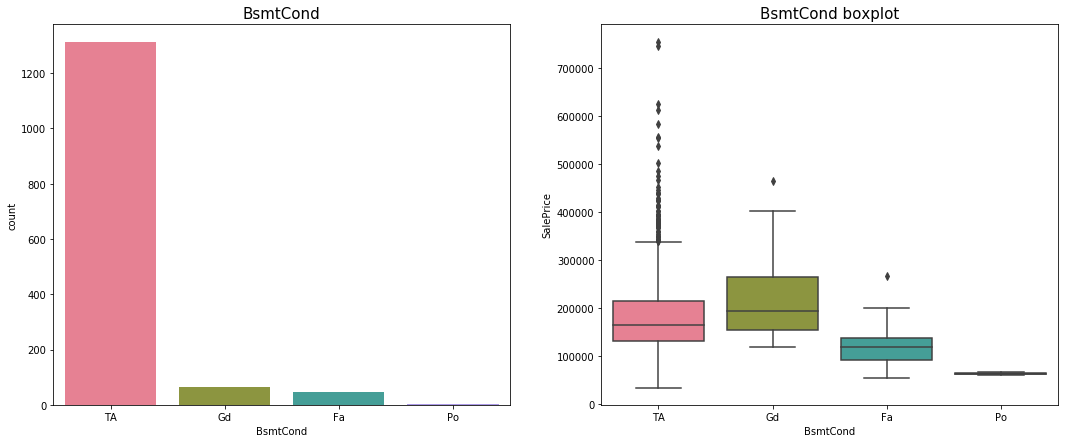

In [60]:
show_feature_cat(train, train.columns[31])

### BsmtExposure

BsmtExposure: Refers to walkout or garden level walls

       Gd	Good Exposure
       Av	Average Exposure (split levels or foyers typically score average or above)	
       Mn	Mimimum Exposure
       No	No Exposure
       NA	No Basement

- data embeding
    Gd = 40
    Av = 30
    Mn = 20
    No = 10
    NA = 0

- NaN 값 처리 => no basement인 것으로 추정됨

In [62]:
# row 948 BsmtExposure 데이터 채워주기 = AV로 채우기

No    953
Av    221
Gd    134
Mn    114
Name: BsmtExposure, dtype: int64

count     1422
unique       4
top         No
freq       953
Name: BsmtExposure, dtype: object

# of nan data: 38
% of nan data: 2.6%


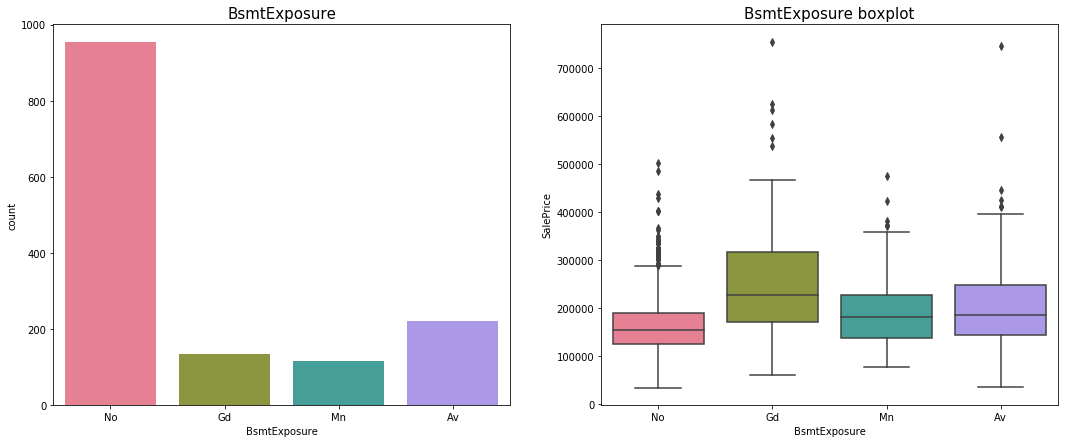

In [61]:
show_feature_cat(train, train.columns[32])

In [130]:
train.loc[948]

Id                   949
MSSubClass            60
MSZoning              RL
LotFrontage           65
LotArea            14006
Street              Pave
Alley                NaN
LotShape             IR1
LandContour          Lvl
Utilities         AllPub
LotConfig         Inside
LandSlope            Gtl
Neighborhood     CollgCr
Condition1          Norm
Condition2          Norm
BldgType            1Fam
HouseStyle        2Story
OverallQual            7
OverallCond            5
YearBuilt           2002
YearRemodAdd        2002
RoofStyle          Gable
RoofMatl         CompShg
Exterior1st      VinylSd
Exterior2nd      VinylSd
MasVnrType       BrkFace
MasVnrArea           144
ExterQual             Gd
ExterCond             TA
Foundation         PConc
BsmtQual              Gd
BsmtCond              TA
BsmtExposure         NaN
BsmtFinType1         Unf
BsmtFinSF1             0
BsmtFinType2         Unf
BsmtFinSF2             0
BsmtUnfSF            936
TotalBsmtSF          936
Heating             GasA


In [63]:
train.BsmtFinSF1.value_counts()

0       467
24       12
16        9
20        5
686       5
616       5
936       5
662       5
428       4
655       4
442       4
1200      4
400       4
300       4
312       4
495       4
384       4
697       4
641       4
360       4
560       4
588       4
547       4
504       4
600       4
553       4
674       3
1036      3
403       3
672       3
624       3
595       3
680       3
378       3
375       3
1274      3
1056      3
565       3
570       3
660       3
659       3
500       3
690       3
625       3
626       3
490       3
633       3
643       3
648       3
450       3
1218      3
507       3
510       3
656       3
1201      3
528       3
425       3
456       3
685       3
695       3
182       3
247       3
1300      3
904       3
767       3
210       3
196       3
786       3
180       3
280       3
168       3
789       3
120       3
812       3
816       3
828       3
28        3
250       3
569       3
733       3
297       3
288       3
340       3
732 

### BsmtFinType1

BsmtFinType1: Rating of basement finished area

       GLQ	Good Living Quarters
       ALQ	Average Living Quarters
       BLQ	Below Average Living Quarters	
       Rec	Average Rec Room
       LwQ	Low Quality
       Unf	Unfinshed
       NA	No Basement

- data embeding
   

Unf    430
GLQ    418
ALQ    220
BLQ    148
Rec    133
LwQ     74
Name: BsmtFinType1, dtype: int64

count     1423
unique       6
top        Unf
freq       430
Name: BsmtFinType1, dtype: object

# of nan data: 37
% of nan data: 2.53%


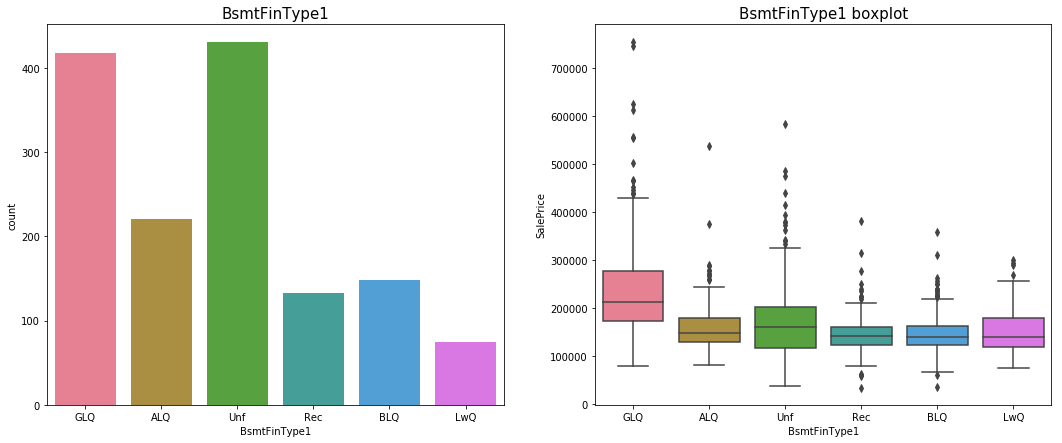

In [64]:
show_feature_cat(train, train.columns[33])

### BsmtFinSF1

BsmtFinSF1: Type 1 finished square feet

- BsmtFinSF1 vs. others(Bsmt관련 features)

count    1460.000000
mean      443.639726
std       456.098091
min         0.000000
25%         0.000000
50%       383.500000
75%       712.250000
max      5644.000000
Name: BsmtFinSF1, dtype: float64

# of nan data: 0
% of nan data: 0.0%
correlation: 38.64%


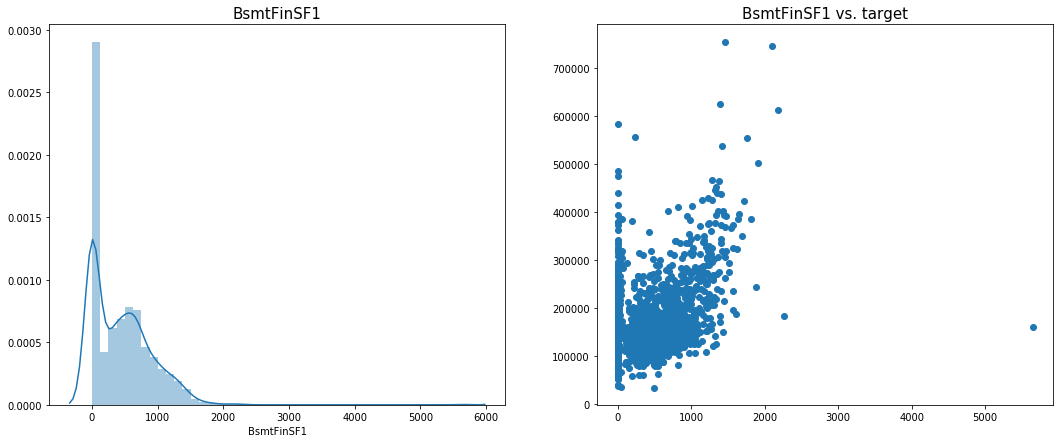

In [65]:
show_feature_num(train, train.columns[34])

### BsmtFinType2

BsmtFinType2: Rating of basement finished area (if multiple types)

       GLQ	Good Living Quarters
       ALQ	Average Living Quarters
       BLQ	Below Average Living Quarters	
       Rec	Average Rec Room
       LwQ	Low Quality
       Unf	Unfinshed
       NA	No Basemen

- data embeding
- NaN 값 처리

Unf    1256
Rec      54
LwQ      46
BLQ      33
ALQ      19
GLQ      14
Name: BsmtFinType2, dtype: int64

count     1422
unique       6
top        Unf
freq      1256
Name: BsmtFinType2, dtype: object

# of nan data: 38
% of nan data: 2.6%


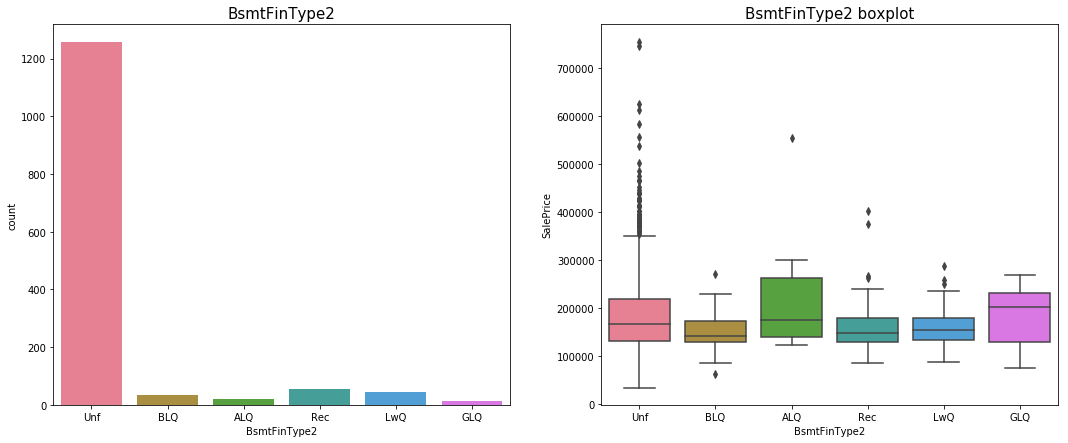

In [66]:
show_feature_cat(train, train.columns[35])

### BsmtFinSF2

BsmtFinSF2: Type 2 finished square feet

count    1460.000000
mean       46.549315
std       161.319273
min         0.000000
25%         0.000000
50%         0.000000
75%         0.000000
max      1474.000000
Name: BsmtFinSF2, dtype: float64

# of nan data: 0
% of nan data: 0.0%
correlation: -1.14%


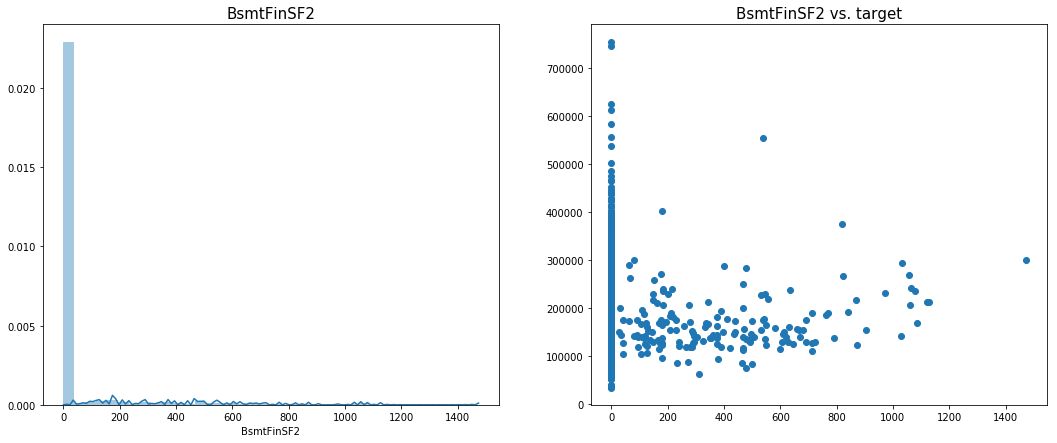

In [67]:
show_feature_num(train, train.columns[36])

### BsmtUnfSF

BsmtUnfSF: Unfinished square feet of basement area

count    1460.000000
mean      567.240411
std       441.866955
min         0.000000
25%       223.000000
50%       477.500000
75%       808.000000
max      2336.000000
Name: BsmtUnfSF, dtype: float64

# of nan data: 0
% of nan data: 0.0%
correlation: 21.45%


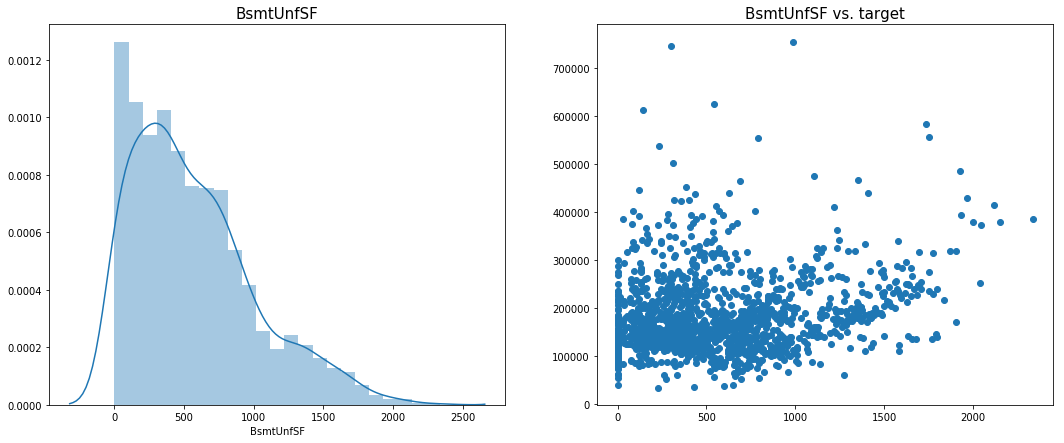

In [68]:
show_feature_num(train, train.columns[37])

### TotalBsmtSF

TotalBsmtSF: Total square feet of basement area

count    1460.000000
mean     1057.429452
std       438.705324
min         0.000000
25%       795.750000
50%       991.500000
75%      1298.250000
max      6110.000000
Name: TotalBsmtSF, dtype: float64

# of nan data: 0
% of nan data: 0.0%
correlation: 61.36%


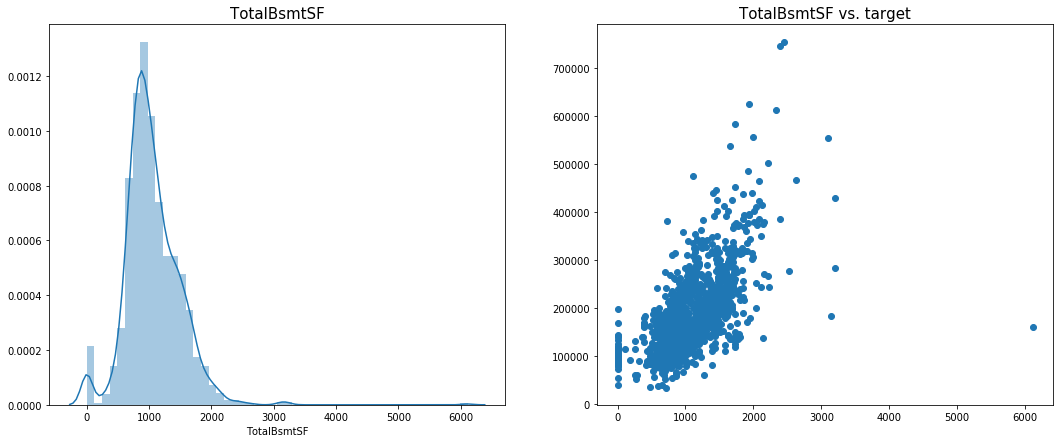

In [69]:
show_feature_num(train, train.columns[38])

### Heating

Heating: Type of heating
		
       Floor	Floor Furnace
       GasA	Gas forced warm air furnace
       GasW	Gas hot water or steam heat
       Grav	Gravity furnace	
       OthW	Hot water or steam heat other than gas
       Wall	Wall furnace

GasA     1428
GasW       18
Grav        7
Wall        4
OthW        2
Floor       1
Name: Heating, dtype: int64

count     1460
unique       6
top       GasA
freq      1428
Name: Heating, dtype: object

# of nan data: 0
% of nan data: 0.0%


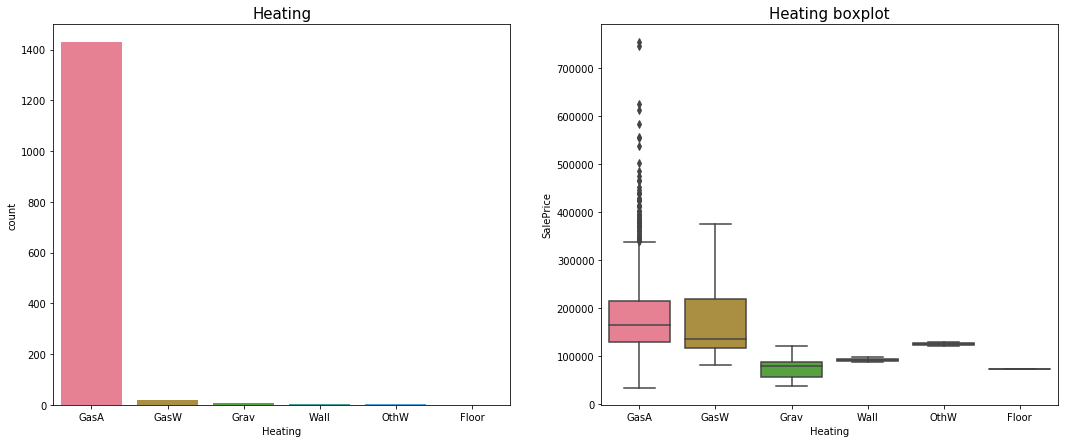

In [70]:
show_feature_cat(train, train.columns[39])

### HeatingQC

HeatingQC: Heating quality and condition

       Ex	Excellent
       Gd	Good
       TA	Average/Typical
       Fa	Fair
       Po	Poor

- data embeding
   

Ex    741
TA    428
Gd    241
Fa     49
Po      1
Name: HeatingQC, dtype: int64

count     1460
unique       5
top         Ex
freq       741
Name: HeatingQC, dtype: object

# of nan data: 0
% of nan data: 0.0%


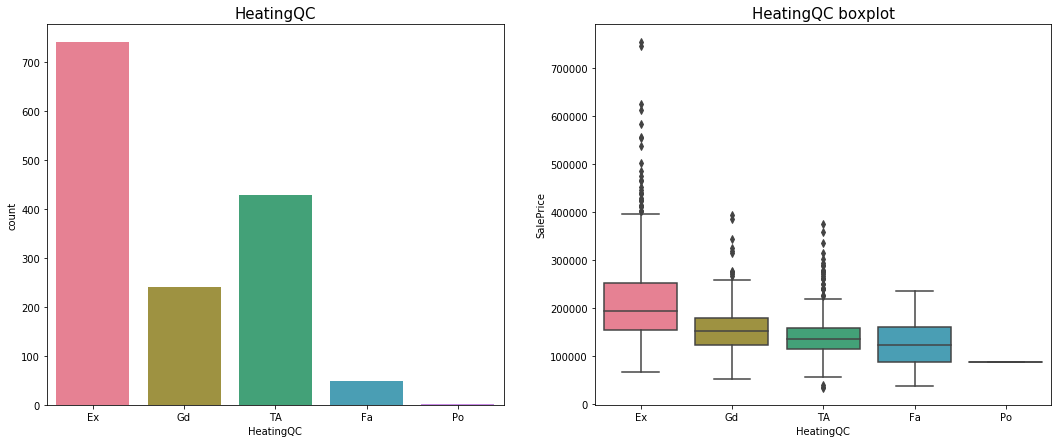

In [71]:
show_feature_cat(train, train.columns[40])

In [72]:
train.HeatingQC.value_counts()

Ex    741
TA    428
Gd    241
Fa     49
Po      1
Name: HeatingQC, dtype: int64

### CentralAir

CentralAir: Central air conditioning

       N	No
       Y	Yes

Y    1365
N      95
Name: CentralAir, dtype: int64

count     1460
unique       2
top          Y
freq      1365
Name: CentralAir, dtype: object

# of nan data: 0
% of nan data: 0.0%


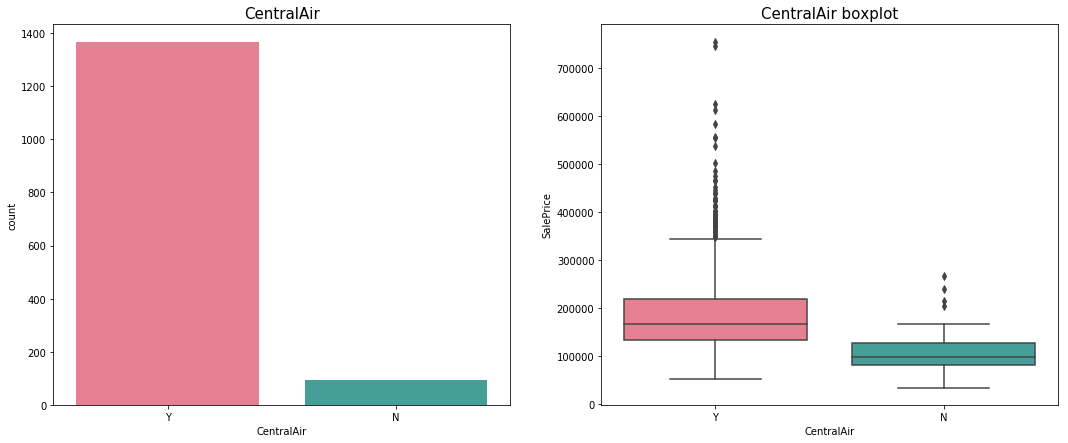

In [73]:
show_feature_cat(train, train.columns[41])

### Electrical

Electrical: Electrical system

       SBrkr	Standard Circuit Breakers & Romex
       FuseA	Fuse Box over 60 AMP and all Romex wiring (Average)	
       FuseF	60 AMP Fuse Box and mostly Romex wiring (Fair)
       FuseP	60 AMP Fuse Box and mostly knob & tube wiring (poor)
       Mix	Mixed

- data embeding
- Mix 인 데이터는 FuseP(Poor) 클래스로 
- 데이터 개수가 가장 많은 class(SBrkr)로 NaN 값 채우기

SBrkr    1334
FuseA      94
FuseF      27
FuseP       3
Mix         1
Name: Electrical, dtype: int64

count      1459
unique        5
top       SBrkr
freq       1334
Name: Electrical, dtype: object

# of nan data: 1
% of nan data: 0.07%


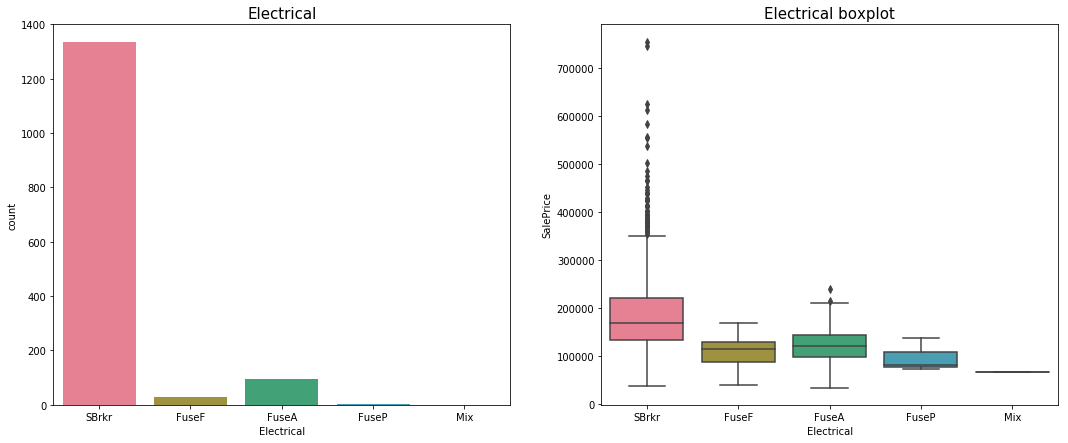

In [74]:
show_feature_cat(train, train.columns[42])

In [75]:
display(train[train[train.columns[42]].isna()])  

Id  MSSubClass MSZoning  LotFrontage  LotArea Street Alley LotShape  \
1379  1380          80       RL         73.0     9735   Pave   NaN      Reg   

     LandContour Utilities LotConfig LandSlope Neighborhood Condition1  \
1379         Lvl    AllPub    Inside       Gtl       Timber       Norm   

     Condition2 BldgType HouseStyle  OverallQual  OverallCond  YearBuilt  \
1379       Norm     1Fam       SLvl            5            5       2006   

      YearRemodAdd RoofStyle RoofMatl Exterior1st Exterior2nd MasVnrType  \
1379          2007     Gable  CompShg     VinylSd     VinylSd       None   

      MasVnrArea ExterQual ExterCond Foundation BsmtQual BsmtCond  \
1379         0.0        TA        TA      PConc       Gd       TA   

     BsmtExposure BsmtFinType1  BsmtFinSF1 BsmtFinType2  BsmtFinSF2  \
1379           No          Unf           0          Unf           0   

      BsmtUnfSF  TotalBsmtSF Heating HeatingQC CentralAir Electrical  \
1379        384          384    GasA        Gd          Y        NaN   

      1stFlrSF  2ndFlrSF  LowQualFinSF  GrLivArea  BsmtFullBath  BsmtHalfBath  \
1379       754       640             0       1394             0             0   

      FullBath  HalfBath  BedroomAbvGr  KitchenAbvGr KitchenQual  \
1379         2         1             3             1          Gd   

      TotRmsAbvGrd Functional  Fireplaces FireplaceQu GarageType  GarageYrBlt  \
1379             7        Typ           0         NaN    BuiltIn       2007.0   

     GarageFinish  GarageCars  GarageArea GarageQual GarageCond PavedDrive  \
1379          Fin           2         400         TA         TA          Y   

      WoodDeckSF  OpenPorchSF  EnclosedPorch  3SsnPorch  ScreenPorch  \
1379         100            0              0          0            0   

      PoolArea PoolQC Fence MiscFeature  MiscVal  MoSold  YrSold SaleType  \
1379         0    NaN   NaN         NaN        0       5    2008       WD   

     SaleCondition  SalePrice  
1379        Normal     167500

### 1stFlrSF

1stFlrSF: First Floor square feet

count    1460.000000
mean     1162.626712
std       386.587738
min       334.000000
25%       882.000000
50%      1087.000000
75%      1391.250000
max      4692.000000
Name: 1stFlrSF, dtype: float64

# of nan data: 0
% of nan data: 0.0%
correlation: 60.59%


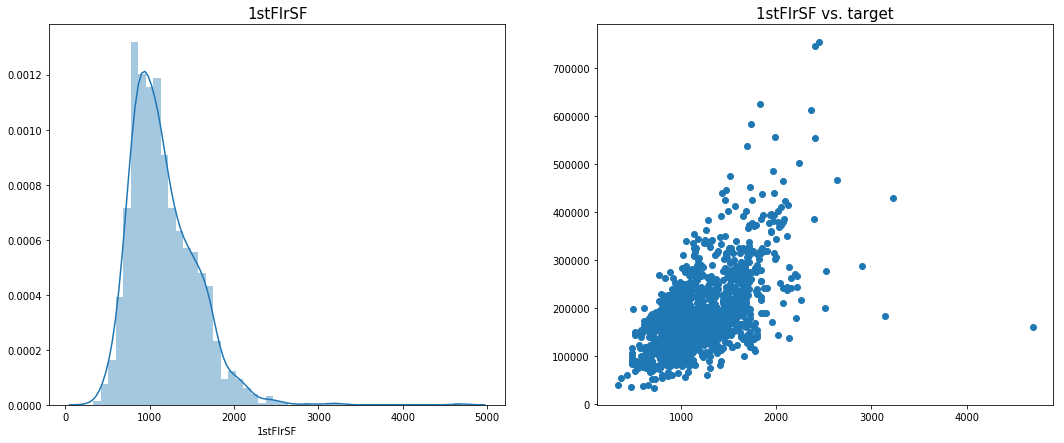

In [77]:
show_feature_num(train, train.columns[43])

### 2ndFlrSF

2ndFlrSF: Second floor square feet

count    1460.000000
mean      346.992466
std       436.528436
min         0.000000
25%         0.000000
50%         0.000000
75%       728.000000
max      2065.000000
Name: 2ndFlrSF, dtype: float64

# of nan data: 0
% of nan data: 0.0%
correlation: 31.93%


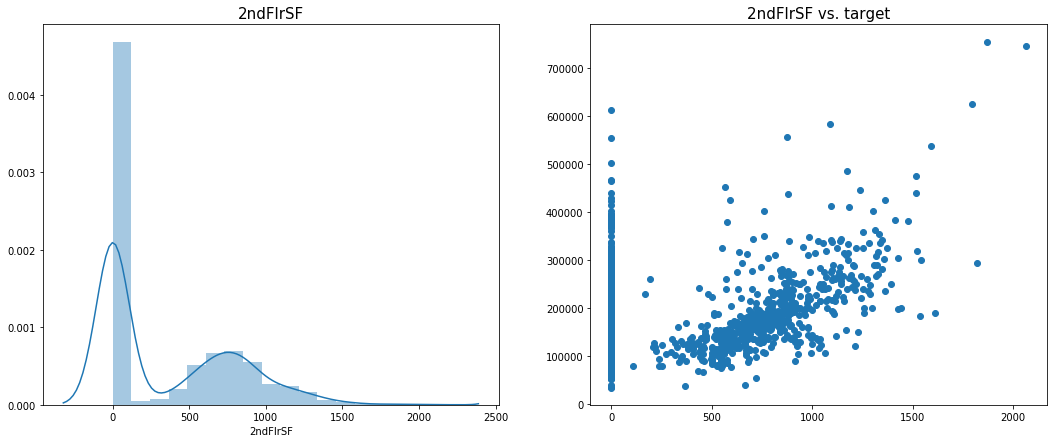

In [78]:
show_feature_num(train, train.columns[44])

### LowQualFinSF

LowQualFinSF: Low quality finished square feet (all floors)

count    1460.000000
mean        5.844521
std        48.623081
min         0.000000
25%         0.000000
50%         0.000000
75%         0.000000
max       572.000000
Name: LowQualFinSF, dtype: float64

# of nan data: 0
% of nan data: 0.0%
correlation: -2.56%


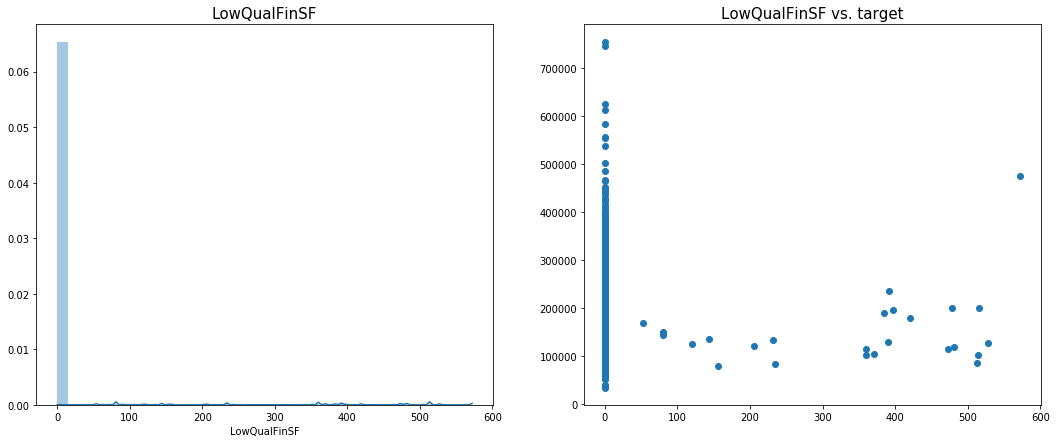

In [79]:
show_feature_num(train, train.columns[45])

In [80]:
display(train[train[train.columns[45]] > 0])  # 26

Id  MSSubClass MSZoning  LotFrontage  LotArea Street Alley LotShape  \
51      52          50       RM         52.0     6240   Pave   NaN      Reg   
88      89          50  C (all)        105.0     8470   Pave   NaN      IR1   
125    126         190       RM         60.0     6780   Pave   NaN      Reg   
170    171          50       RM          NaN    12358   Pave   NaN      IR1   
185    186          75       RM         90.0    22950   Pave   NaN      IR2   
187    188          50       RL         60.0    10410   Pave   NaN      Reg   
197    198          75       RL        174.0    25419   Pave   NaN      Reg   
198    199          75       RM         92.0     5520   Pave   NaN      Reg   
263    264          50       RM         50.0     5500   Pave   NaN      Reg   
267    268          75       RL         60.0     8400   Pave   NaN      Reg   
406    407          50       RL         51.0    10480   Pave   NaN      Reg   
589    590          40       RM         50.0     9100   Pave   NaN      Reg   
635    636         190       RH         60.0    10896   Pave  Pave      Reg   
729    730          30       RM         52.0     6240   Pave  Grvl      Reg   
829    830         160       FV         24.0     2544   Pave  Pave      Reg   
831    832         160       FV         30.0     3180   Pave  Pave      Reg   
868    869          60       RL          NaN    14762   Pave   NaN      IR2   
873    874          40       RL         60.0    12144   Pave   NaN      Reg   
883    884          75       RL         60.0     6204   Pave   NaN      Reg   
945    946          50       RM         98.0     8820   Pave   NaN      Reg   
1009  1010          50       RL         60.0     6000   Pave   NaN      Reg   
1031  1032          75       RL        102.0    15863   Pave   NaN      Reg   
1173  1174          50       RL        138.0    18030   Pave   NaN      IR1   
1349  1350          70       RM         50.0     5250   Pave  Pave      Reg   
1364  1365         160       FV         30.0     3180   Pave  Pave      Reg   
1440  1441          70       RL         79.0    11526   Pave   NaN      IR1   

     LandContour Utilities LotConfig LandSlope Neighborhood Condition1  \
51           Lvl    AllPub    Inside       Gtl      BrkSide       Norm   
88           Lvl    AllPub    Corner       Gtl       IDOTRR      Feedr   
125          Lvl    AllPub    Inside       Gtl       IDOTRR       Norm   
170          Lvl    AllPub    Inside       Gtl      OldTown      Feedr   
185          Lvl    AllPub    Inside       Gtl      OldTown     Artery   
187          Lvl    AllPub    Inside       Gtl      OldTown       Norm   
197          Lvl    AllPub    Corner       Gtl        NAmes     Artery   
198          Lvl    AllPub    Corner       Gtl      OldTown       Norm   
263          Lvl    AllPub    Corner       Gtl      OldTown       Norm   
267          Bnk    AllPub    Inside       Mod        SWISU       Norm   
406          Lvl    AllPub    Inside       Gtl        SWISU       Norm   
589          Lvl    AllPub    Inside       Gtl      BrkSide       RRAn   
635          Bnk    AllPub    Inside       Gtl        SWISU      Feedr   
729          Lvl    AllPub    Inside       Gtl       IDOTRR       Norm   
829          Lvl    AllPub    Inside       Gtl      Somerst       Norm   
831          Lvl    AllPub    Inside       Gtl      Somerst       Norm   
868          Lvl    AllPub    Corner       Gtl      Gilbert      Feedr   
873          Lvl    AllPub    Inside       Gtl        NAmes       Norm   
883          Bnk    AllPub    Inside       Gtl        SWISU       Norm   
945          Lvl    AllPub    Corner       Gtl      OldTown       Norm   
1009         Lvl    AllPub    Inside       Gtl        SWISU       Norm   
1031         Lvl    AllPub    Corner       Gtl        SWISU       Norm   
1173         Bnk    AllPub    Inside       Gtl      ClearCr       Norm   
1349         Lvl    AllPub    Inside       Gtl      OldTown       Norm   
1364         Lvl    AllP

### GrLivArea

GrLivArea: Above grade (ground) living area square feet

count    1460.000000
mean     1515.463699
std       525.480383
min       334.000000
25%      1129.500000
50%      1464.000000
75%      1776.750000
max      5642.000000
Name: GrLivArea, dtype: float64

# of nan data: 0
% of nan data: 0.0%
correlation: 70.86%


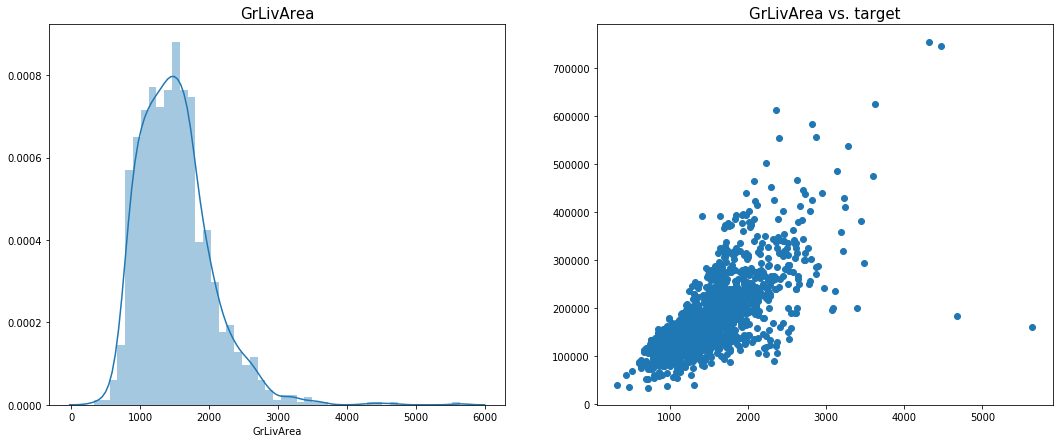

In [81]:
show_feature_num(train, train.columns[46])

#### col 43, 44, 46

In [82]:
df = pd.concat([train[train.columns[43:45]], train[train.columns[46]]], axis=1)
display(df)

1stFlrSF  2ndFlrSF  GrLivArea
0          856       854       1710
1         1262         0       1262
2          920       866       1786
3          961       756       1717
4         1145      1053       2198
5          796       566       1362
6         1694         0       1694
7         1107       983       2090
8         1022       752       1774
9         1077         0       1077
10        1040         0       1040
11        1182      1142       2324
12         912         0        912
13        1494         0       1494
14        1253         0       1253
15         854         0        854
16        1004         0       1004
17        1296         0       1296
18        1114         0       1114
19        1339         0       1339
20        1158      1218       2376
21        1108         0       1108
22        1795         0       1795
23        1060         0       1060
24        1060         0       1060
25        1600         0       1600
26         900         0        900
27        1704         0       1704
28        1600         0       1600
29         520         0        520
30         649       668       1317
31        1228         0       1228
32        1234         0       1234
33        1700         0       1700
34        1561         0       1561
35        1132      1320       2452
36        1097         0       1097
37        1297         0       1297
38        1057         0       1057
39        1152         0       1152
40        1324         0       1324
41        1328         0       1328
42         884         0        884
43         938         0        938
44        1150         0       1150
45        1752         0       1752
46        1518       631       2149
47        1656         0       1656
48         736       716       1452
49         955         0        955
50         794       676       1470
51         816         0       1176
52         816         0        816
53        1842         0       1842
54        1360         0       1360
55        1425         0       1425
56         983       756       1739
57         860       860       1720
58        1426      1519       2945
59         780         0        780
60        1158         0       1158
61         581       530       1111
62        1370         0       1370
63         902       808       1710
64        1057       977       2034
65        1143      1330       2473
66        2207         0       2207
67        1479         0       1479
68         747         0        747
69        1304       983       2287
70        2223         0       2223
71         845         0        845
72         885       833       1718
73        1086         0       1086
74         840       765       1605
75         526       462        988
76         952         0        952
77        1072       213       1285
78        1768         0       1768
79         682       548       1230
80        1182       960       2142
81        1337         0       1337
82        1563         0       1563
83        1065         0       1065
84         804       670       1474
85        1301      1116       2417
86         684       876       1560
87         612       612       1224
88        1013         0       1526
89         990         0        990
90        1040         0       1040
91        1235         0       1235
92         964         0        964
93        1260      1031       2291
94         905       881       1786
95         680       790       1470
96        1588         0       1588
97         960         0        960
98         835         0        835
99        1225         0       1225
100       1610         0       1610
101        977       755       1732
102       1535         0       1535
103       1226         0       1226
104       1226       592       1818
105       1053       939       1992
106       1047         0       1047
107        789         0        789
108        997       520       1517
109       1844         0       1844
110       

### BsmtFullBath

BsmtFullBath: Basement full bathrooms

- data embeding

0    856
1    588
2     15
3      1
Name: BsmtFullBath, dtype: int64

count    1460.000000
mean        0.425342
std         0.518911
min         0.000000
25%         0.000000
50%         0.000000
75%         1.000000
max         3.000000
Name: BsmtFullBath, dtype: float64

# of nan data: 0
% of nan data: 0.0%


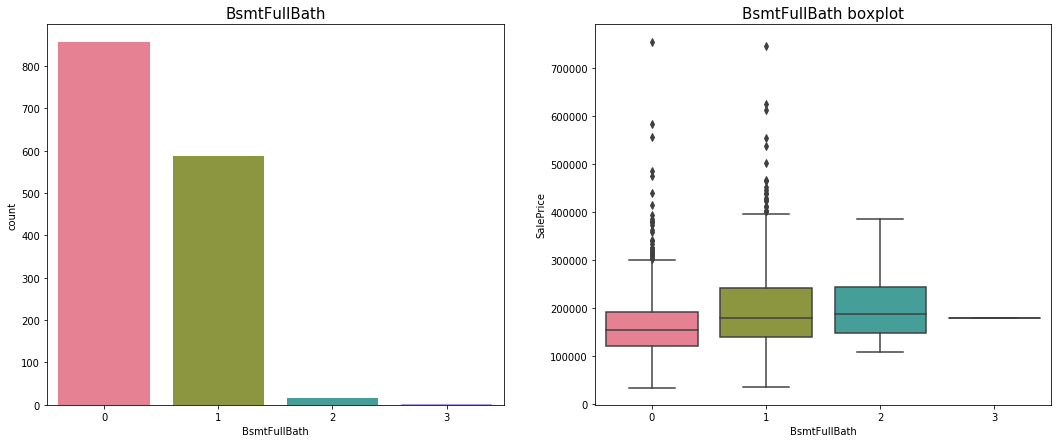

In [83]:
show_feature_cat(train, train.columns[47])

In [84]:
display(train[train[train.columns[47]] > 2])  

Id  MSSubClass MSZoning  LotFrontage  LotArea Street Alley LotShape  \
738  739          90       RL         60.0    10800   Pave   NaN      Reg   

    LandContour Utilities LotConfig LandSlope Neighborhood Condition1  \
738         Lvl    AllPub    Inside       Gtl      Edwards       Norm   

    Condition2 BldgType HouseStyle  OverallQual  OverallCond  YearBuilt  \
738       Norm   Duplex     1Story            5            5       1987   

     YearRemodAdd RoofStyle RoofMatl Exterior1st Exterior2nd MasVnrType  \
738          1988     Gable  CompShg     Plywood     Plywood       None   

     MasVnrArea ExterQual ExterCond Foundation BsmtQual BsmtCond BsmtExposure  \
738         0.0        TA        TA     CBlock       Gd       Gd           Gd   

    BsmtFinType1  BsmtFinSF1 BsmtFinType2  BsmtFinSF2  BsmtUnfSF  TotalBsmtSF  \
738          GLQ        1200          Unf           0          0         1200   

    Heating HeatingQC CentralAir Electrical  1stFlrSF  2ndFlrSF  LowQualFinSF  \
738    GasA        TA          Y      SBrkr      1200         0             0   

     GrLivArea  BsmtFullBath  BsmtHalfBath  FullBath  HalfBath  BedroomAbvGr  \
738       1200             3             0         3         0             3   

     KitchenAbvGr KitchenQual  TotRmsAbvGrd Functional  Fireplaces  \
738             1          TA             5        Typ           0   

    FireplaceQu GarageType  GarageYrBlt GarageFinish  GarageCars  GarageArea  \
738         NaN        NaN          NaN          NaN           0           0   

    GarageQual GarageCond PavedDrive  WoodDeckSF  OpenPorchSF  EnclosedPorch  \
738        NaN        NaN          Y         120            0              0   

     3SsnPorch  ScreenPorch  PoolArea PoolQC Fence MiscFeature  MiscVal  \
738          0            0         0    NaN   NaN         NaN        0   

     MoSold  YrSold SaleType SaleCondition  SalePrice  
738       3    2009       WD        Alloca     179000

### BsmtHalfBath

BsmtHalfBath: Basement half bathrooms

- data embeding

0    1378
1      80
2       2
Name: BsmtHalfBath, dtype: int64

count    1460.000000
mean        0.057534
std         0.238753
min         0.000000
25%         0.000000
50%         0.000000
75%         0.000000
max         2.000000
Name: BsmtHalfBath, dtype: float64

# of nan data: 0
% of nan data: 0.0%


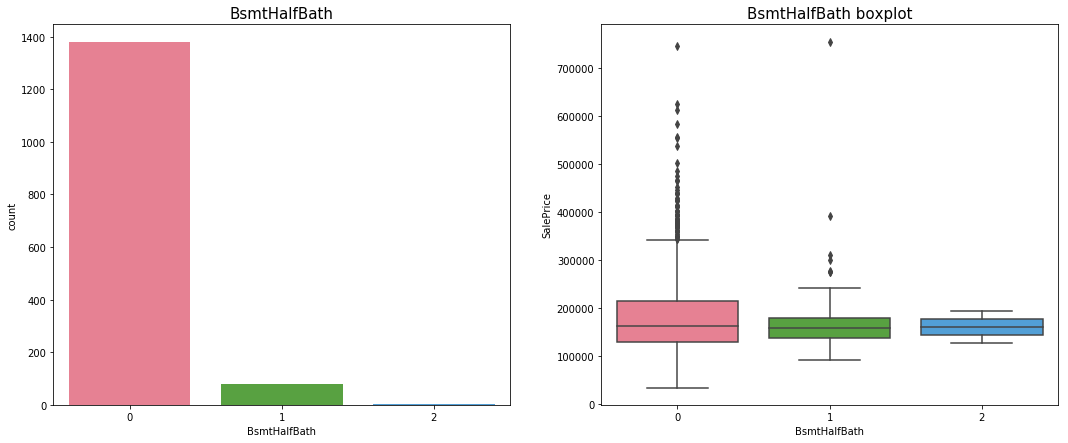

In [85]:
show_feature_cat(train, train.columns[48])

### FullBath

FullBath: Full bathrooms above grade

- data embeding

2    768
1    650
3     33
0      9
Name: FullBath, dtype: int64

count    1460.000000
mean        1.565068
std         0.550916
min         0.000000
25%         1.000000
50%         2.000000
75%         2.000000
max         3.000000
Name: FullBath, dtype: float64

# of nan data: 0
% of nan data: 0.0%


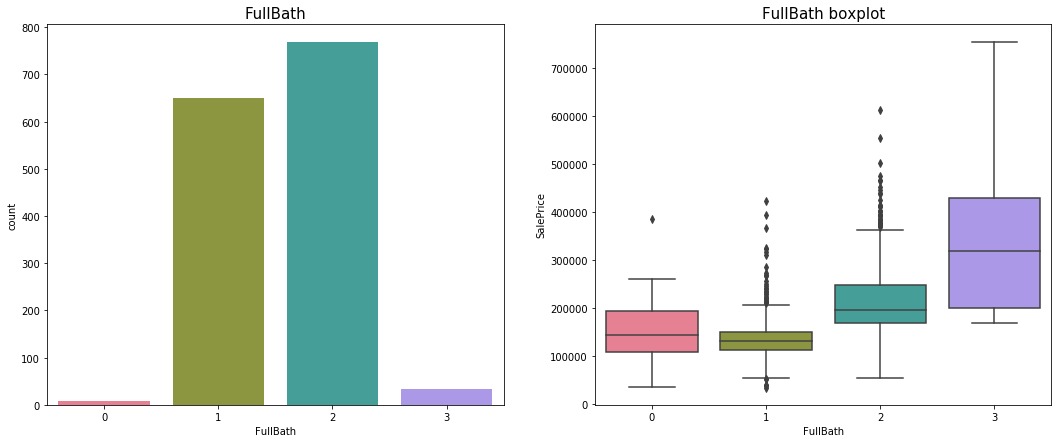

In [86]:
show_feature_cat(train, train.columns[49])

### HalfBath

HalfBath: Half baths above grade

- data embeding

0    913
1    535
2     12
Name: HalfBath, dtype: int64

count    1460.000000
mean        0.382877
std         0.502885
min         0.000000
25%         0.000000
50%         0.000000
75%         1.000000
max         2.000000
Name: HalfBath, dtype: float64

# of nan data: 0
% of nan data: 0.0%


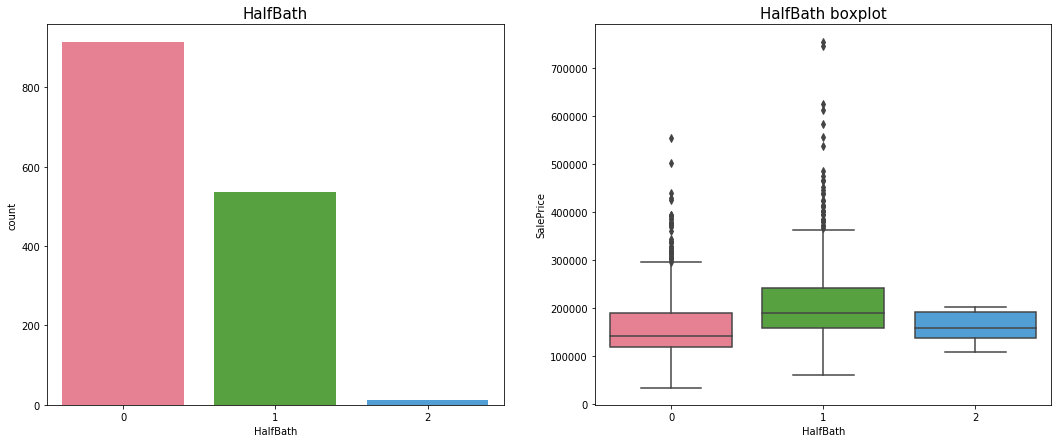

In [87]:
show_feature_cat(train, train.columns[50])

### BedroomAbvGr

Bedroom: Bedrooms above grade (does NOT include basement bedrooms)

- data embeding

3    804
2    358
4    213
1     50
5     21
6      7
0      6
8      1
Name: BedroomAbvGr, dtype: int64

count    1460.000000
mean        2.866438
std         0.815778
min         0.000000
25%         2.000000
50%         3.000000
75%         3.000000
max         8.000000
Name: BedroomAbvGr, dtype: float64

# of nan data: 0
% of nan data: 0.0%


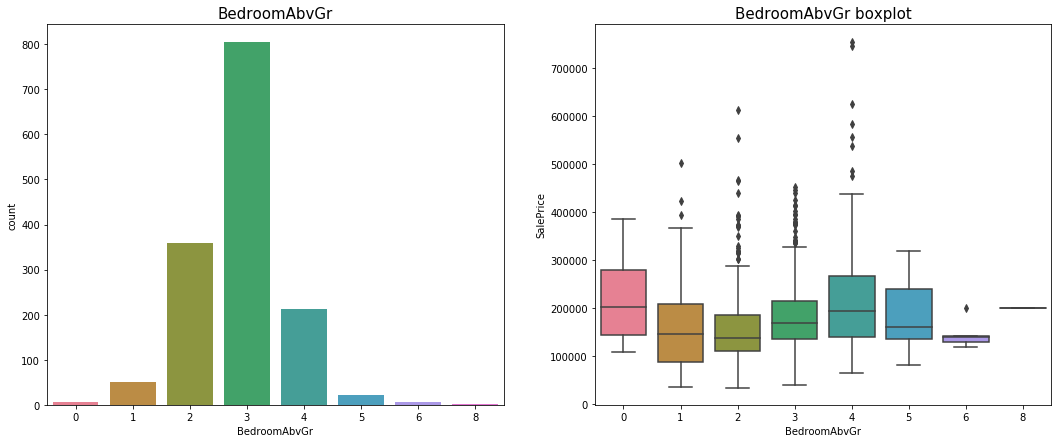

In [88]:
show_feature_cat(train, train.columns[51])

### KitchenAbvGr

Kitchen: Kitchens above grade

1    1392
2      65
3       2
0       1
Name: KitchenAbvGr, dtype: int64

count    1460.000000
mean        1.046575
std         0.220338
min         0.000000
25%         1.000000
50%         1.000000
75%         1.000000
max         3.000000
Name: KitchenAbvGr, dtype: float64

# of nan data: 0
% of nan data: 0.0%


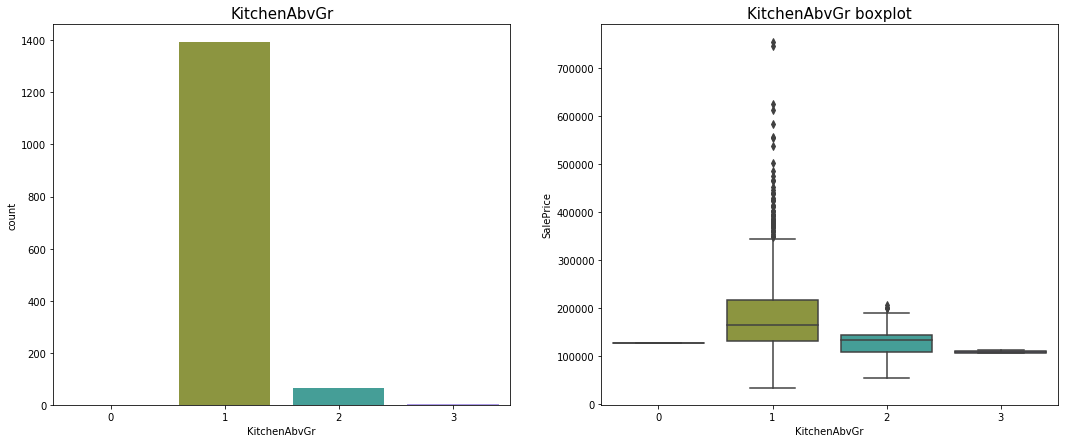

In [89]:
show_feature_cat(train, train.columns[52])

### KitchenQual

KitchenQual: Kitchen quality

       Ex	Excellent
       Gd	Good
       TA	Typical/Average
       Fa	Fair
       Po	Poor

- data embeding

TA    735
Gd    586
Ex    100
Fa     39
Name: KitchenQual, dtype: int64

count     1460
unique       4
top         TA
freq       735
Name: KitchenQual, dtype: object

# of nan data: 0
% of nan data: 0.0%


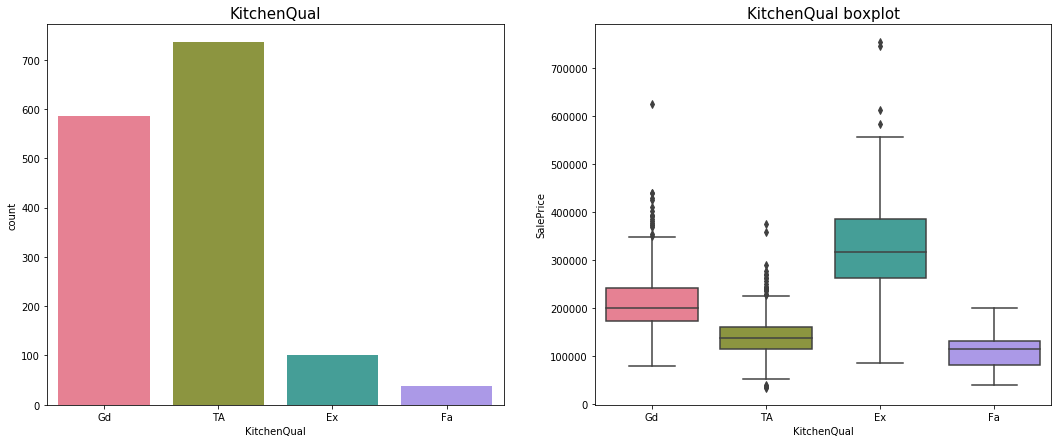

In [90]:
show_feature_cat(train, train.columns[53])

### TotRmsAbvGrd

TotRmsAbvGrd: Total rooms above grade (does not include bathrooms)

- data numeric으로 사용

6     402
7     329
5     275
8     187
4      97
9      75
10     47
11     18
3      17
12     11
14      1
2       1
Name: TotRmsAbvGrd, dtype: int64

count    1460.000000
mean        6.517808
std         1.625393
min         2.000000
25%         5.000000
50%         6.000000
75%         7.000000
max        14.000000
Name: TotRmsAbvGrd, dtype: float64

# of nan data: 0
% of nan data: 0.0%


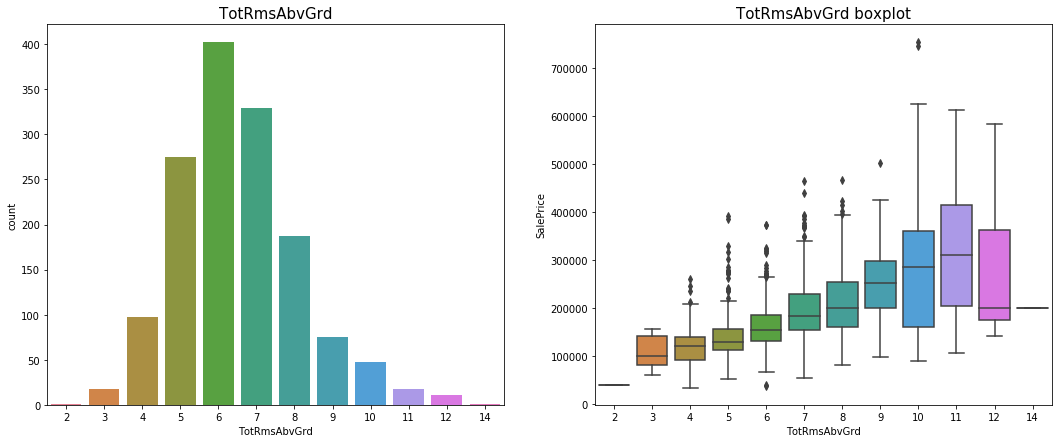

In [91]:
show_feature_cat(train, train.columns[54])

### Functional

Functional: Home functionality (Assume typical unless deductions are warranted)

       Typ	Typical Functionality
       Min1	Minor Deductions 1
       Min2	Minor Deductions 2
       Mod	Moderate Deductions
       Maj1	Major Deductions 1
       Maj2	Major Deductions 2
       Sev	Severely Damaged
       Sal	Salvage only

Typ     1360
Min2      34
Min1      31
Mod       15
Maj1      14
Maj2       5
Sev        1
Name: Functional, dtype: int64

count     1460
unique       7
top        Typ
freq      1360
Name: Functional, dtype: object

# of nan data: 0
% of nan data: 0.0%


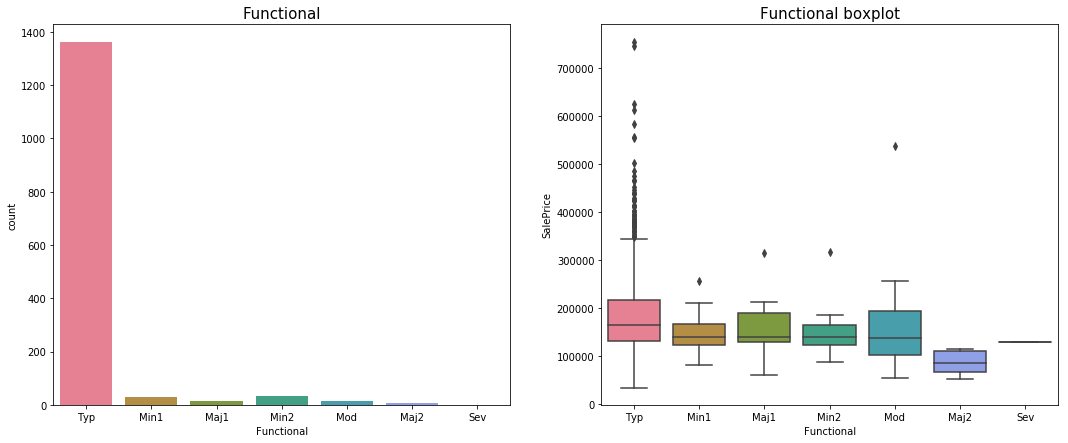

In [92]:
show_feature_cat(train, train.columns[55])

In [93]:
train[train.columns[55]].value_counts(normalize=True)

Typ     0.931507
Min2    0.023288
Min1    0.021233
Mod     0.010274
Maj1    0.009589
Maj2    0.003425
Sev     0.000685
Name: Functional, dtype: float64

### Fireplaces

Fireplaces: Number of fireplaces

- data embeding

0    690
1    650
2    115
3      5
Name: Fireplaces, dtype: int64

count    1460.000000
mean        0.613014
std         0.644666
min         0.000000
25%         0.000000
50%         1.000000
75%         1.000000
max         3.000000
Name: Fireplaces, dtype: float64

# of nan data: 0
% of nan data: 0.0%


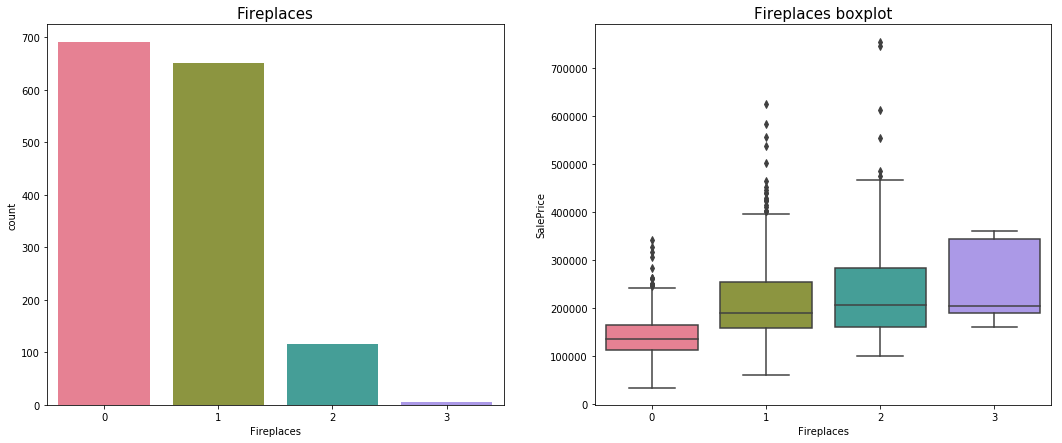

In [94]:
show_feature_cat(train, train.columns[56])

### FireplaceQu

FireplaceQu: Fireplace quality

       Ex	Excellent - Exceptional Masonry Fireplace
       Gd	Good - Masonry Fireplace in main level
       TA	Average - Prefabricated Fireplace in main living area or Masonry Fireplace in basement
       Fa	Fair - Prefabricated Fireplace in basement
       Po	Poor - Ben Franklin Stove
       NA	No Fireplace

- data embeding
- NaN 은 0으로 

Gd    380
TA    313
Fa     33
Ex     24
Po     20
Name: FireplaceQu, dtype: int64

count     770
unique      5
top        Gd
freq      380
Name: FireplaceQu, dtype: object

# of nan data: 690
% of nan data: 47.26%


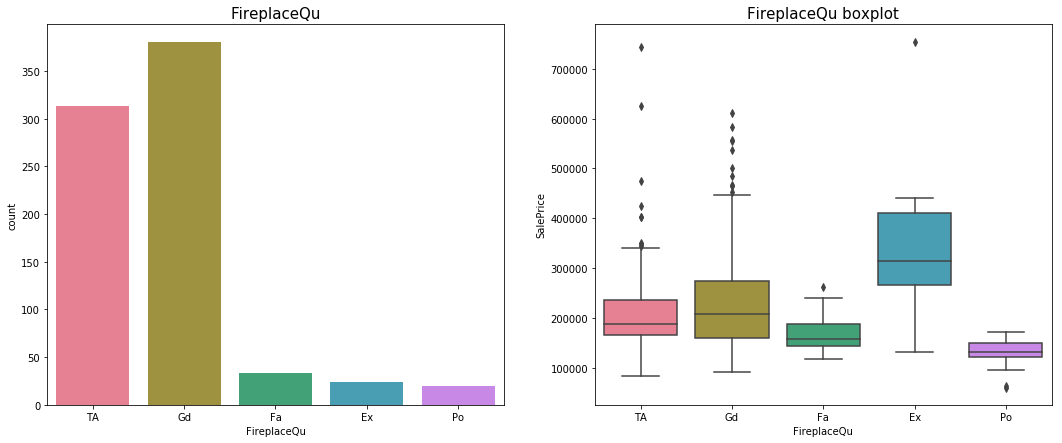

In [95]:
show_feature_cat(train, train.columns[57])

### GarageType

GarageType: Garage location
		
       2Types	More than one type of garage
       Attchd	Attached to home
       Basment	Basement Garage
       BuiltIn	Built-In (Garage part of house - typically has room above garage)
       CarPort	Car Port
       Detchd	Detached from home
       NA	No Garage

- NaN 값 처리 => 클래스 NA(No Garage)로 채우기 

Attchd     870
Detchd     387
BuiltIn     88
Basment     19
CarPort      9
2Types       6
Name: GarageType, dtype: int64

count       1379
unique         6
top       Attchd
freq         870
Name: GarageType, dtype: object

# of nan data: 81
% of nan data: 5.55%


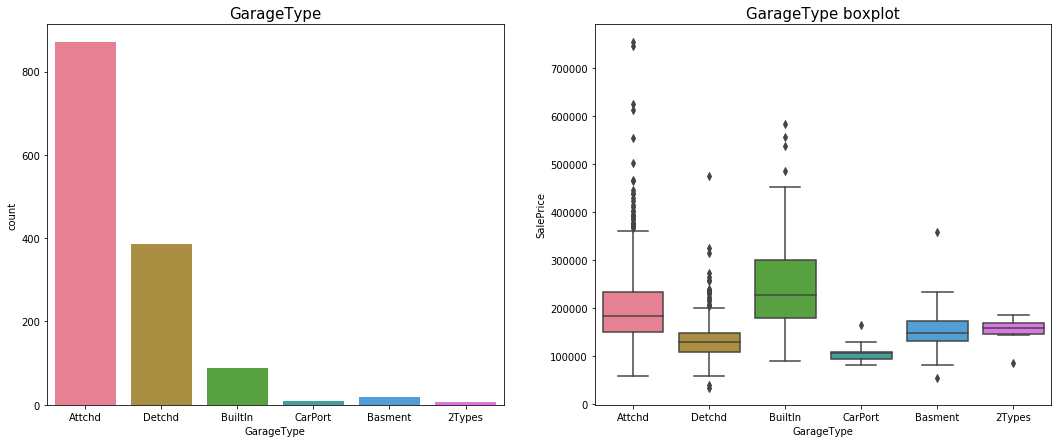

In [96]:
show_feature_cat(train, train.columns[58])

### GarageYrBlt

GarageYrBlt: Year garage was built

- NaN 값 처리 => 0으로 채우기

count    1379.000000
mean     1978.506164
std        24.689725
min      1900.000000
25%      1961.000000
50%      1980.000000
75%      2002.000000
max      2010.000000
Name: GarageYrBlt, dtype: float64

# of nan data: 81
% of nan data: 5.55%
correlation: 48.64%


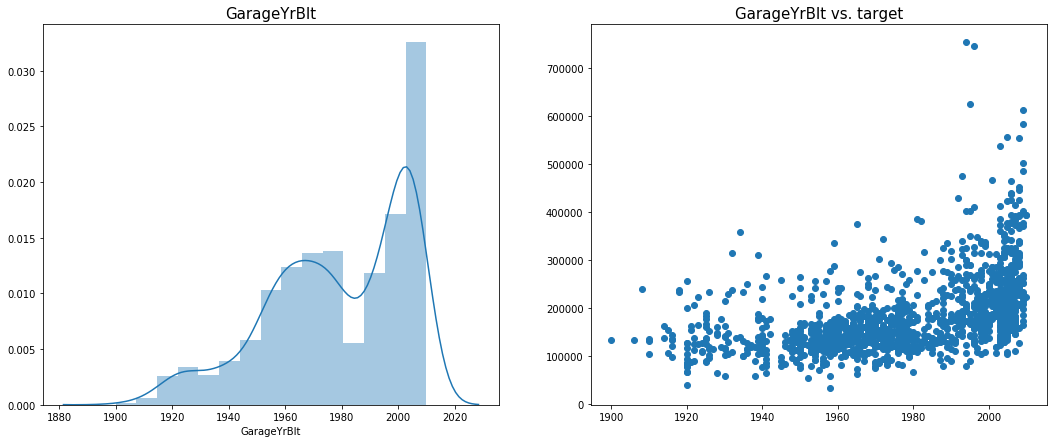

In [97]:
show_feature_num(train, train.columns[59])

### GarageFinish

GarageFinish: Interior finish of the garage

       Fin	Finished
       RFn	Rough Finished	
       Unf	Unfinished
       NA	No Garage

- ordered class => data embeding
- NaN 채우기 => 클래스 NA(No Garage)로 채우기

Unf    605
RFn    422
Fin    352
Name: GarageFinish, dtype: int64

count     1379
unique       3
top        Unf
freq       605
Name: GarageFinish, dtype: object

# of nan data: 81
% of nan data: 5.55%


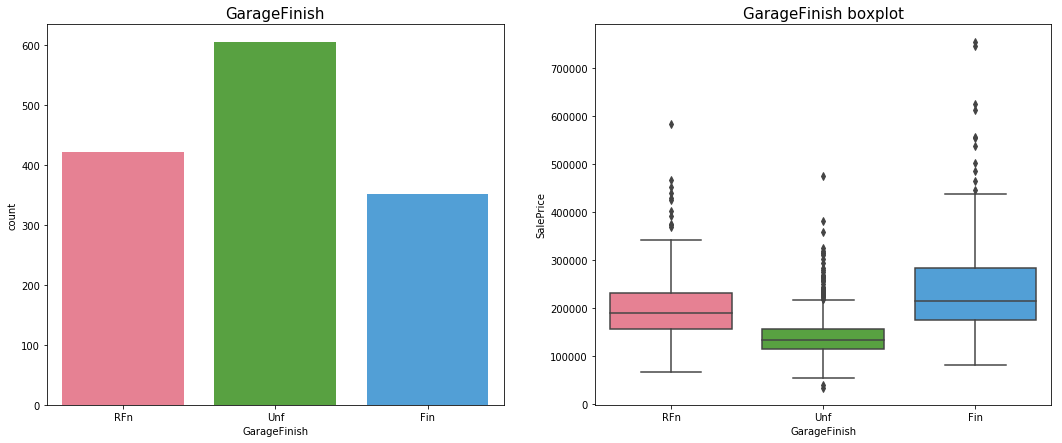

In [98]:
show_feature_cat(train, train.columns[60])

### GarageCars

GarageCars: Size of garage in car capacity

- numeric data로 사용

2    824
1    369
3    181
0     81
4      5
Name: GarageCars, dtype: int64

count    1460.000000
mean        1.767123
std         0.747315
min         0.000000
25%         1.000000
50%         2.000000
75%         2.000000
max         4.000000
Name: GarageCars, dtype: float64

# of nan data: 0
% of nan data: 0.0%


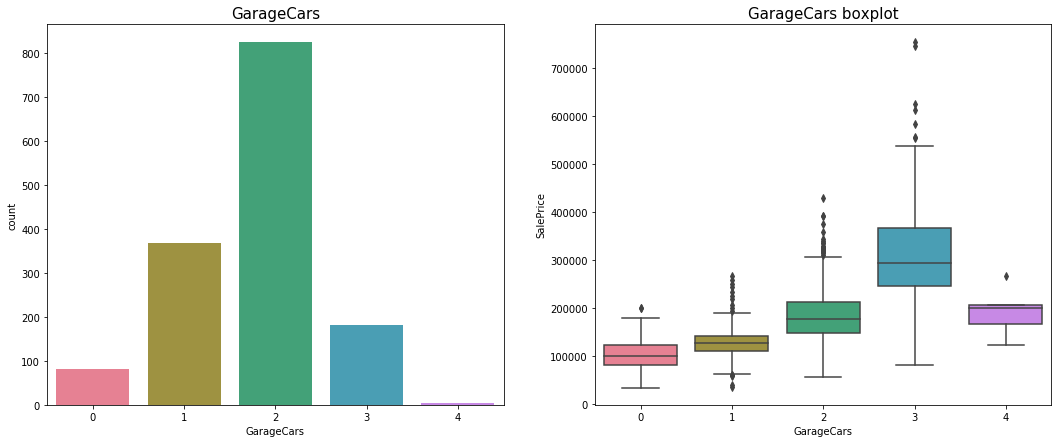

In [99]:
show_feature_cat(train, train.columns[61])

### GarageArea

GarageArea: Size of garage in square feet

count    1460.000000
mean      472.980137
std       213.804841
min         0.000000
25%       334.500000
50%       480.000000
75%       576.000000
max      1418.000000
Name: GarageArea, dtype: float64

# of nan data: 0
% of nan data: 0.0%
correlation: 62.34%


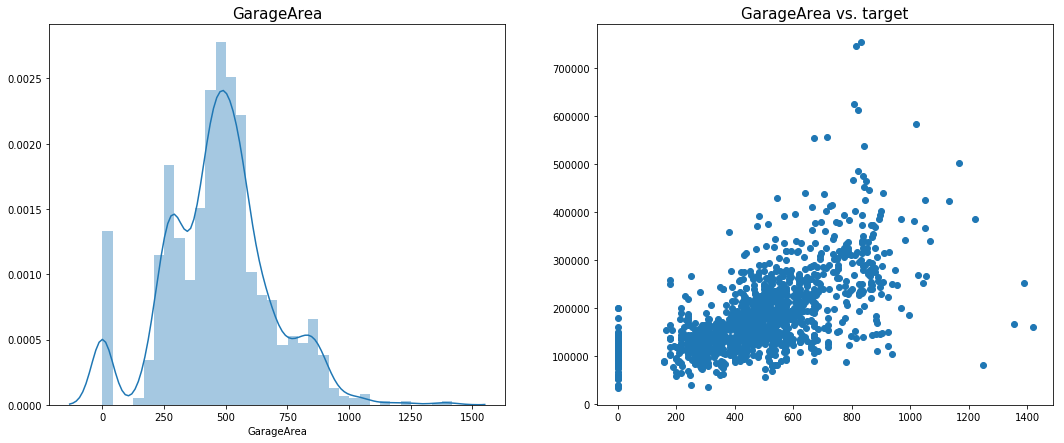

In [100]:
show_feature_num(train, train.columns[62])

### GarageQual

GarageQual: Garage quality

       Ex	Excellent
       Gd	Good
       TA	Typical/Average
       Fa	Fair
       Po	Poor
       NA	No Garage

- ordered class => data embeding
- NaN 채우기 => 클래스 NA(No Garage)로 채우기

TA    1311
Fa      48
Gd      14
Po       3
Ex       3
Name: GarageQual, dtype: int64

count     1379
unique       5
top         TA
freq      1311
Name: GarageQual, dtype: object

# of nan data: 81
% of nan data: 5.55%


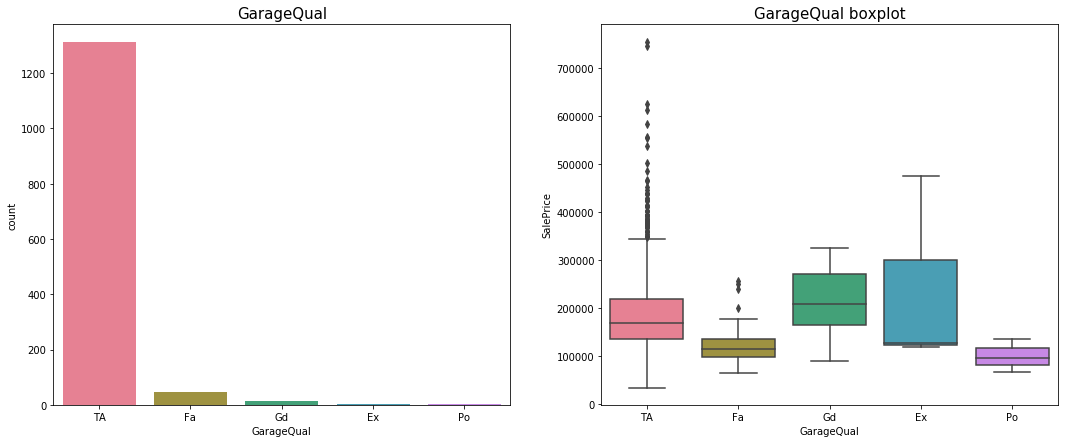

In [101]:
show_feature_cat(train, train.columns[63])

### GarageCond

GarageCond: Garage condition

       Ex	Excellent
       Gd	Good
       TA	Typical/Average
       Fa	Fair
       Po	Poor
       NA	No Garage

- ordered class => data embeding
- NaN 채우기 => 클래스 NA(No Garage)로 채우기

TA    1326
Fa      35
Gd       9
Po       7
Ex       2
Name: GarageCond, dtype: int64

count     1379
unique       5
top         TA
freq      1326
Name: GarageCond, dtype: object

# of nan data: 81
% of nan data: 5.55%


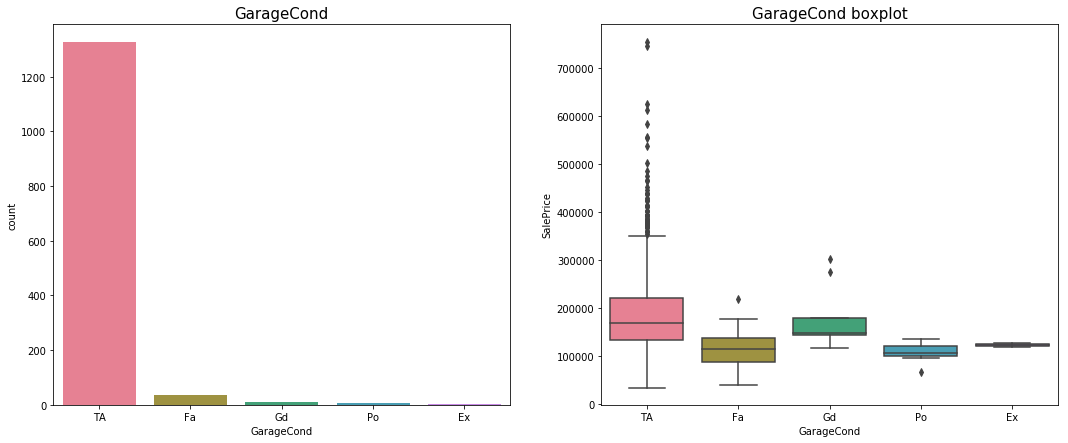

In [102]:
show_feature_cat(train, train.columns[64])

In [103]:
display(train[train[train.columns[60]].notna()].tail())  # 38


Id  MSSubClass MSZoning  LotFrontage  LotArea Street Alley LotShape  \
1455  1456          60       RL         62.0     7917   Pave   NaN      Reg   
1456  1457          20       RL         85.0    13175   Pave   NaN      Reg   
1457  1458          70       RL         66.0     9042   Pave   NaN      Reg   
1458  1459          20       RL         68.0     9717   Pave   NaN      Reg   
1459  1460          20       RL         75.0     9937   Pave   NaN      Reg   

     LandContour Utilities LotConfig LandSlope Neighborhood Condition1  \
1455         Lvl    AllPub    Inside       Gtl      Gilbert       Norm   
1456         Lvl    AllPub    Inside       Gtl       NWAmes       Norm   
1457         Lvl    AllPub    Inside       Gtl      Crawfor       Norm   
1458         Lvl    AllPub    Inside       Gtl        NAmes       Norm   
1459         Lvl    AllPub    Inside       Gtl      Edwards       Norm   

     Condition2 BldgType HouseStyle  OverallQual  OverallCond  YearBuilt  \
1455       Norm     1Fam     2Story            6            5       1999   
1456       Norm     1Fam     1Story            6            6       1978   
1457       Norm     1Fam     2Story            7            9       1941   
1458       Norm     1Fam     1Story            5            6       1950   
1459       Norm     1Fam     1Story            5            6       1965   

      YearRemodAdd RoofStyle RoofMatl Exterior1st Exterior2nd MasVnrType  \
1455          2000     Gable  CompShg     VinylSd     VinylSd       None   
1456          1988     Gable  CompShg     Plywood     Plywood      Stone   
1457          2006     Gable  CompShg     CemntBd     CmentBd       None   
1458          1996       Hip  CompShg     MetalSd     MetalSd       None   
1459          1965     Gable  CompShg     HdBoard     HdBoard       None   

      MasVnrArea ExterQual ExterCond Foundation BsmtQual BsmtCond  \
1455         0.0        TA        TA      PConc       Gd       TA   
1456       119.0        TA        TA     CBlock       Gd       TA   
1457         0.0        Ex        Gd      Stone       TA       Gd   
1458         0.0        TA        TA     CBlock       TA       TA   
1459         0.0        Gd        TA     CBlock       TA       TA   

     BsmtExposure BsmtFinType1  BsmtFinSF1 BsmtFinType2  BsmtFinSF2  \
1455           No          Unf           0          Unf           0   
1456           No          ALQ         790          Rec         163   
1457           No          GLQ         275          Unf           0   
1458           Mn          GLQ          49          Rec        1029   
1459           No          BLQ         830          LwQ         290   

      BsmtUnfSF  TotalBsmtSF Heating HeatingQC CentralAir Electrical  \
1455        953          953    GasA        Ex          Y      SBrkr   
1456        589         1542    GasA        TA          Y      SBrkr   
1457        877         1152    GasA        Ex          Y      SBrkr   
1458          0         1078    GasA        Gd          Y      FuseA   
1459        136         1256    GasA        Gd          Y      SBrkr   

      1stFlrSF  2ndFlrSF  LowQualFinSF  GrLivArea  BsmtFullBath  BsmtHalfBath  \
1455       953       694             0       1647             0             0   
1456      2073         0             0       2073             1             0   
1457      1188      1152             0       2340             0             0   
1458      1078         0             0       1078             1             0   
1459      1256         0             0       1256             1             0   

      FullBath  HalfBath  BedroomAbvGr  KitchenAbvGr KitchenQual  \
1455         2         1             3             1          TA   
1456         2         0             3             1          TA   
1457         2         0             4             1          Gd   
1458         1         0             2             1          Gd   
1459         1         1             3             1          TA   

   

In [104]:
display(train[train[train.columns[60]].isna()])  # 81

Id  MSSubClass MSZoning  LotFrontage  LotArea Street Alley LotShape  \
39      40          90       RL         65.0     6040   Pave   NaN      Reg   
48      49         190       RM         33.0     4456   Pave   NaN      Reg   
78      79          90       RL         72.0    10778   Pave   NaN      Reg   
88      89          50  C (all)        105.0     8470   Pave   NaN      IR1   
89      90          20       RL         60.0     8070   Pave   NaN      Reg   
99     100          20       RL         77.0     9320   Pave   NaN      IR1   
108    109          50       RM         85.0     8500   Pave   NaN      Reg   
125    126         190       RM         60.0     6780   Pave   NaN      Reg   
127    128          45       RM         55.0     4388   Pave   NaN      IR1   
140    141          20       RL         70.0    10500   Pave   NaN      Reg   
148    149          20       RL         63.0     7500   Pave   NaN      Reg   
155    156          50       RL         60.0     9600   Pave   NaN      Reg   
163    164          45       RL         55.0     5500   Pave   NaN      Reg   
165    166         190       RL         62.0    10106   Pave   NaN      Reg   
198    199          75       RM         92.0     5520   Pave   NaN      Reg   
210    211          30       RL         67.0     5604   Pave   NaN      Reg   
241    242          30       RM         40.0     3880   Pave   NaN      Reg   
250    251          30       RL         55.0     5350   Pave   NaN      IR1   
287    288          20       RL          NaN     8125   Pave   NaN      IR1   
291    292         190       RL         55.0     5687   Pave  Grvl      Reg   
307    308          50       RM          NaN     7920   Pave  Grvl      IR1   
375    376          30       RL          NaN    10020   Pave   NaN      IR1   
386    387          50       RL         58.0     8410   Pave   NaN      Reg   
393    394          30       RL          NaN     7446   Pave   NaN      Reg   
431    432          50       RM         60.0     5586   Pave   NaN      IR1   
434    435         180       RM         21.0     1890   Pave   NaN      Reg   
441    442          90       RL         92.0    12108   Pave   NaN      Reg   
464    465          20       RL         60.0     8430   Pave   NaN      Reg   
495    496          30  C (all)         60.0     7879   Pave   NaN      Reg   
520    521         190       RL         60.0    10800   Pave  Grvl      Reg   
528    529          30       RL         58.0     9098   Pave   NaN      IR1   
533    534          20       RL         50.0     5000   Pave   NaN      Reg   
535    536         190       RL         70.0     7000   Pave   NaN      Reg   
562    563          30       RL         63.0    13907   Pave   NaN      Reg   
582    583          90       RL         81.0    11841   Grvl   NaN      Reg   
613    614          20       RL         70.0     8402   Pave   NaN      Reg   
614    615         180       RM         21.0     1491   Pave   NaN      Reg   
620    621          30       RL         45.0     8248   Pave  Grvl      Reg   
635    636         190       RH         60.0    10896   Pave  Pave      Reg   
636    637          30       RM         51.0     6120   Pave   NaN      Reg   
638    639          30       RL         67.0     8777   Pave   NaN      Reg   
649    650         180       RM         21.0     1936   Pave   NaN      Reg   
705    706         190       RM         70.0     5600   Pave   NaN      Reg   
710    711          30       RL         56.0     4130   Pave   NaN      IR1   
738    739          90       RL         60.0    10800   Pave   NaN      Reg   
750    751          50       RM         55.0     8800   Pave  Grvl      Reg   
784    785          75       RM         35.0     6300   Pave  Grvl      Reg   
826    827          45       RM         50.0     6130   Pave   NaN      Reg   
843    844          90       RL         80.0     8000   Pave   NaN      Reg   
921    922          90       RL         67.0     8777   Pa

### PavedDrive

PavedDrive: Paved driveway

       Y	Paved 
       P	Partial Pavement
       N	Dirt/Gravel

- ordered class => data embeding

Y    1340
N      90
P      30
Name: PavedDrive, dtype: int64

count     1460
unique       3
top          Y
freq      1340
Name: PavedDrive, dtype: object

# of nan data: 0
% of nan data: 0.0%


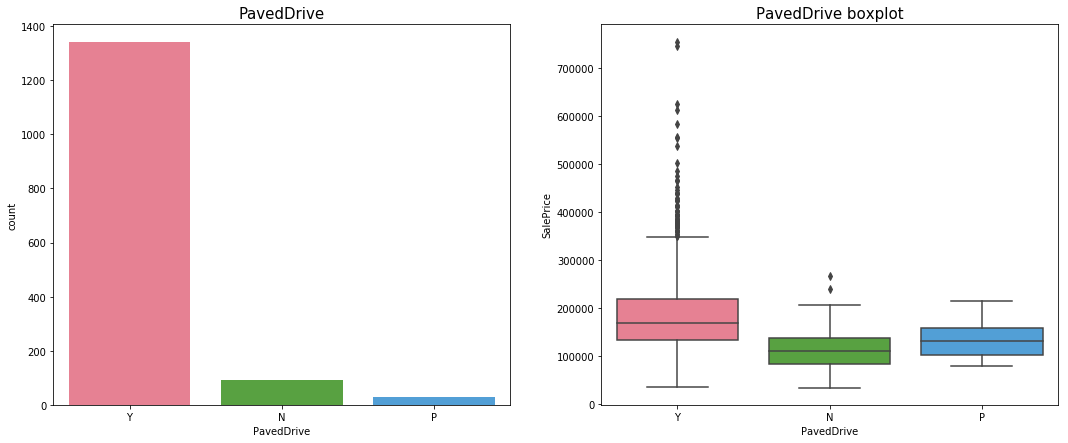

In [105]:
show_feature_cat(train, train.columns[65])

### WoodDeckSF

WoodDeckSF: Wood deck area in square feet

count    1460.000000
mean       94.244521
std       125.338794
min         0.000000
25%         0.000000
50%         0.000000
75%       168.000000
max       857.000000
Name: WoodDeckSF, dtype: float64

# of nan data: 0
% of nan data: 0.0%
correlation: 32.44%


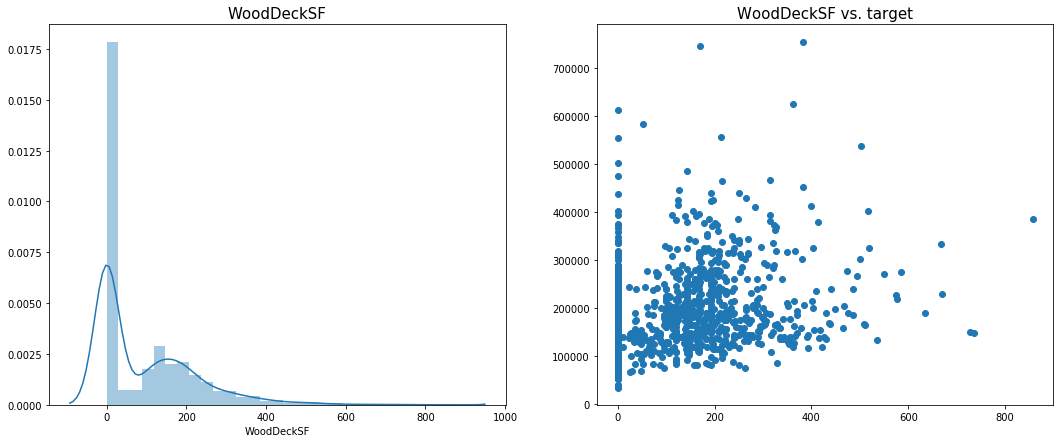

In [106]:
show_feature_num(train, train.columns[66])

### OpenPorchSF

OpenPorchSF: Open porch area in square feet

count    1460.000000
mean       46.660274
std        66.256028
min         0.000000
25%         0.000000
50%        25.000000
75%        68.000000
max       547.000000
Name: OpenPorchSF, dtype: float64

# of nan data: 0
% of nan data: 0.0%
correlation: 31.59%


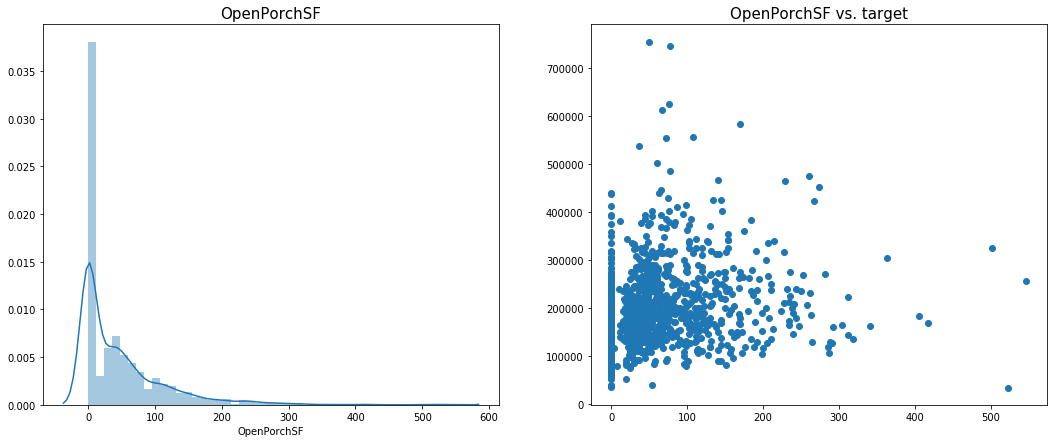

In [107]:
show_feature_num(train, train.columns[67])

### EnclosedPorch

EnclosedPorch: Enclosed porch area in square feet

count    1460.000000
mean       21.954110
std        61.119149
min         0.000000
25%         0.000000
50%         0.000000
75%         0.000000
max       552.000000
Name: EnclosedPorch, dtype: float64

# of nan data: 0
% of nan data: 0.0%
correlation: -12.86%


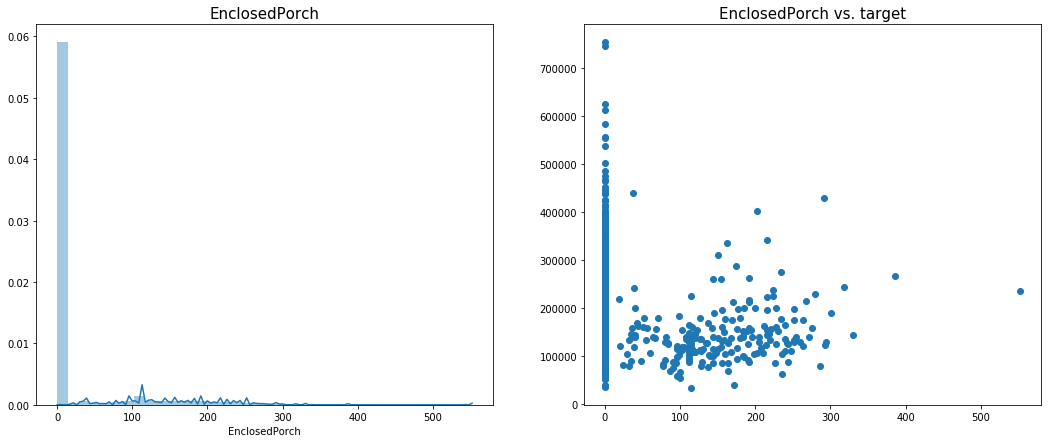

In [108]:
show_feature_num(train, train.columns[68])

In [109]:
display(train[train[train.columns[68]] > 0])  # 208

Id  MSSubClass MSZoning  LotFrontage  LotArea Street Alley LotShape  \
3        4          70       RL         60.0     9550   Pave   NaN      IR1   
7        8          60       RL          NaN    10382   Pave   NaN      IR1   
8        9          50       RM         51.0     6120   Pave   NaN      Reg   
14      15          20       RL          NaN    10920   Pave   NaN      IR1   
21      22          45       RM         57.0     7449   Pave  Grvl      Reg   
29      30          30       RM         60.0     6324   Pave   NaN      IR1   
30      31          70  C (all)         50.0     8500   Pave  Pave      Reg   
48      49         190       RM         33.0     4456   Pave   NaN      Reg   
58      59          60       RL         66.0    13682   Pave   NaN      IR2   
61      62          75       RM         60.0     7200   Pave   NaN      Reg   
63      64          70       RM         50.0    10300   Pave   NaN      IR1   
69      70          50       RL         81.0    15593   Pave   NaN      Reg   
74      75          50       RM         60.0     5790   Pave   NaN      Reg   
79      80          50       RM         60.0    10440   Pave  Grvl      Reg   
88      89          50  C (all)        105.0     8470   Pave   NaN      IR1   
92      93          30       RL         80.0    13360   Pave  Grvl      IR1   
98      99          30       RL         85.0    10625   Pave   NaN      Reg   
108    109          50       RM         85.0     8500   Pave   NaN      Reg   
113    114          20       RL          NaN    21000   Pave   NaN      Reg   
116    117          20       RL          NaN    11616   Pave   NaN      Reg   
121    122          50       RM         50.0     6060   Pave   NaN      Reg   
134    135          20       RL         78.0    10335   Pave   NaN      IR1   
154    155          30       RM         84.0    11340   Pave   NaN      Reg   
155    156          50       RL         60.0     9600   Pave   NaN      Reg   
164    165          40       RM         40.0     5400   Pave  Pave      Reg   
175    176          20       RL         84.0    12615   Pave   NaN      Reg   
179    180          30       RM         60.0     8520   Pave   NaN      Reg   
181    182          70       RL         54.0     7588   Pave   NaN      Reg   
197    198          75       RL        174.0    25419   Pave   NaN      Reg   
198    199          75       RM         92.0     5520   Pave   NaN      Reg   
202    203          50       RL         50.0     7000   Pave   NaN      Reg   
210    211          30       RL         67.0     5604   Pave   NaN      Reg   
217    218          70       RM         57.0     9906   Pave  Grvl      Reg   
218    219          50       RL          NaN    15660   Pave   NaN      IR1   
230    231          20       RL         73.0     8760   Pave   NaN      Reg   
231    232          60       RL        174.0    15138   Pave   NaN      IR1   
242    243          50       RM         63.0     5000   Pave   NaN      Reg   
246    247         190       RM         69.0     9142   Pave  Grvl      Reg   
260    261          80       RL        120.0    19296   Pave   NaN      Reg   
284    285         120       RL         50.0     8012   Pave   NaN      Reg   
306    307          60       RL        116.0    13474   Pave   NaN      Reg   
314    315          70       RM         60.0     9600   Pave  Grvl      Reg   
318    319          60       RL         90.0     9900   Pave   NaN      Reg   
325    326          45       RM         50.0     5000   Pave   NaN      Reg   
328    329          75       RL          NaN    11888   Pave  Pave      IR1   
329    330          70       RM         60.0     6402   Pave   NaN      Reg   
341    342          20       RH         60.0     8400   Pave   NaN      Reg   
354    355          50       RL         60.0     8400   Pave   NaN      Reg   
358    359          80       RL         92.0     6930   Pave   NaN      IR1   
362    363          85       RL         64.0     7301   Pa

### 3SsnPorch

3SsnPorch: Three season porch area in square feet

count    1460.000000
mean        3.409589
std        29.317331
min         0.000000
25%         0.000000
50%         0.000000
75%         0.000000
max       508.000000
Name: 3SsnPorch, dtype: float64

# of nan data: 0
% of nan data: 0.0%
correlation: 4.46%


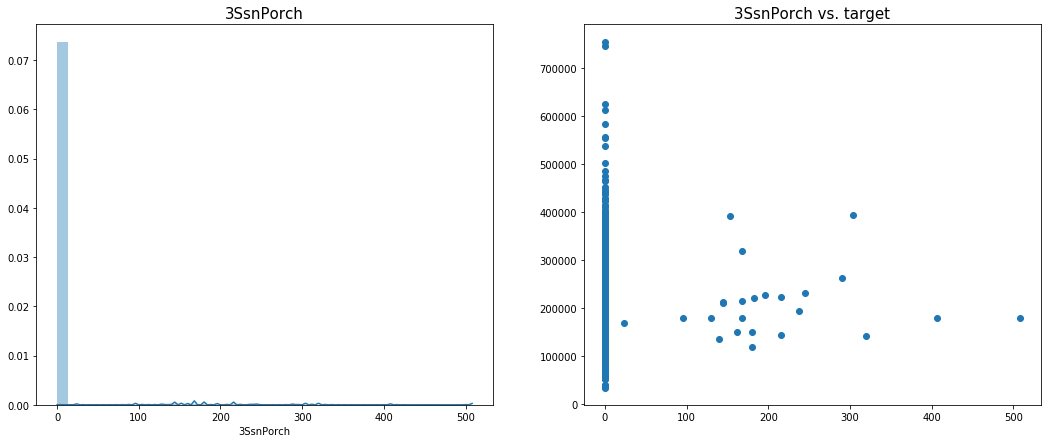

In [110]:
show_feature_num(train, train.columns[69])

In [111]:
display(train[train[train.columns[69]] > 0])  # 24

Id  MSSubClass MSZoning  LotFrontage  LotArea Street Alley LotShape  \
5        6          50       RL         85.0    14115   Pave   NaN      IR1   
55      56          20       RL        100.0    10175   Pave   NaN      IR1   
120    121          80       RL          NaN    21453   Pave   NaN      IR1   
129    130          20       RL         69.0     8973   Pave   NaN      Reg   
159    160          60       RL        134.0    19378   Pave   NaN      IR1   
182    183          20       RL         60.0     9060   Pave   NaN      Reg   
187    188          50       RL         60.0    10410   Pave   NaN      Reg   
205    206          20       RL         99.0    11851   Pave   NaN      Reg   
237    238          60       RL          NaN     9453   Pave   NaN      IR1   
258    259          60       RL         80.0    12435   Pave   NaN      Reg   
280    281          60       RL         82.0    11287   Pave   NaN      Reg   
546    547          50       RL         70.0     8737   Pave   NaN      IR1   
704    705          20       RL         70.0     8400   Pave   NaN      Reg   
726    727          20       RL          NaN    21695   Pave   NaN      IR1   
744    745         120       RL         41.0     5395   Pave   NaN      IR1   
889    890          20       RL        128.0    12160   Pave   NaN      Reg   
922    923          20       RL         65.0    10237   Pave   NaN      Reg   
941    942          60       RL          NaN     8755   Pave   NaN      IR1   
1080  1081          20       RL         80.0    11040   Pave   NaN      Reg   
1156  1157          80       RL         85.0     9350   Pave   NaN      Reg   
1161  1162          20       RL          NaN    14778   Pave   NaN      IR1   
1181  1182         120       RM         64.0     5587   Pave   NaN      IR1   
1346  1347          20       RL          NaN    20781   Pave   NaN      IR2   
1437  1438          20       RL         96.0    12444   Pave   NaN      Reg   

     LandContour Utilities LotConfig LandSlope Neighborhood Condition1  \
5            Lvl    AllPub    Inside       Gtl      Mitchel       Norm   
55           Lvl    AllPub    Inside       Gtl        NAmes       Norm   
120          Low    AllPub   CulDSac       Sev      ClearCr       Norm   
129          Lvl    AllPub    Inside       Gtl        NAmes       Norm   
159          HLS    AllPub    Corner       Gtl      Gilbert       Norm   
182          Lvl    AllPub    Inside       Gtl      Edwards     Artery   
187          Lvl    AllPub    Inside       Gtl      OldTown       Norm   
205          Lvl    AllPub    Corner       Gtl      Gilbert       Norm   
237          Lvl    AllPub   CulDSac       Gtl      SawyerW       RRNe   
258          Lvl    AllPub    Inside       Gtl      CollgCr       Norm   
280          Lvl    AllPub    Inside       Gtl      SawyerW       Norm   
546          Bnk    AllPub    Inside       Gtl      BrkSide       Norm   
704          Lvl    AllPub    Inside       Gtl      CollgCr       Norm   
726          Lvl    AllPub    Corner       Gtl      Crawfor       Norm   
744          HLS    AllPub    Inside       Gtl      StoneBr       Norm   
889          Lvl    AllPub    Inside       Gtl        NAmes      Feedr   
922          Lvl    AllPub    Inside       Gtl      Gilbert       RRAn   
941          Lvl    AllPub       FR2       Gtl      Gilbert       RRNn   
1080         Lvl    AllPub    Inside       Gtl       NWAmes       Norm   
1156         Lvl    AllPub    Inside       Gtl        NAmes       Norm   
1161         Low    AllPub   CulDSac       Gtl      Crawfor       PosN   
1181         HLS    AllPub    Inside       Mod      Crawfor       Norm   
1346         Lvl    AllPub   CulDSac       Gtl       NWAmes       PosN   
1437         Lvl    AllPub       FR2       Gtl      NridgHt       Norm   

     Condition2 BldgType HouseStyle  OverallQual  OverallCond  YearBuilt  \
5          Norm     1Fam     1.5Fin            5            5       1993   
55         Norm     1Fam     

### ScreenPorch

ScreenPorch: Screen porch area in square feet

count    1460.000000
mean       15.060959
std        55.757415
min         0.000000
25%         0.000000
50%         0.000000
75%         0.000000
max       480.000000
Name: ScreenPorch, dtype: float64

# of nan data: 0
% of nan data: 0.0%
correlation: 11.14%


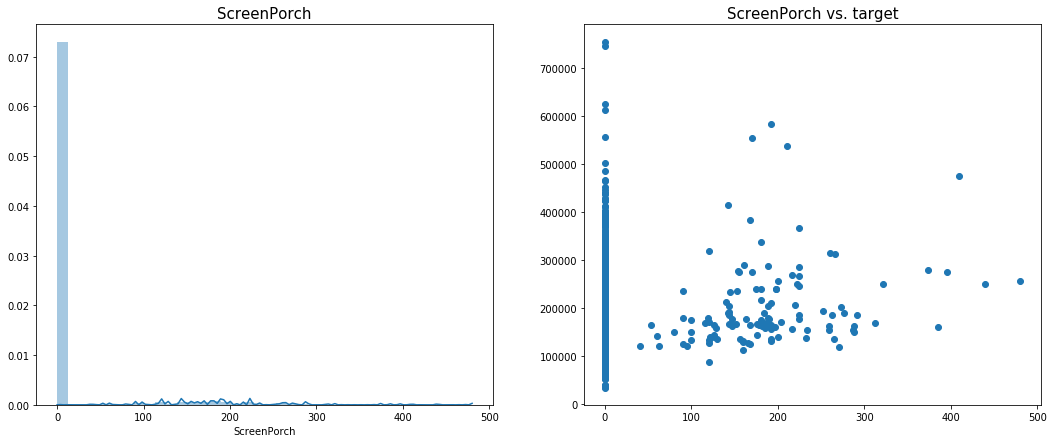

In [112]:
show_feature_num(train, train.columns[70])

In [113]:
display(train[train[train.columns[70]] > 0])  # 116

Id  MSSubClass MSZoning  LotFrontage  LotArea Street Alley LotShape  \
12      13          20       RL          NaN    12968   Pave   NaN      IR2   
46      47          50       RL         48.0    12822   Pave   NaN      IR1   
72      73          60       RL         74.0    10141   Pave   NaN      IR1   
80      81          60       RL        100.0    13000   Pave   NaN      Reg   
93      94         190  C (all)         60.0     7200   Pave   NaN      Reg   
104    105          50       RM          NaN     7758   Pave   NaN      Reg   
112    113          60       RL         77.0     9965   Pave   NaN      Reg   
122    123          20       RL         75.0     9464   Pave   NaN      Reg   
166    167          20       RL          NaN    10708   Pave   NaN      IR1   
176    177          60       RL         97.0    10029   Pave   NaN      IR1   
185    186          75       RM         90.0    22950   Pave   NaN      IR2   
189    190         120       RL         41.0     4923   Pave   NaN      Reg   
196    197          20       RL         79.0     9416   Pave   NaN      Reg   
199    200          20       RL         76.0     9591   Pave   NaN      Reg   
208    209          60       RL          NaN    14364   Pave   NaN      IR1   
251    252         120       RM         44.0     4750   Pave   NaN      IR1   
275    276          50       RL         55.0     7264   Pave   NaN      Reg   
278    279          20       RL        107.0    14450   Pave   NaN      Reg   
286    287          50       RL         77.0     9786   Pave   NaN      IR1   
289    290          70       RL         60.0     8730   Pave   NaN      Reg   
292    293          50       RL         60.0    11409   Pave   NaN      Reg   
297    298          60       FV         66.0     7399   Pave  Pave      IR1   
312    313         190       RM         65.0     7800   Pave   NaN      Reg   
339    340          20       RL         66.0    12400   Pave   NaN      IR1   
351    352         120       RL          NaN     5271   Pave   NaN      IR1   
359    360          60       RL         78.0    12011   Pave   NaN      IR1   
360    361          85       RL          NaN     7540   Pave   NaN      IR1   
366    367          20       RL          NaN     9500   Pave   NaN      IR1   
369    370          20       RL          NaN     9830   Pave   NaN      IR1   
372    373         120       RL         50.0     7175   Pave   NaN      Reg   
385    386         120       RL         43.0     3182   Pave   NaN      Reg   
400    401         120       RL         38.0    14963   Pave   NaN      IR2   
426    427          80       RL          NaN    12800   Pave   NaN      Reg   
440    441          20       RL        105.0    15431   Pave   NaN      Reg   
466    467          20       RL         85.0    10628   Pave   NaN      Reg   
470    471         120       RL          NaN     6820   Pave   NaN      IR1   
471    472          60       RL         92.0    11952   Pave   NaN      Reg   
475    476          20       RL         80.0     8480   Pave   NaN      Reg   
487    488          20       RL         70.0    12243   Pave   NaN      IR1   
503    504          20       RL        100.0    15602   Pave   NaN      IR1   
510    511          20       RL         75.0    14559   Pave   NaN      Reg   
519    520          70       RL         53.0    10918   Pave   NaN      Reg   
550    551         120       RL         53.0     4043   Pave   NaN      Reg   
556    557          20       RL         69.0    14850   Pave   NaN      IR1   
560    561          20       RL          NaN    11341   Pave   NaN      IR1   
563    564          50       RL         66.0    21780   Pave   NaN      Reg   
584    585          50       RM         51.0     6120   Pave   NaN      Reg   
588    589          20       RL         65.0    25095   Pave   NaN      IR1   
595    596          20       RL         69.0    11302   Pave   NaN      IR1   
601    602          50       RM         50.0     9000   Pa

### PoolArea

PoolArea: Pool area in square feet

- feature 제거

count    1460.000000
mean        2.758904
std        40.177307
min         0.000000
25%         0.000000
50%         0.000000
75%         0.000000
max       738.000000
Name: PoolArea, dtype: float64

# of nan data: 0
% of nan data: 0.0%
correlation: 9.24%


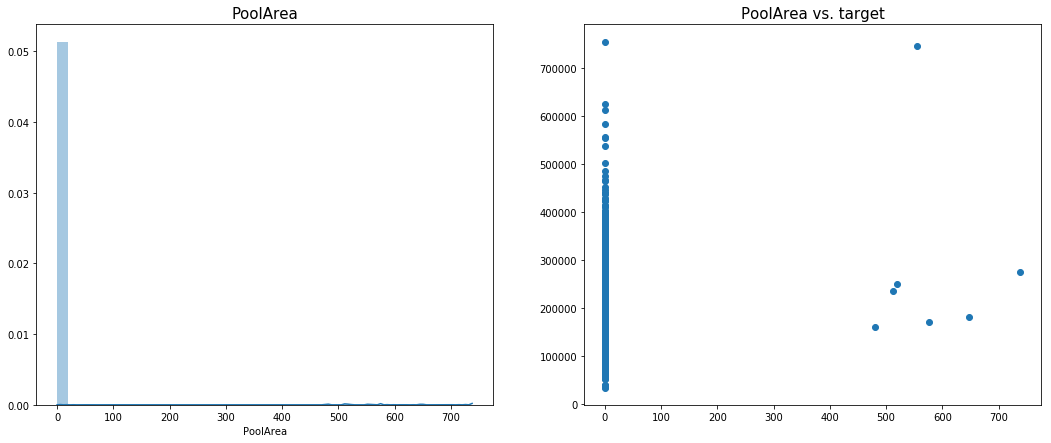

In [114]:
show_feature_num(train, train.columns[71])

In [115]:
display(train[train[train.columns[71]] > 0])  # 116

Id  MSSubClass MSZoning  LotFrontage  LotArea Street Alley LotShape  \
197    198          75       RL        174.0    25419   Pave   NaN      Reg   
810    811          20       RL         78.0    10140   Pave   NaN      Reg   
1170  1171          80       RL         76.0     9880   Pave   NaN      Reg   
1182  1183          60       RL        160.0    15623   Pave   NaN      IR1   
1298  1299          60       RL        313.0    63887   Pave   NaN      IR3   
1386  1387          60       RL         80.0    16692   Pave   NaN      IR1   
1423  1424          80       RL          NaN    19690   Pave   NaN      IR1   

     LandContour Utilities LotConfig LandSlope Neighborhood Condition1  \
197          Lvl    AllPub    Corner       Gtl        NAmes     Artery   
810          Lvl    AllPub    Inside       Gtl       NWAmes       Norm   
1170         Lvl    AllPub    Inside       Gtl      Mitchel       Norm   
1182         Lvl    AllPub    Corner       Gtl      NoRidge       Norm   
1298         Bnk    AllPub    Corner       Gtl      Edwards      Feedr   
1386         Lvl    AllPub    Inside       Gtl       NWAmes       RRAn   
1423         Lvl    AllPub   CulDSac       Gtl      Edwards       Norm   

     Condition2 BldgType HouseStyle  OverallQual  OverallCond  YearBuilt  \
197        Norm     1Fam     2Story            8            4       1918   
810        Norm     1Fam     1Story            6            6       1974   
1170       Norm     1Fam       SLvl            6            6       1977   
1182       Norm     1Fam     2Story           10            5       1996   
1298       Norm     1Fam     2Story           10            5       2008   
1386       Norm     1Fam     2Story            7            5       1978   
1423       Norm     1Fam       SLvl            6            7       1966   

      YearRemodAdd RoofStyle RoofMatl Exterior1st Exterior2nd MasVnrType  \
197           1990     Gable  CompShg      Stucco      Stucco       None   
810           1999       Hip  CompShg     HdBoard     HdBoard    BrkFace   
1170          1977     Gable  CompShg     Plywood     Plywood       None   
1182          1996       Hip  CompShg     Wd Sdng     ImStucc       None   
1298          2008       Hip  ClyTile      Stucco      Stucco      Stone   
1386          1978     Gable  CompShg     Plywood     Plywood    BrkFace   
1423          1966      Flat  Tar&Grv     Plywood     Plywood       None   

      MasVnrArea ExterQual ExterCond Foundation BsmtQual BsmtCond  \
197          0.0        Gd        Gd      PConc       TA       TA   
810         99.0        TA        TA     CBlock       TA       TA   
1170         0.0        TA        TA     CBlock       TA       TA   
1182         0.0        Gd        TA      PConc       Ex       TA   
1298       796.0        Ex        TA      PConc       Ex       TA   
1386       184.0        TA        TA     CBlock       Gd       TA   
1423         0.0        Gd        Gd     CBlock       Gd       TA   

     BsmtExposure BsmtFinType1  BsmtFinSF1 BsmtFinType2  BsmtFinSF2  \
197            No          GLQ        1036          LwQ         184   
810            No          ALQ         663          LwQ         377   
1170           Av          ALQ         522          Unf           0   
1182           Av          GLQ        2096          Unf           0   
1298           Gd          GLQ        5644          Unf           0   
1386           No          BLQ         790          LwQ         469   
1423           Av          Unf           0          Unf           0   

      BsmtUnfSF  TotalBsmtSF Heating HeatingQC CentralAir Electrical  \
197         140         1360    GasA        Gd          Y      SBrkr   
810           0         1040    GasA        Fa          Y      SBrkr   
1170        574         1096    GasA        TA          Y      SBrkr   
1182        300         2396    GasA        Ex          Y      SBrkr   
1298        466         6110    GasA        Ex          Y      SBrkr   
1386      

### PoolQC

PoolQC: Pool quality
		
       Ex	Excellent
       Gd	Good
       TA	Average/Typical
       Fa	Fair
       NA	No Pool

- NaN 값은 NA 클래스로 취급
- data embeding

Gd    3
Ex    2
Fa    2
Name: PoolQC, dtype: int64

count      7
unique     3
top       Gd
freq       3
Name: PoolQC, dtype: object

# of nan data: 1453
% of nan data: 99.52%


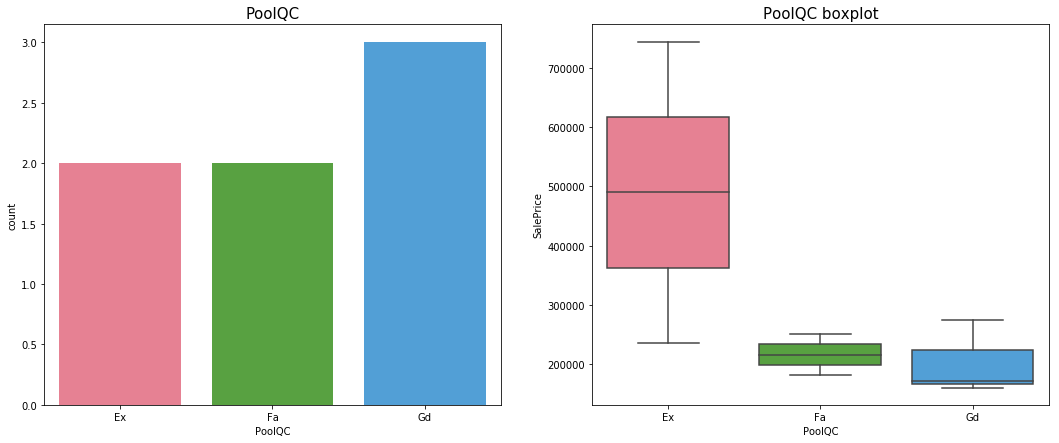

In [116]:
show_feature_cat(train, train.columns[72])

### Fence

Fence: Fence quality
		
       GdPrv	Good Privacy
       MnPrv	Minimum Privacy
       GdWo	Good Wood
       MnWw	Minimum Wood/Wire
       NA	No Fence

feature 2개로 분리
- Fence 종류 category feature (Privacy / Wood / No Fence)
- Fence quality numeric feature (Good / Minimum) => data embeding

MnPrv    157
GdPrv     59
GdWo      54
MnWw      11
Name: Fence, dtype: int64

count       281
unique        4
top       MnPrv
freq        157
Name: Fence, dtype: object

# of nan data: 1179
% of nan data: 80.75%


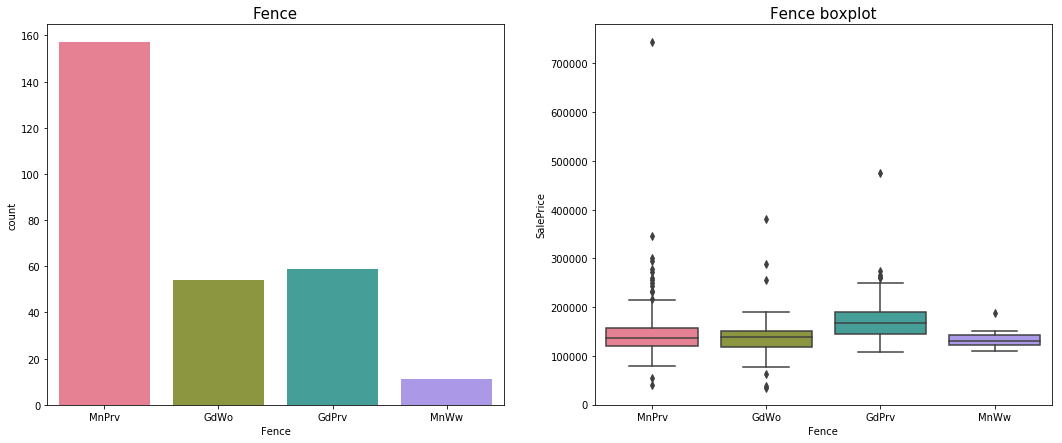

In [117]:
show_feature_cat(train, train.columns[73])

### MiscFeature

MiscFeature: Miscellaneous feature not covered in other categories
		
       Elev	Elevator
       Gar2	2nd Garage (if not described in garage section)
       Othr	Other
       Shed	Shed (over 100 SF)
       TenC	Tennis Court
       NA	None

- MiscFeature 있다, 없다. 
- ordered class => data embeding, NaN값 0으로 

- feature 제거

Shed    49
Gar2     2
Othr     2
TenC     1
Name: MiscFeature, dtype: int64

count       54
unique       4
top       Shed
freq        49
Name: MiscFeature, dtype: object

# of nan data: 1406
% of nan data: 96.3%


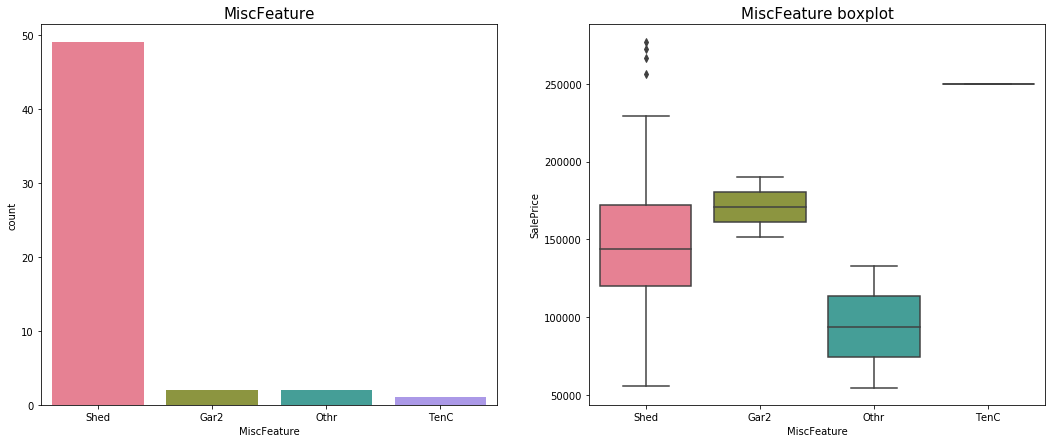

In [118]:
show_feature_cat(train, train.columns[74])

In [119]:
display(train[train[train.columns[74]].notna()])  # 54

Id  MSSubClass MSZoning  LotFrontage  LotArea Street Alley LotShape  \
5        6          50       RL         85.0    14115   Pave   NaN      IR1   
7        8          60       RL          NaN    10382   Pave   NaN      IR1   
16      17          20       RL          NaN    11241   Pave   NaN      IR1   
17      18          90       RL         72.0    10791   Pave   NaN      Reg   
51      52          50       RM         52.0     6240   Pave   NaN      Reg   
84      85          80       RL          NaN     8530   Pave   NaN      IR1   
95      96          60       RL          NaN     9765   Pave   NaN      IR2   
98      99          30       RL         85.0    10625   Pave   NaN      Reg   
99     100          20       RL         77.0     9320   Pave   NaN      IR1   
106    107          30       RM         60.0    10800   Pave  Grvl      Reg   
214    215          60       RL          NaN    10900   Pave   NaN      IR1   
249    250          50       RL          NaN   159000   Pave   NaN      IR2   
250    251          30       RL         55.0     5350   Pave   NaN      IR1   
335    336         190       RL          NaN   164660   Grvl   NaN      IR1   
338    339          20       RL         91.0    14145   Pave   NaN      Reg   
346    347          20       RL          NaN    12772   Pave   NaN      IR1   
392    393          20       RL          NaN     8339   Pave   NaN      IR1   
439    440          50       RL         67.0    12354   Pave  Grvl      Reg   
499    500          20       RL         70.0     7535   Pave   NaN      IR1   
502    503          20       RL         70.0     9170   Pave   NaN      Reg   
510    511          20       RL         75.0    14559   Pave   NaN      Reg   
539    540          20       RL          NaN    11423   Pave   NaN      Reg   
589    590          40       RM         50.0     9100   Pave   NaN      Reg   
611    612          80       RL          NaN    10395   Pave   NaN      IR1   
626    627          20       RL          NaN    12342   Pave   NaN      IR1   
634    635          90       RL         64.0     6979   Pave   NaN      Reg   
705    706         190       RM         70.0     5600   Pave   NaN      Reg   
725    726          20       RL         60.0     6960   Pave   NaN      Reg   
733    734          20       RL         80.0    10000   Pave   NaN      Reg   
760    761          20       RL         70.0     9100   Pave   NaN      Reg   
766    767          60       RL         80.0    10421   Pave   NaN      Reg   
767    768          50       RL         75.0    12508   Pave   NaN      IR1   
786    787          50       RM         60.0    10800   Pave   NaN      Reg   
794    795          60       RL          NaN    10832   Pave   NaN      IR1   
800    801          60       RL         79.0    12798   Pave   NaN      IR1   
812    813          20  C (all)         66.0     8712   Grvl   NaN      Reg   
813    814          20       RL         75.0     9750   Pave   NaN      Reg   
867    868          20       RL         85.0     6970   Pave   NaN      Reg   
873    874          40       RL         60.0    12144   Pave   NaN      Reg   
878    879          85       RL         88.0    11782   Pave   NaN      IR1   
890    891          50       RL         60.0     8064   Pave   NaN      Reg   
912    913          30       RM         51.0     6120   Pave   NaN      Reg   
953    954          60       RL          NaN    11075   Pave   NaN      IR1   
1061  1062          30  C (all)        120.0    18000   Grvl   NaN      Reg   
1076  1077          50       RL         60.0    10800   Pave  Grvl      Reg   
1083  1084          20       RL         80.0     8800   Pave   NaN      Reg   
1171  1172          20       RL         76.0     9120   Pave   NaN      Reg   
1200  1201          20       RL         71.0     9353   Pave   NaN      Reg   
1210  1211          60       RL         70.0    11218   Pave   NaN      Reg   
1230  1231          90       RL          NaN    18890   Pa

### MiscVal

MiscVal: $Value of miscellaneous feature

count     1460.000000
mean        43.489041
std        496.123024
min          0.000000
25%          0.000000
50%          0.000000
75%          0.000000
max      15500.000000
Name: MiscVal, dtype: float64

# of nan data: 0
% of nan data: 0.0%
correlation: -2.12%


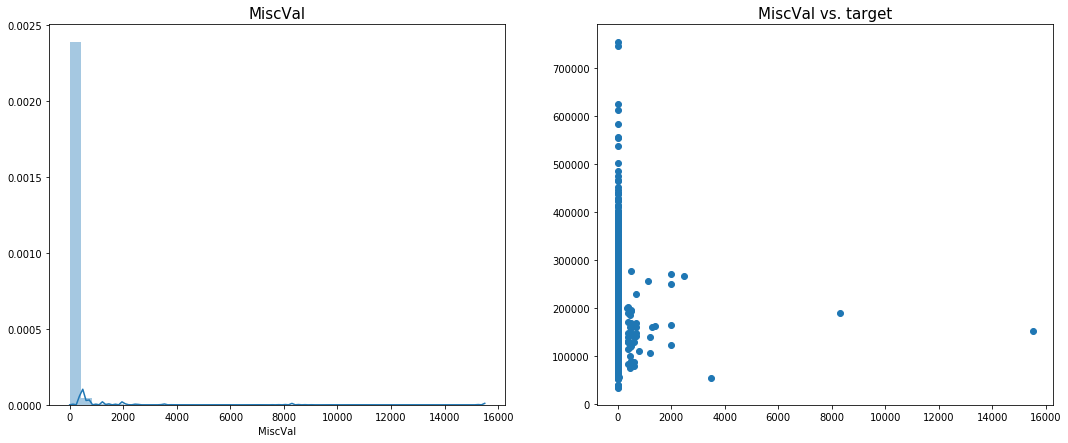

In [120]:
show_feature_num(train, train.columns[75])

In [121]:
display(train[train[train.columns[75]] > 0])  # 52

Id  MSSubClass MSZoning  LotFrontage  LotArea Street Alley LotShape  \
5        6          50       RL         85.0    14115   Pave   NaN      IR1   
7        8          60       RL          NaN    10382   Pave   NaN      IR1   
16      17          20       RL          NaN    11241   Pave   NaN      IR1   
17      18          90       RL         72.0    10791   Pave   NaN      Reg   
51      52          50       RM         52.0     6240   Pave   NaN      Reg   
84      85          80       RL          NaN     8530   Pave   NaN      IR1   
95      96          60       RL          NaN     9765   Pave   NaN      IR2   
98      99          30       RL         85.0    10625   Pave   NaN      Reg   
99     100          20       RL         77.0     9320   Pave   NaN      IR1   
106    107          30       RM         60.0    10800   Pave  Grvl      Reg   
214    215          60       RL          NaN    10900   Pave   NaN      IR1   
249    250          50       RL          NaN   159000   Pave   NaN      IR2   
250    251          30       RL         55.0     5350   Pave   NaN      IR1   
335    336         190       RL          NaN   164660   Grvl   NaN      IR1   
338    339          20       RL         91.0    14145   Pave   NaN      Reg   
346    347          20       RL          NaN    12772   Pave   NaN      IR1   
392    393          20       RL          NaN     8339   Pave   NaN      IR1   
439    440          50       RL         67.0    12354   Pave  Grvl      Reg   
499    500          20       RL         70.0     7535   Pave   NaN      IR1   
502    503          20       RL         70.0     9170   Pave   NaN      Reg   
510    511          20       RL         75.0    14559   Pave   NaN      Reg   
539    540          20       RL          NaN    11423   Pave   NaN      Reg   
589    590          40       RM         50.0     9100   Pave   NaN      Reg   
611    612          80       RL          NaN    10395   Pave   NaN      IR1   
626    627          20       RL          NaN    12342   Pave   NaN      IR1   
634    635          90       RL         64.0     6979   Pave   NaN      Reg   
705    706         190       RM         70.0     5600   Pave   NaN      Reg   
725    726          20       RL         60.0     6960   Pave   NaN      Reg   
733    734          20       RL         80.0    10000   Pave   NaN      Reg   
760    761          20       RL         70.0     9100   Pave   NaN      Reg   
766    767          60       RL         80.0    10421   Pave   NaN      Reg   
767    768          50       RL         75.0    12508   Pave   NaN      IR1   
786    787          50       RM         60.0    10800   Pave   NaN      Reg   
794    795          60       RL          NaN    10832   Pave   NaN      IR1   
800    801          60       RL         79.0    12798   Pave   NaN      IR1   
812    813          20  C (all)         66.0     8712   Grvl   NaN      Reg   
813    814          20       RL         75.0     9750   Pave   NaN      Reg   
867    868          20       RL         85.0     6970   Pave   NaN      Reg   
878    879          85       RL         88.0    11782   Pave   NaN      IR1   
890    891          50       RL         60.0     8064   Pave   NaN      Reg   
912    913          30       RM         51.0     6120   Pave   NaN      Reg   
953    954          60       RL          NaN    11075   Pave   NaN      IR1   
1061  1062          30  C (all)        120.0    18000   Grvl   NaN      Reg   
1076  1077          50       RL         60.0    10800   Pave  Grvl      Reg   
1083  1084          20       RL         80.0     8800   Pave   NaN      Reg   
1171  1172          20       RL         76.0     9120   Pave   NaN      Reg   
1210  1211          60       RL         70.0    11218   Pave   NaN      Reg   
1230  1231          90       RL          NaN    18890   Pave   NaN      IR1   
1252  1253          20       RL         62.0     9858   Pave   NaN      Reg   
1328  1329          50       RM         60.0    10440   Pa

### MoSold

MoSold: Month Sold (MM)

- data embeding => count로?!

6     253
7     234
5     204
4     141
8     122
3     106
10     89
11     79
9      63
12     59
1      58
2      52
Name: MoSold, dtype: int64

count    1460.000000
mean        6.321918
std         2.703626
min         1.000000
25%         5.000000
50%         6.000000
75%         8.000000
max        12.000000
Name: MoSold, dtype: float64

# of nan data: 0
% of nan data: 0.0%


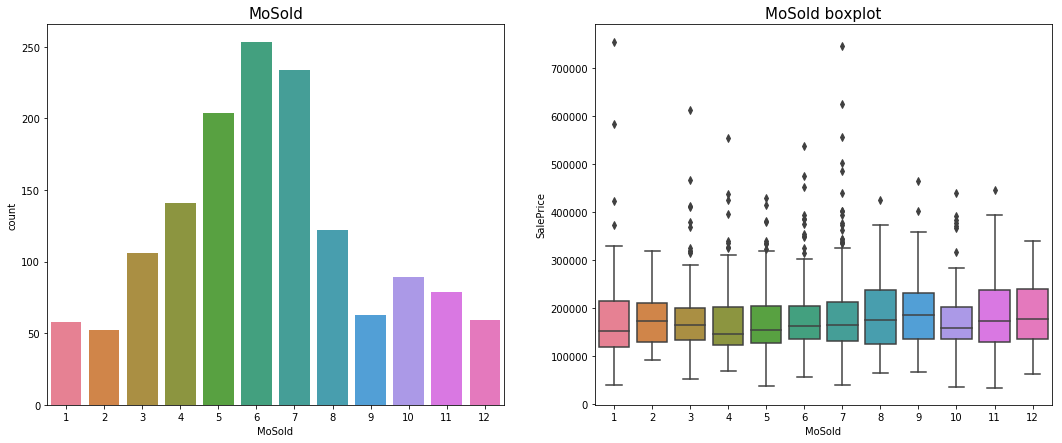

In [122]:
show_feature_cat(train, train.columns[76])

### YrSold

YrSold: Year Sold (YYYY)

- feature 제거

2009    338
2007    329
2006    314
2008    304
2010    175
Name: YrSold, dtype: int64

count    1460.000000
mean     2007.815753
std         1.328095
min      2006.000000
25%      2007.000000
50%      2008.000000
75%      2009.000000
max      2010.000000
Name: YrSold, dtype: float64

# of nan data: 0
% of nan data: 0.0%


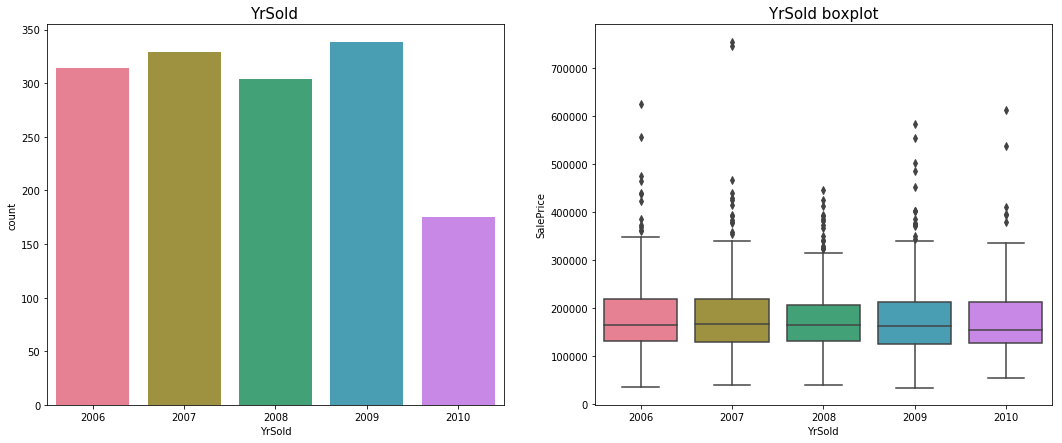

In [123]:
show_feature_cat(train, train.columns[77])

In [124]:
df = train[train[train.columns[77]] == 2010]
df.MoSold.unique()

array([3, 5, 4, 1, 2, 7, 6])

### SaleType

SaleType: Type of sale
		
       WD 	Warranty Deed - Conventional
       CWD	Warranty Deed - Cash
       VWD	Warranty Deed - VA Loan
       New	Home just constructed and sold
       COD	Court Officer Deed/Estate
       Con	Contract 15% Down payment regular terms
       ConLw	Contract Low Down payment and low interest
       ConLI	Contract Low Interest
       ConLD	Contract Low Down
       Oth	Other

WD       1267
New       122
COD        43
ConLD       9
ConLI       5
ConLw       5
CWD         4
Oth         3
Con         2
Name: SaleType, dtype: int64

count     1460
unique       9
top         WD
freq      1267
Name: SaleType, dtype: object

# of nan data: 0
% of nan data: 0.0%


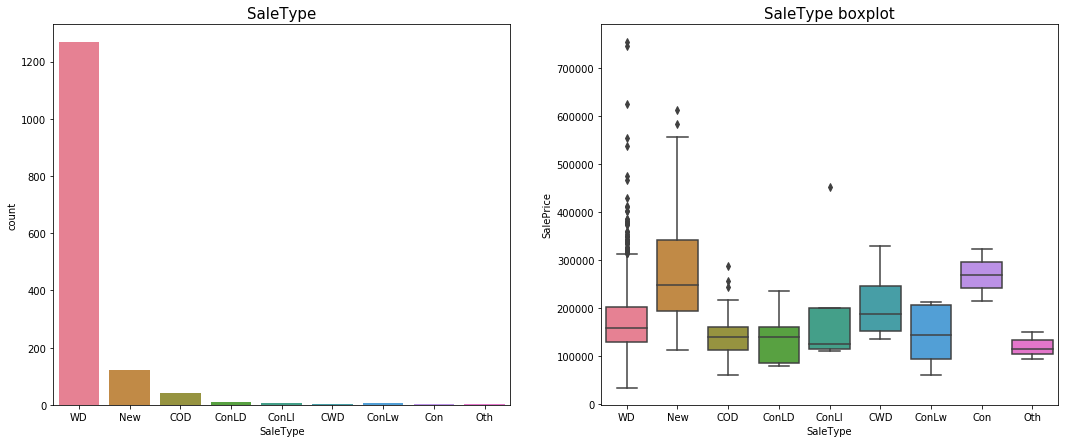

In [125]:
show_feature_cat(train, train.columns[78])

### SaleCondition

SaleCondition: Condition of sale

       Normal	Normal Sale
       Abnorml	Abnormal Sale -  trade, foreclosure, short sale
       AdjLand	Adjoining Land Purchase
       Alloca	Allocation - two linked properties with separate deeds, typically condo with a garage unit	
       Family	Sale between family members
       Partial	Home was not completed when last assessed (associated with New Homes)

Normal     1198
Partial     125
Abnorml     101
Family       20
Alloca       12
AdjLand       4
Name: SaleCondition, dtype: int64

count       1460
unique         6
top       Normal
freq        1198
Name: SaleCondition, dtype: object

# of nan data: 0
% of nan data: 0.0%


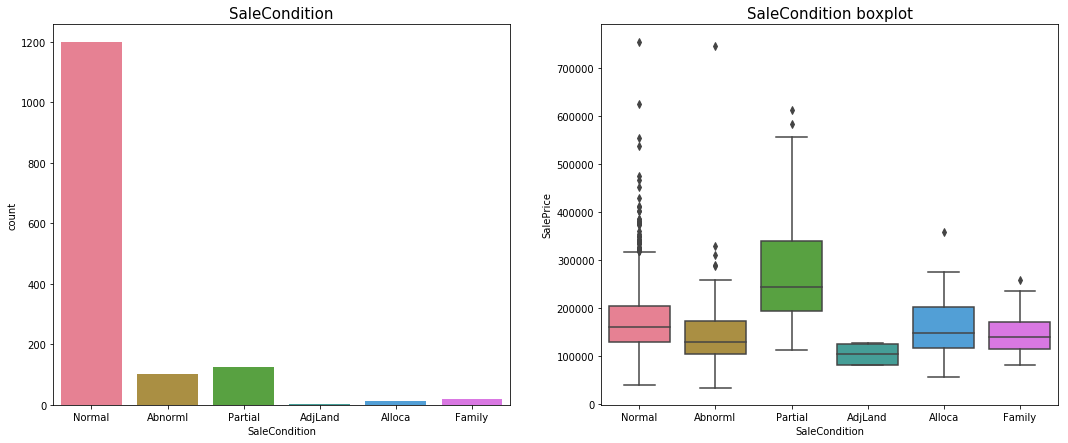

In [126]:
show_feature_cat(train, train.columns[79])